In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,Imputer
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
#models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import display
pd.options.display.max_columns = None
display()
import warnings
warnings.filterwarnings('ignore')
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [3]:
import teradata
host,user,pwd ='10.132.4.11','tkarthi', "hlbhokar@9487"
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query = '''SEL * FROM dw_cula.KM_MG_MIA_ACCTS_2'''
    df11_1 = pd.read_sql(query,session) 
    
df11_1.set_index('ACCTNO',inplace=True)

In [4]:
host,user,pwd ='10.132.4.11','tkarthi', "hlbhokar@9487"
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query = '''SEL * FROM dw_cula.CASA_CNT'''
    casa_cnt = pd.read_sql(query,session) 

In [5]:
df11_1.shape

(68393, 107)

In [6]:
df11_1.head()

,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12784000348,28111122,180.0,83.0,0.46,2006-11-17,103906.0,0.0,103906.0,103906.0,1044.0,0.0,2006-12-15,2022-01-01,694673,7.85,383.34,7.61,377.95,7.87,407.69,7.89,408.66,7.14,1378.09,8.65,643.11,8.63,443.76,9.23,475.17,9.25,487.22,10.15,512.08,10.59,529.5,4.76,520.82,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,82540.90,Mass,01.Married,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,ENTREPRENEURS AND BUSINESS OWNERS,INDIVIDUAL,JOHOR,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1962-07-21,0.0,2010-10-01,45.0,Y,48.0,57.0,>12 mnth,1.0,82540.90
27881009591,33774678,240.0,70.0,0.50,2007-12-03,39900.0,0.0,39900.0,39900.0,306.0,0.0,2008-02-27,2030-06-01,10586350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,323.00,620.01,323.00,100.00,373.00,310.00,323.0,310.00,306.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984-06-24,1.0,2012-10-15,55.0,None,28.0,35.0,>12 mnth,2.0,39612.82
2881020764,7024942,240.0,163.0,0.68,2000-03-01,157529.0,0.0,157529.0,157529.0,1299.0,0.0,2000-07-12,2020-08-01,4201408,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.02,450.00,0.01,0.00,412.25,412.00,1800.00,1803.00,250.00,250.00,1450.00,1450.00,NaN,NaN,610.01,601.00,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,1.0,1.0,5.0,5.0,NaN,NaN,4.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,118513.34,Mass,02.Single,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,PROFESSIONALS,INDIVIDUAL,KUALA LUMPUR,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1961-09-19,1.0,2011-05-15,130.0,N,49.0,58.0,>12 mnth,1.0,140377.76
28481020106,35195839,300.0,69.0,0.23,2008-01-25,8350.0,0.0,8350.0,8350.0,47.0,0.0,2008-04-22,2033-05-01,5534292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7614.18,Mass,01.Married,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,SALES WORKERS RELATED,INDIVIDUAL,KUALA LUMPUR,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1961-06-30,0.0,2012-05-01,48.0,N,50.0,58.0,>12 mnth,3.0,7614.18
26281014321,34992792,360.0,62.0,0.17,2008-08-26,3

In [7]:
df11 = df11_1.drop(['CASA_Cr_Cnt_1','CASA_Dr_Cnt_1', 'CASA_Cr_Cnt_2', 'CASA_Dr_Cnt_2', 'CASA_Cr_Cnt_3',
       'CASA_Dr_Cnt_3', 'CASA_Cr_Cnt_4', 'CASA_Dr_Cnt_4', 'CASA_Cr_Cnt_5','CASA_Dr_Cnt_5', 'CASA_Cr_Cnt_6', 'CASA_Dr_Cnt_6',
       'CASA_Cr_Cnt_7','CASA_Dr_Cnt_7', 'CASA_Cr_Cnt_8', 'CASA_Dr_Cnt_8', 'CASA_Cr_Cnt_9','CASA_Dr_Cnt_9', 'CASA_Cr_Cnt_10', 
       'CASA_Dr_Cnt_10','CASA_Cr_Cnt_11', 'CASA_Dr_Cnt_11', 'CASA_Cr_Cnt_12','CASA_Dr_Cnt_12'],axis=1)
casa_cnt_1 = casa_cnt.drop(['party_ID','Target'],axis=1)
df1 = df11.merge(casa_cnt_1,on='ACCTNO',how='left')
df1.set_index('ACCTNO',inplace=True)
df1.head()

,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,r_Int
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12784000348,28111122,180.0,83.0,0.46,2006-11-17,103906.0,0.0,103906.0,103906.0,1044.0,0.0,2006-12-15,2022-01-01,694673,7.85,383.34,7.61,377.95,7.87,407.69,7.89,408.66,7.14,1378.09,8.65,643.11,8.63,443.76,9.23,475.17,9.25,487.22,10.15,512.08,10.59,529.5,4.76,520.82,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,82540.90,Mass,01.Married,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,ENTREPRENEURS AND BUSINESS OWNERS,INDIVIDUAL,JOHOR,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1962-07-21,0.0,2010-10-01,45.0,Y,48.0,57.0,>12 mnth,1.0,82540.90,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0859
27881009591,33774678,240.0,70.0,0.50,2007-12-03,39900.0,0.0,39900.0,39900.0,306.0,0.0,2008-02-27,2030-06-01,10586350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,323.00,620.01,323.00,100.00,373.00,310.00,323.0,310.00,306.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984-06-24,1.0,2012-10-15,55.0,None,28.0,35.0,>12 mnth,2.0,39612.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0954
2881020764,7024942,240.0,163.0,0.68,2000-03-01,157529.0,0.0,157529.0,157529.0,1299.0,0.0,2000-07-12,2020-08-01,4201408,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.02,450.00,0.01,0.00,412.25,412.00,1800.00,1803.00,250.00,250.00,1450.00,1450.00,NaN,NaN,610.01,601.00,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,118513.34,Mass,02.Single,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,PROFESSIONALS,INDIVIDUAL,KUALA LUMPUR,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1961-09-19,1.0,2011-05-15,130.0,N,49.0,58.0,>12 mnth,1.0,140377.76,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2.0,3.0,3.0,4.0,1.0,1.0,5.0,4.0,NaN,NaN,4.0,4.0,0.0739
28481020106,35195839,300.0,69.0,0.23,2008-01-25,8350.0,0.0,8350.0,8350.0,47.0,0.0,2008-04-22,2033-05-01,5534292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7614.18,Mass,01.Married,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,SALES WORKERS RELATED,INDIVIDUAL,KUALA LUMPUR,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1961-06-30,0.0,2012-05-01,48.0,N,50.0,58.0,>12 mnth,3.0,7614.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0479
26281014321,34

In [8]:
df1.shape

(68393, 108)

In [8]:
df1.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\V2\20200609_MIA.xlsx')

In [9]:
df2 = df1.select_dtypes(include ='float64') 

Convert discrete input feature from int type to object type

In [10]:
df2.columns

Index(['k_Loan_Term', 'K_Remaining_Term', 'Ln_Completion_Ratio', 'Applied_Amt',
       'Property_Value', 'Approved_Amt', 'Released_Amt', 'a_Repayment',
       'a_Advance_Payment', 'CASA_Cr_1', 'CASA_Dr_1', 'CASA_Cr_2', 'CASA_Dr_2',
       'CASA_Cr_3', 'CASA_Dr_3', 'CASA_Cr_4', 'CASA_Dr_4', 'CASA_Cr_5',
       'CASA_Dr_5', 'CASA_Cr_6', 'CASA_Dr_6', 'CASA_Cr_7', 'CASA_Dr_7',
       'CASA_Cr_8', 'CASA_Dr_8', 'CASA_Cr_9', 'CASA_Dr_9', 'CASA_Cr_10',
       'CASA_Dr_10', 'CASA_Cr_11', 'CASA_Dr_11', 'CASA_Cr_12', 'CASA_Dr_12',
       'CASA_Internal_Transfer', 'CASA_Cheque_Returned', 'CASA_Credit_Advice',
       'CASA_Auto_Sweep', 'CASA_Other', 'CASA_IBG_Returned',
       'CASA_Loan_Disbursement', 'CASA_Trade_Finance', 'CASA_Cust_Mass',
       'CASA_Cust_PB', 'CASA_Cust_PV', 'Current_Balance_Amt',
       'ind_conventional', 'ind_Islamic', 'ind_MG', 'ind_CASA', 'ind_CC',
       'ind_FD', 'ind_HP', 'ind_PL', 'ind_INV', 'ind_SMF', 'ind_COD', 'ind_TL',
       'ind_GBB_UT', 'ind_TR', 'Target', 'New

In [11]:
cat_cols = ['CASA_Internal_Transfer','CASA_Cheque_Returned','CASA_Credit_Advice','CASA_Auto_Sweep','CASA_Other','CASA_IBG_Returned'
,'CASA_Loan_Disbursement','CASA_Trade_Finance','CASA_Cust_Mass','CASA_Cust_PB','CASA_Cust_PV','ind_conventional','ind_Islamic'
,'ind_MG','ind_CASA','ind_CC','ind_FD','ind_HP','ind_PL','ind_INV','ind_SMF','ind_COD','ind_TL','ind_GBB_UT','ind_TR',
           'Target','B_Investors']
for col in cat_cols:
    df1[col] = df1[col].astype(object)

In [12]:
df1.head()

,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,r_Int
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12784000348,28111122,180.0,83.0,0.46,2006-11-17,103906.0,0.0,103906.0,103906.0,1044.0,0.0,2006-12-15,2022-01-01,694673,7.85,383.34,7.61,377.95,7.87,407.69,7.89,408.66,7.14,1378.09,8.65,643.11,8.63,443.76,9.23,475.17,9.25,487.22,10.15,512.08,10.59,529.5,4.76,520.82,0,0,0,0,1,0,0,0,1,0,0,82540.90,Mass,01.Married,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,ENTREPRENEURS AND BUSINESS OWNERS,INDIVIDUAL,JOHOR,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1962-07-21,0,2010-10-01,45.0,Y,48.0,57.0,>12 mnth,1,82540.90,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0859
27881009591,33774678,240.0,70.0,0.50,2007-12-03,39900.0,0.0,39900.0,39900.0,306.0,0.0,2008-02-27,2030-06-01,10586350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,323.00,620.01,323.00,100.00,373.00,310.00,323.0,310.00,306.00,0,0,0,0,1,0,0,0,1,0,0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1984-06-24,1,2012-10-15,55.0,None,28.0,35.0,>12 mnth,2,39612.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0954
2881020764,7024942,240.0,163.0,0.68,2000-03-01,157529.0,0.0,157529.0,157529.0,1299.0,0.0,2000-07-12,2020-08-01,4201408,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.02,450.00,0.01,0.00,412.25,412.00,1800.00,1803.00,250.00,250.00,1450.00,1450.00,NaN,NaN,610.01,601.00,1,0,1,0,1,0,0,0,1,0,0,118513.34,Mass,02.Single,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,PROFESSIONALS,INDIVIDUAL,KUALA LUMPUR,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1961-09-19,1,2011-05-15,130.0,N,49.0,58.0,>12 mnth,1,140377.76,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2.0,3.0,3.0,4.0,1.0,1.0,5.0,4.0,NaN,NaN,4.0,4.0,0.0739
28481020106,35195839,300.0,69.0,0.23,2008-01-25,8350.0,0.0,8350.0,8350.0,47.0,0.0,2008-04-22,2033-05-01,5534292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,1,0,0,7614.18,Mass,01.Married,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,SALES WORKERS RELATED,INDIVIDUAL,KUALA LUMPUR,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1961-06-30,0,2012-05-01,48.0,N,50.0,58.0,>12 mnth,3,7614.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0479
26281014321,34992792,360.0,62.0,0.17,2008-08-26,317550.0,0.0,317550.0,317550.0,1996.0,0.0,2009-02-06,2039-02-01,1325173,1000.16,1106.00,0.00,402.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
df1.Target.value_counts()

0.0    39867
1.0    28526
Name: Target, dtype: int64

In [14]:
df1.groupby('Target').agg('sum')

,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,Current_Balance_Amt,Newly_funded_Cust,Age_2,Age_utd,current_balance_amt_2,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,r_Int
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,11125387.0,2202844.0,11462.87,7.723944e+09,1.014886e+11,8.415407e+09,8.397450e+09,48861436.08,1.988709e+08,1.914264e+08,1.930493e+08,2.178588e+08,1.974401e+08,2.029153e+08,2.109514e+08,2.285604e+08,2.117132e+08,2.238705e+08,2.176447e+08,2.413544e+08,2.223347e+08,2.572165e+08,2.520506e+08,2.985199e+08,2.670347e+08,2.669531e+08,2.807922e+08,2.843312e+08,2.948629e+08,3.189341e+08,2.975007e+08,3.319058e+08,3.362437e+08,4.756541e+09,1358961.0,1572335.0,1905577.0,4.756541e+09,29687.0,34397.0,34569.0,37116.0,39146.0,39238.0,33718.0,38353.0,33886.0,39267.0,36759.0,41564.0,37799.0,43826.0,42273.0,45493.0,48054.0,48900.0,42199.0,47928.0,45162.0,51353.0,46626.0,53507.0,2138.21895
1.0,7991339.0,2206972.0,10756.95,3.391719e+09,7.564013e+08,3.747741e+09,3.727572e+09,25910764.33,4.625114e+07,1.084049e+08,1.299195e+08,1.226753e+08,1.224230e+08,9.757121e+07,1.004473e+08,1.978872e+08,1.539502e+08,1.778642e+08,2.262268e+08,1.709100e+09,1.263284e+09,3.568790e+08,3.872871e+08,3.769095e+08,7.417849e+08,5.719697e+08,1.944258e+08,2.808451e+08,2.061667e+08,1.658573e+08,2.060858e+08,1.907290e+08,1.935699e+08,3.280493e+09,1813989.0,1147705.0,1373741.0,2.565491e+09,20993.0,33613.0,22358.0,35779.0,22333.0,36564.0,23938.0,38384.0,25037.0,41273.0,25790.0,43231.0,28601.0,46399.0,29649.0,48335.0,28875.0,48761.0,29645.0,50600.0,30890.0,53198.0,29050.0,46370.0,1846.97800


## Missing Value Treatment

In [15]:
display(df1.isnull().any())

CIFNO                    False
k_Loan_Term              False
K_Remaining_Term          True
Ln_Completion_Ratio       True
Application_Dt            True
Applied_Amt               True
Property_Value            True
Approved_Amt             False
Released_Amt             False
a_Repayment              False
a_Advance_Payment        False
dt_Opened                False
dt_OriginalMaturity       True
party_ID                 False
CASA_Cr_1                 True
CASA_Dr_1                 True
CASA_Cr_2                 True
CASA_Dr_2                 True
CASA_Cr_3                 True
CASA_Dr_3                 True
CASA_Cr_4                 True
CASA_Dr_4                 True
CASA_Cr_5                 True
CASA_Dr_5                 True
CASA_Cr_6                 True
CASA_Dr_6                 True
CASA_Cr_7                 True
CASA_Dr_7                 True
CASA_Cr_8                 True
CASA_Dr_8                 True
                         ...  
Age_2                     True
Age_utd 

Your dataframe has 108 columns.
There are 61 columns that have missing values.


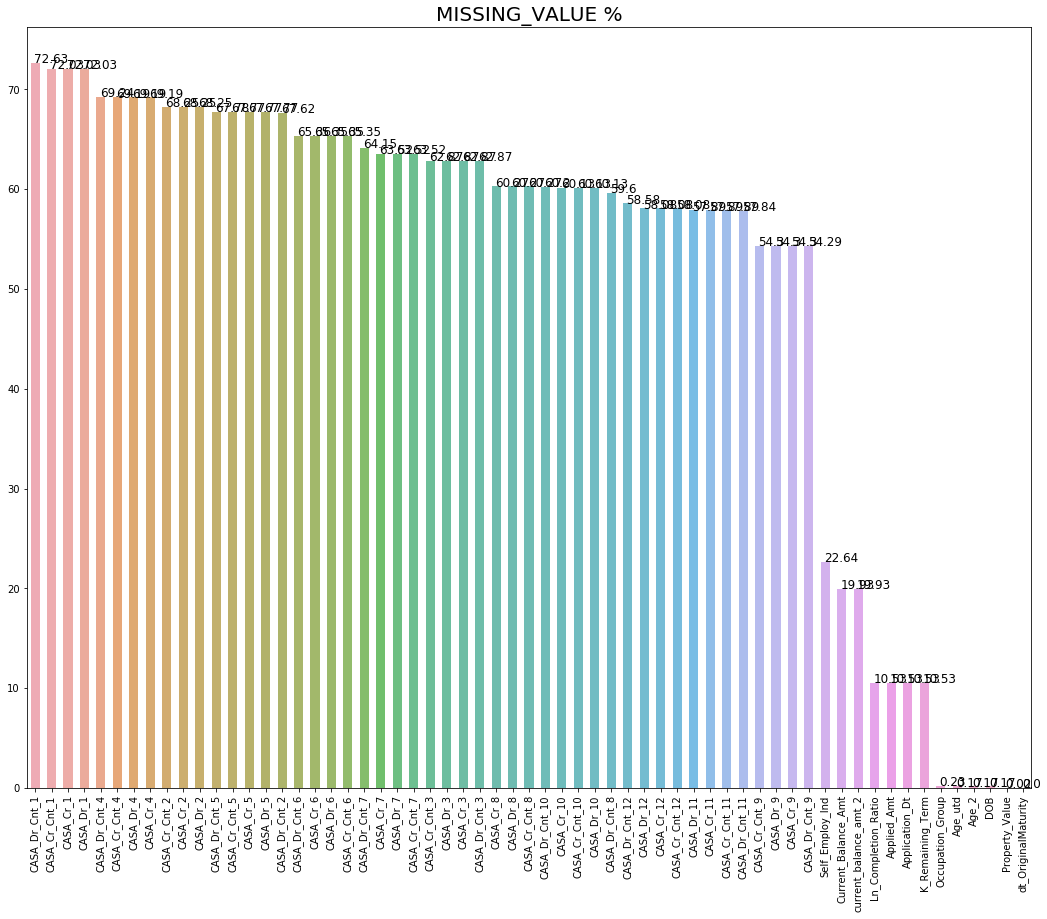

In [16]:
def missing_values_table(df1_1):
    mis_val = df1.isnull().sum()
    mis_val_percent = 100 * df1.isnull().sum() / len(df1)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
    print ("Your dataframe has " + str(df1.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")
    plt.figure(figsize=(18,14))
    ax=sns.barplot(mis_val_table_ren_columns.index, mis_val_table_ren_columns['% of Total Values'].values, alpha=0.8)
    for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title('MISSING_VALUE %',fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.55
            i.set_width(.55)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.2,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
    plt.xticks(rotation='vertical')
    plt.show()
missing_values_table(df1)

In [17]:
pos_clas=df1[df1['Target']==1]
pos_df2 = pos_clas[['CASA_Cr_1', 'CASA_Dr_1', 'CASA_Cr_2', 'CASA_Dr_2','CASA_Cr_3', 'CASA_Dr_3', 'CASA_Cr_4', 'CASA_Dr_4', 'CASA_Cr_5',
       'CASA_Dr_5', 'CASA_Cr_6', 'CASA_Dr_6', 'CASA_Cr_7', 'CASA_Dr_7','CASA_Cr_8', 'CASA_Dr_8', 'CASA_Cr_9', 'CASA_Dr_9', 'CASA_Cr_10',
       'CASA_Dr_10', 'CASA_Cr_11', 'CASA_Dr_11', 'CASA_Cr_12', 'CASA_Dr_12','CASA_Cr_Cnt_1', 'CASA_Dr_Cnt_1', 'CASA_Cr_Cnt_2', 'CASA_Dr_Cnt_2',
       'CASA_Cr_Cnt_3', 'CASA_Dr_Cnt_3', 'CASA_Cr_Cnt_4', 'CASA_Dr_Cnt_4','CASA_Cr_Cnt_5', 'CASA_Dr_Cnt_5', 'CASA_Cr_Cnt_6', 'CASA_Dr_Cnt_6',
       'CASA_Cr_Cnt_7', 'CASA_Dr_Cnt_7', 'CASA_Cr_Cnt_8', 'CASA_Dr_Cnt_8', 'CASA_Cr_Cnt_9', 'CASA_Dr_Cnt_9', 'CASA_Cr_Cnt_10', 'CASA_Dr_Cnt_10',
       'CASA_Cr_Cnt_11', 'CASA_Dr_Cnt_11', 'CASA_Cr_Cnt_12', 'CASA_Dr_Cnt_12']]
pos_df3=pos_df2.dropna(how='all')
print(pos_df3.shape)
neg_clas=df1[df1['Target']==0]
neg_df2 = neg_clas[['CASA_Cr_1', 'CASA_Dr_1', 'CASA_Cr_2', 'CASA_Dr_2','CASA_Cr_3', 'CASA_Dr_3', 'CASA_Cr_4', 'CASA_Dr_4', 'CASA_Cr_5',
       'CASA_Dr_5', 'CASA_Cr_6', 'CASA_Dr_6', 'CASA_Cr_7', 'CASA_Dr_7','CASA_Cr_8', 'CASA_Dr_8', 'CASA_Cr_9', 'CASA_Dr_9', 'CASA_Cr_10',
       'CASA_Dr_10', 'CASA_Cr_11', 'CASA_Dr_11', 'CASA_Cr_12', 'CASA_Dr_12','CASA_Cr_Cnt_1', 'CASA_Dr_Cnt_1', 'CASA_Cr_Cnt_2', 'CASA_Dr_Cnt_2',
       'CASA_Cr_Cnt_3', 'CASA_Dr_Cnt_3', 'CASA_Cr_Cnt_4', 'CASA_Dr_Cnt_4','CASA_Cr_Cnt_5', 'CASA_Dr_Cnt_5', 'CASA_Cr_Cnt_6', 'CASA_Dr_Cnt_6',
       'CASA_Cr_Cnt_7', 'CASA_Dr_Cnt_7', 'CASA_Cr_Cnt_8', 'CASA_Dr_Cnt_8', 'CASA_Cr_Cnt_9', 'CASA_Dr_Cnt_9', 'CASA_Cr_Cnt_10', 'CASA_Dr_Cnt_10',
       'CASA_Cr_Cnt_11', 'CASA_Dr_Cnt_11', 'CASA_Cr_Cnt_12', 'CASA_Dr_Cnt_12']]
neg_df3=neg_df2.dropna(how='all')
print(neg_df3.shape)

(22121, 48)
(21649, 48)


In [18]:
base_data = pd.concat([pos_df3, neg_df3])
df2 = df1.drop(['CASA_Cr_1', 'CASA_Dr_1', 'CASA_Cr_2', 'CASA_Dr_2','CASA_Cr_3', 'CASA_Dr_3', 'CASA_Cr_4', 'CASA_Dr_4', 'CASA_Cr_5',
       'CASA_Dr_5', 'CASA_Cr_6', 'CASA_Dr_6', 'CASA_Cr_7', 'CASA_Dr_7','CASA_Cr_8', 'CASA_Dr_8', 'CASA_Cr_9', 'CASA_Dr_9', 'CASA_Cr_10',
       'CASA_Dr_10', 'CASA_Cr_11', 'CASA_Dr_11', 'CASA_Cr_12', 'CASA_Dr_12','CASA_Cr_Cnt_1', 'CASA_Dr_Cnt_1', 'CASA_Cr_Cnt_2', 'CASA_Dr_Cnt_2',
       'CASA_Cr_Cnt_3', 'CASA_Dr_Cnt_3', 'CASA_Cr_Cnt_4', 'CASA_Dr_Cnt_4','CASA_Cr_Cnt_5', 'CASA_Dr_Cnt_5', 'CASA_Cr_Cnt_6', 'CASA_Dr_Cnt_6',
       'CASA_Cr_Cnt_7', 'CASA_Dr_Cnt_7', 'CASA_Cr_Cnt_8', 'CASA_Dr_Cnt_8', 'CASA_Cr_Cnt_9', 'CASA_Dr_Cnt_9', 'CASA_Cr_Cnt_10', 'CASA_Dr_Cnt_10',
       'CASA_Cr_Cnt_11', 'CASA_Dr_Cnt_11', 'CASA_Cr_Cnt_12', 'CASA_Dr_Cnt_12'],axis=1)
base_data_1 = base_data.merge(df2,on='ACCTNO',how='left')


cat_cols = ['CASA_Internal_Transfer','CASA_Cheque_Returned','CASA_Credit_Advice','CASA_Auto_Sweep','CASA_Other','CASA_IBG_Returned'
,'CASA_Loan_Disbursement','CASA_Trade_Finance','CASA_Cust_Mass','CASA_Cust_PB','CASA_Cust_PV','ind_conventional','ind_Islamic'
,'ind_MG','ind_CASA','ind_CC','ind_FD','ind_HP','ind_PL','ind_INV','ind_SMF','ind_COD','ind_TL','ind_GBB_UT','ind_TR',
           'Target','B_Investors']
for col in cat_cols:
    base_data_1[col] = base_data_1[col].astype('int64')
    base_data_1[col] = base_data_1[col].astype(object)

In [19]:
base_data_1.head()

,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2,r_Int
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27881009591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,323.0,620.01,323.0,100.00,373.0,310.00,323.0,310.00,306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,33774678,240.0,70.0,0.50,2007-12-03,39900.0,0.0,39900.0,39900.0,306.00,0.0,2008-02-27,2030-06-01,10586350,0,0,0,0,1,0,0,0,1,0,0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1984-06-24,1,2012-10-15,55.0,None,28.0,35.0,>12 mnth,2,39612.82,0.0954
2881020764,0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02,450.00,0.01,0.0,412.25,412.00,1800.00,1803.0,250.00,250.0,1450.00,1450.0,NaN,NaN,610.01,601.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2.0,3.0,3.0,4.0,1.0,1.0,5.0,4.0,NaN,NaN,4.0,4.0,7024942,240.0,163.0,0.68,2000-03-01,157529.0,0.0,157529.0,157529.0,1299.00,0.0,2000-07-12,2020-08-01,4201408,1,0,1,0,1,0,0,0,1,0,0,118513.34,Mass,02.Single,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,PROFESSIONALS,INDIVIDUAL,KUALA LUMPUR,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1961-09-19,1,2011-05-15,130.0,N,49.0,58.0,>12 mnth,1,140377.76,0.0739
26281014321,1000.16,1106.0,0.00,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34992792,360.0,62.0,0.17,2008-08-26,317550.0,0.0,317550.0,317550.0,1996.00,0.0,2009-02-06,2039-02-01,1325173,0,0,0,0,1,0,0,0,1,0,0,300379.14,Mass,03.Unknown,03.Indian,01.Male,01.Malaysia,02.Non-Bumiputra,"ATHLETIC, ARTISTIC, CRAFT, CULTURE AND DESIGNER",INDIVIDUAL,SELANGOR,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1971-09-14,1,2012-06-15,40.0,None,40.0,48.0,>12 mnth,1,302576.12,0.0409
1181046906,5024.22,2245.6,14.27,1497.0,13.01,2497.0,12.61,2333.0,8993.31,2771.75,13.28,1955.0,4214.70,1460.55,3016.13,12251.0,6260.48,4148.0,244525.99,148158.5,15019.02,13596.0,103018.76,10048.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,3.0,4.0,6.0,10.0,5.0,9.0,8.0,6.0,6.0,6.0,6.0,3154159,360.0,31.0,0.09,2011-03-15,39800.0,0.0,39800.0,39800.0,222.00,444.0,2011-05-09,2041-05-01,2020287,1,0,1,0,1,0,0,0,0,1,0,NaN,PB,01.Married,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,N.SEMBILAN,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1978-03-30,1,2012-09-15,16.0,Y,34.0,42.0,>12 mnth,3,NaN,0.0539
17381001075,0.02,0.0,0.02,0.0,0.02,0.0,0.02,0.0,0.02,0.00,0.02,0.0,0.02,0.00,0.02,0.0,0.02,0.0,0.02,0.0,0.02,0.0,0.02,0.0,1.0,0.0,1.0,0.0,1.0,0.0,

Your dataframe has 108 columns.
There are 61 columns that have missing values.


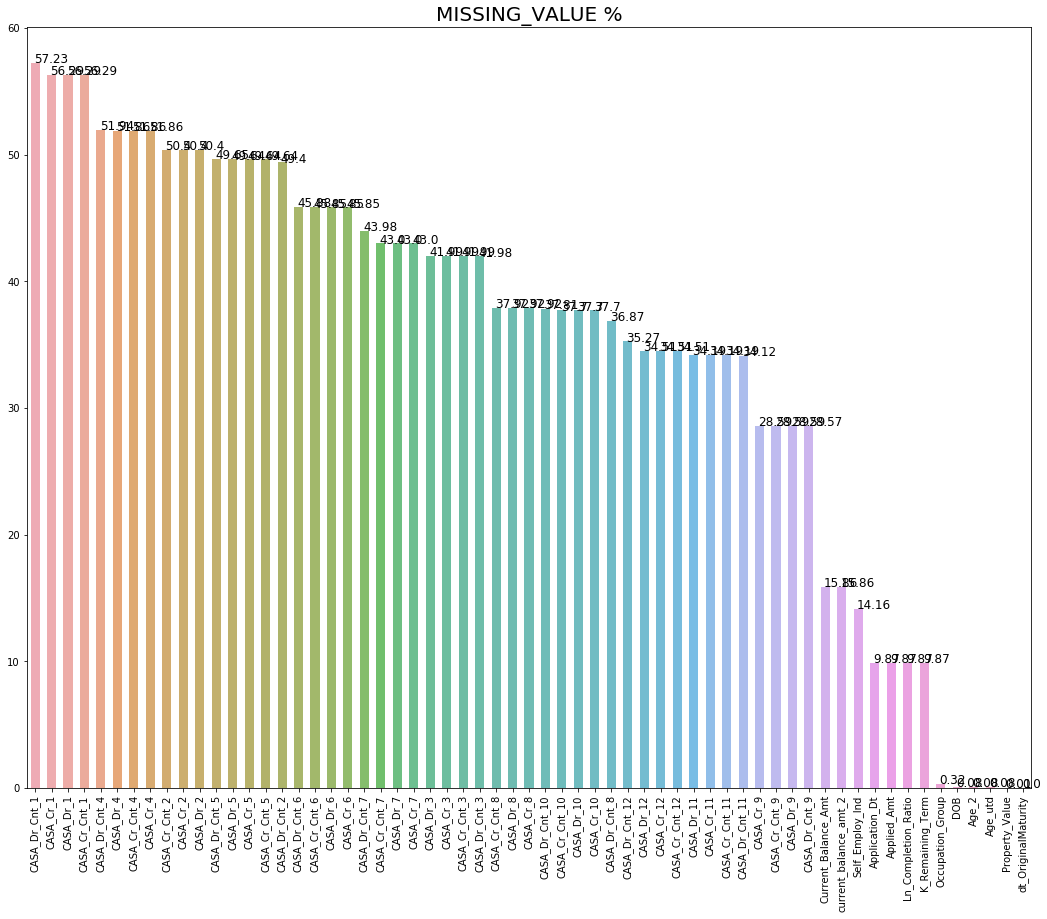

In [20]:
def missing_values_table(df4_1):
    mis_val = base_data_1.isnull().sum()
    mis_val_percent = 100 * base_data_1.isnull().sum() / len(base_data_1)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
    print ("Your dataframe has " + str(base_data_1.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")
    plt.figure(figsize=(18,14))
    ax=sns.barplot(mis_val_table_ren_columns.index, mis_val_table_ren_columns['% of Total Values'].values, alpha=0.8)
    for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title('MISSING_VALUE %',fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.55
            i.set_width(.55)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.2,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
    plt.xticks(rotation='vertical')
    plt.show()
missing_values_table(base_data_1)

In [21]:
base_data_1.groupby('Target').agg('sum')

,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,Current_Balance_Amt,Newly_funded_Cust,Age_2,Age_utd,current_balance_amt_2,r_Int
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.914264e+08,1.930493e+08,2.178588e+08,1.974401e+08,2.029153e+08,2.109514e+08,2.285604e+08,2.117132e+08,2.238705e+08,2.176447e+08,2.413544e+08,2.223347e+08,2.572165e+08,2.520506e+08,2.985199e+08,2.670347e+08,2.669531e+08,2.807922e+08,2.843312e+08,2.948629e+08,3.189341e+08,2.975007e+08,3.319058e+08,3.362437e+08,29687.0,34397.0,34569.0,37116.0,39146.0,39238.0,33718.0,38353.0,33886.0,39267.0,36759.0,41564.0,37799.0,43826.0,42273.0,45493.0,48054.0,48900.0,42199.0,47928.0,45162.0,51353.0,46626.0,53507.0,5874982.0,1038417.0,5925.86,5.492761e+09,1.235016e+09,5.995792e+09,5.984314e+09,34996700.09,1.665384e+08,3.227862e+09,511517.0,863475.0,1048377.0,3.227862e+09,1089.2536
1,1.084049e+08,1.299195e+08,1.226753e+08,1.224230e+08,9.757121e+07,1.004473e+08,1.978872e+08,1.539502e+08,1.778642e+08,2.262268e+08,1.709100e+09,1.263284e+09,3.568790e+08,3.872871e+08,3.769095e+08,7.417849e+08,5.719697e+08,1.944258e+08,2.808451e+08,2.061667e+08,1.658573e+08,2.060858e+08,1.907290e+08,1.935699e+08,20993.0,33613.0,22358.0,35779.0,22333.0,36564.0,23938.0,38384.0,25037.0,41273.0,25790.0,43231.0,28601.0,46399.0,29649.0,48335.0,28875.0,48761.0,29645.0,50600.0,30890.0,53198.0,29050.0,46370.0,6168896.0,1665704.0,8214.85,2.845672e+09,6.443199e+08,3.142419e+09,3.124853e+09,21278818.59,4.017992e+07,2.691593e+09,1371369.0,894554.0,1068192.0,2.107148e+09,1405.8479


In [22]:
#Due to more than 50% missing values in cr/db variables, will transform to quarter wise/half and year for analysis

In [23]:
base_data_1['CASA_Cr_Q1'] = (base_data_1['CASA_Cr_1'] + base_data_1['CASA_Cr_2'] + base_data_1['CASA_Cr_3'])/3
base_data_1['CASA_Cr_Q2'] = (base_data_1['CASA_Cr_4'] + base_data_1['CASA_Cr_5'] + base_data_1['CASA_Cr_6'])/3 
base_data_1['CASA_Cr_Q3'] = (base_data_1['CASA_Cr_7'] + base_data_1['CASA_Cr_8'] + base_data_1['CASA_Cr_9'])/3
base_data_1['CASA_Cr_Q4'] = (base_data_1['CASA_Cr_10'] + base_data_1['CASA_Cr_11'] + base_data_1['CASA_Cr_12'])/3

base_data_1['CASA_Db_Q1'] = (base_data_1['CASA_Dr_1'] + base_data_1['CASA_Dr_2'] + base_data_1['CASA_Dr_3'])/3
base_data_1['CASA_Db_Q2'] = (base_data_1['CASA_Dr_4'] + base_data_1['CASA_Dr_5'] + base_data_1['CASA_Dr_6'])/3
base_data_1['CASA_Db_Q3'] = (base_data_1['CASA_Dr_7'] + base_data_1['CASA_Dr_8'] + base_data_1['CASA_Dr_9'])/3
base_data_1['CASA_Db_Q4'] = (base_data_1['CASA_Dr_10'] + base_data_1['CASA_Dr_11'] + base_data_1['CASA_Dr_12'])/3

base_data_1['CASA_Cr_Cnt_Q1'] = (base_data_1['CASA_Cr_Cnt_1'] + base_data_1['CASA_Cr_Cnt_2'] + base_data_1['CASA_Cr_Cnt_3'])/3
base_data_1['CASA_Cr_Cnt_Q2'] = (base_data_1['CASA_Cr_Cnt_4'] + base_data_1['CASA_Cr_Cnt_5'] + base_data_1['CASA_Cr_Cnt_6'])/3
base_data_1['CASA_Cr_Cnt_Q3'] = (base_data_1['CASA_Cr_Cnt_7'] + base_data_1['CASA_Cr_Cnt_8'] + base_data_1['CASA_Cr_Cnt_9'])/3
base_data_1['CASA_Cr_Cnt_Q4'] = (base_data_1['CASA_Cr_Cnt_10'] + base_data_1['CASA_Cr_Cnt_11'] + base_data_1['CASA_Cr_Cnt_12'])/3

base_data_1['CASA_Db_Cnt_Q1'] = (base_data_1['CASA_Dr_Cnt_1'] + base_data_1['CASA_Dr_Cnt_2'] + base_data_1['CASA_Dr_Cnt_3'])/3
base_data_1['CASA_Db_Cnt_Q2'] = (base_data_1['CASA_Dr_Cnt_4'] + base_data_1['CASA_Dr_Cnt_5'] + base_data_1['CASA_Dr_Cnt_6'])/3
base_data_1['CASA_Db_Cnt_Q3'] = (base_data_1['CASA_Dr_Cnt_7'] + base_data_1['CASA_Dr_Cnt_8'] + base_data_1['CASA_Dr_Cnt_9'])/3
base_data_1['CASA_Db_Cnt_Q4'] = (base_data_1['CASA_Dr_Cnt_10'] + base_data_1['CASA_Dr_Cnt_11'] + base_data_1['CASA_Dr_Cnt_12'])/3

In [24]:
base_data_1['MIA_DATE_1'] = pd.to_datetime(base_data_1['MIA_DATE']).dt.to_period('m')

In [25]:
pd.options.display.float_format = '{:.2f}'.format
pos_clas_analys=base_data_1[base_data_1['Target']==1]
neg_clas_analys=base_data_1[base_data_1['Target']==0]
pos_clas_ana_1 = pos_clas_analys.describe().T
neg_clas_ana_1 = neg_clas_analys.describe().T

In [26]:
base_data_1.Target.value_counts()

1    22121
0    21649
Name: Target, dtype: int64

In [27]:
pos_clas_ana_1.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\V2\MIA_Data_Analysis_pos.xlsx')
neg_clas_ana_1.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\V2\MIA_Data_Analysis_neg.xlsx')
base_data_1.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\V2\20200609_MIA_Base_Data.xlsx')

In [28]:
base_data_1.head()

,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2,r_Int,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,MIA_DATE_1
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27881009591,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,323.00,620.01,323.00,100.00,373.00,310.00,323.00,310.00,306.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,2.00,3.00,2.00,1.00,3.00,1.00,2.00,1.00,1.00,33774678,240.00,70.00,0.50,2007-12-03,39900.00,0.00,39900.00,39900.00,306.00,0.00,2008-02-27,2030-06-01,10586350,0,0,0,0,1,0,0,0,1,0,0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1984-06-24,1,2012-10-15,55.00,None,28.00,35.00,>12 mnth,2,39612.82,0.10,nan,nan,nan,240.00,nan,nan,nan,334.00,nan,nan,nan,1.00,nan,nan,nan,2.00,2012-10
2881020764,0.07,0.00,nan,nan,nan,nan,nan,nan,0.02,450.00,0.01,0.00,412.25,412.00,1800.00,1803.00,250.00,250.00,1450.00,1450.00,nan,nan,610.01,601.00,1.00,0.00,nan,nan,nan,nan,nan,nan,1.00,1.00,1.00,0.00,2.00,3.00,3.00,4.00,1.00,1.00,5.00,4.00,nan,nan,4.00,4.00,7024942,240.00,163.00,0.68,2000-03-01,157529.00,0.00,157529.00,157529.00,1299.00,0.00,2000-07-12,2020-08-01,4201408,1,0,1,0,1,0,0,0,1,0,0,118513.34,Mass,02.Single,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,PROFESSIONALS,INDIVIDUAL,KUALA LUMPUR,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1961-09-19,1,2011-05-15,130.00,N,49.00,58.00,>12 mnth,1,140377.76,0.07,nan,nan,820.75,nan,nan,nan,821.67,nan,nan,nan,2.00,nan,nan,nan,2.67,nan,2011-05
26281014321,1000.16,1106.00,0.00,402.00,nan,nan,nan,nan,nan,nan,nan,nan,0.07,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.00,6.00,0.00,2.00,nan,nan,nan,nan,nan,nan,nan,nan,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,34992792,360.00,62.00,0.17,2008-08-26,317550.00,0.00,317550.00,317550.00,1996.00,0.00,2009-02-06,2039-02-01,1325173,0,0,0,0,1,0,0,0,1,0,0,300379.14,Mass,03.Unknown,03.Indian,01.Male,01.Malaysia,02.Non-Bumiputra,"ATHLETIC, ARTISTIC, CRAFT, CULTURE AND DESIGNER",INDIVIDUAL,SELANGOR,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1971-09-14,1,2012-06-15,40.00,None,40.00,48.00,>12 mnth,1,302576.12,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2012-06
1181046906,5024.22,2245.60,14.27,1497.00,13.01,2497.00,12.61,2333.00,8993.31,2771.75,13.28,1955.00,4214.70,1460.55,3016.13,12251.00,6260.48,4148.00,244525.99,148158.50,15019.02,13596.00,103018.76,10048.00,5.00,4.00,3.00,3.00,3.00,4.00,3.00,4.00,5.00,5.0

## SPIKE ANALYSIS FOR MIA ACCTS

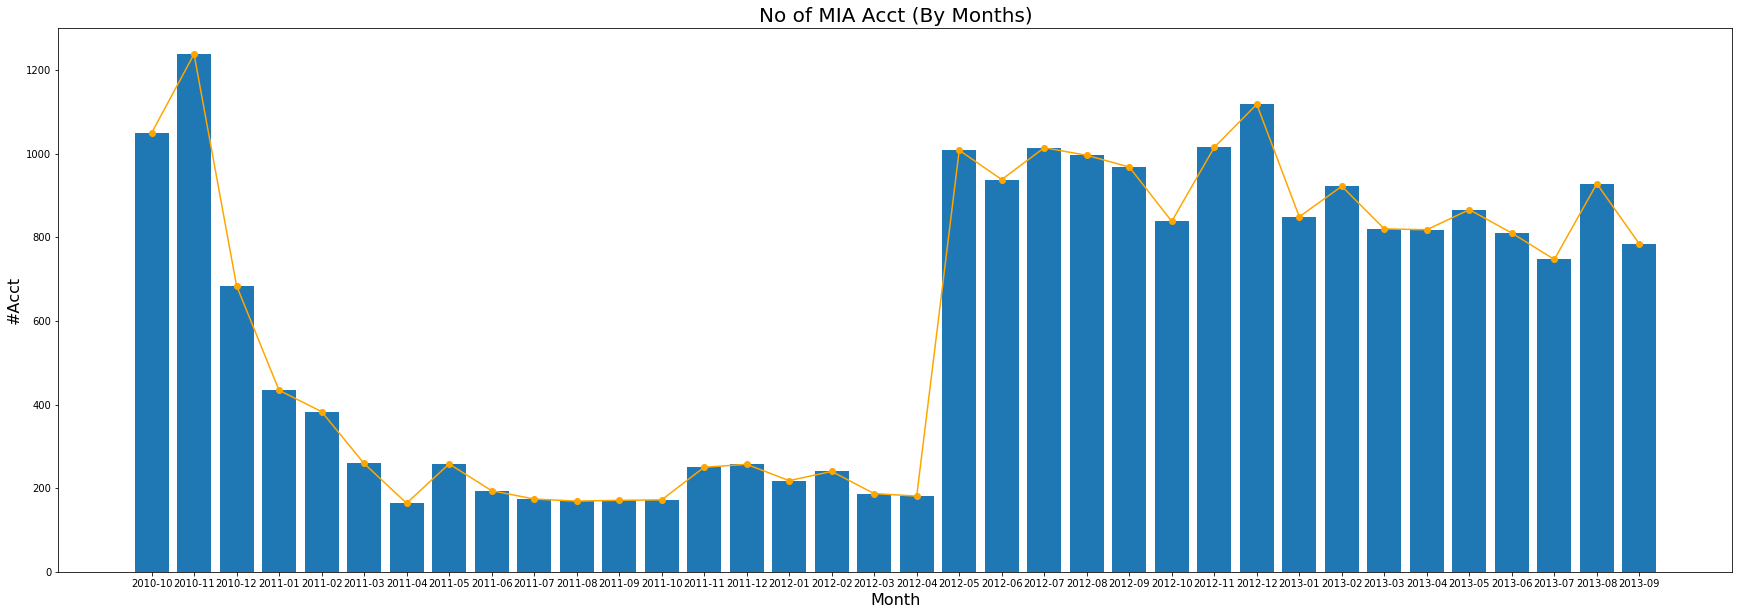

In [29]:
base_data_2 = base_data_1[base_data_1['Target']==1]
base_analysis = pd.DataFrame(base_data_2.MIA_DATE_1.value_counts())
base_analysis.reset_index(inplace=True)
base_analysis_2 = (base_analysis.sort_values(by='index'))
base_analysis_2["index_2"]= base_analysis_2["index"].dt.strftime('%Y-%m')
base_analysis_2.reset_index()
base_analysis_3 = base_analysis_2[['index_2','MIA_DATE_1']]
#Plotting the graph for dervied above table
plt.figure(figsize=(30,10))
plt.title('No of MIA Acct (By Months)',fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('#Acct', fontsize=16)
plt.bar(base_analysis_2['index_2'], base_analysis_2['MIA_DATE_1'])
plt.plot(base_analysis_2['index_2'], base_analysis_2['MIA_DATE_1'], '-o', color='orange')

## Activity Analysis

MIA Customers Last 6 Months Transaction Counts

In [30]:
base_data_1 = base_data_1.fillna(0)

In [31]:
cols = ['CASA_Cr_Cnt_Q1','CASA_Cr_Cnt_Q2','CASA_Cr_Cnt_Q3','CASA_Cr_Cnt_Q4']
for col in cols:
    print(base_data_1[col].quantile([0, 0.75, 0.85, 0.95, 1]))

cols = ['CASA_Db_Cnt_Q1','CASA_Db_Cnt_Q2','CASA_Db_Cnt_Q3','CASA_Db_Cnt_Q4']
for col in cols:
    print(base_data_1[col].quantile([0, 0.75, 0.85, 0.95, 1]))

0.00     0.00
0.75     1.00
0.85     2.00
0.95     5.33
1.00   115.33
Name: CASA_Cr_Cnt_Q1, dtype: float64
0.00     0.00
0.75     1.00
0.85     2.00
0.95     5.67
1.00   188.00
Name: CASA_Cr_Cnt_Q2, dtype: float64
0.00     0.00
0.75     1.33
0.85     2.33
0.95     6.33
1.00   176.67
Name: CASA_Cr_Cnt_Q3, dtype: float64
0.00     0.00
0.75     1.33
0.85     2.33
0.95     6.67
1.00   168.67
Name: CASA_Cr_Cnt_Q4, dtype: float64
0.00     0.00
0.75     1.00
0.85     2.33
0.95     8.67
1.00   105.67
Name: CASA_Db_Cnt_Q1, dtype: float64
0.00     0.00
0.75     1.33
0.85     3.00
0.95     9.67
1.00   116.67
Name: CASA_Db_Cnt_Q2, dtype: float64
0.00     0.00
0.75     2.00
0.85     3.33
0.95    10.67
1.00   139.67
Name: CASA_Db_Cnt_Q3, dtype: float64
0.00     0.00
0.75     2.00
0.85     3.67
0.95    11.00
1.00   128.67
Name: CASA_Db_Cnt_Q4, dtype: float64


In [32]:
bins = [-1,1,5,10,200]
category = ['A.0 to 1','B.1 to 5','C.5 to 10','D.>10']
base_data_1['CASA_Cr_Cnt_Q1_1'] = pd.cut(base_data_1["CASA_Cr_Cnt_Q1"],bins,labels = category)
base_data_1['CASA_Cr_Cnt_Q2_1'] = pd.cut(base_data_1["CASA_Cr_Cnt_Q2"],bins,labels = category)
base_data_1['CASA_Cr_Cnt_Q3_1'] = pd.cut(base_data_1["CASA_Cr_Cnt_Q3"],bins,labels = category)
base_data_1['CASA_Cr_Cnt_Q4_1'] = pd.cut(base_data_1["CASA_Cr_Cnt_Q4"],bins,labels = category)

base_data_1['CASA_Db_Cnt_Q1_1'] = pd.cut(base_data_1["CASA_Db_Cnt_Q1"],bins,labels = category)
base_data_1['CASA_Db_Cnt_Q2_1'] = pd.cut(base_data_1["CASA_Db_Cnt_Q2"],bins,labels = category)
base_data_1['CASA_Db_Cnt_Q3_1'] = pd.cut(base_data_1["CASA_Db_Cnt_Q3"],bins,labels = category)
base_data_1['CASA_Db_Cnt_Q4_1'] = pd.cut(base_data_1["CASA_Db_Cnt_Q4"],bins,labels = category)
################################################################################################
base_data_pos = base_data_1[base_data_1['Target']==1]
base_data_neg = base_data_1[base_data_1['Target']==0]
base_data_pos_1 = base_data_pos[['CASA_Cr_Cnt_Q1_1','CASA_Cr_Cnt_Q2_1','CASA_Cr_Cnt_Q3_1','CASA_Cr_Cnt_Q4_1',
                                 'CASA_Db_Cnt_Q1_1','CASA_Db_Cnt_Q2_1','CASA_Db_Cnt_Q3_1','CASA_Db_Cnt_Q4_1']]
base_data_neg_1 = base_data_neg[['CASA_Cr_Cnt_Q1_1','CASA_Cr_Cnt_Q2_1','CASA_Cr_Cnt_Q3_1','CASA_Cr_Cnt_Q4_1',
                                 'CASA_Db_Cnt_Q1_1','CASA_Db_Cnt_Q2_1','CASA_Db_Cnt_Q3_1','CASA_Db_Cnt_Q4_1']]

In [33]:
base_data_1['CASA_Cr_Cnt_Q1_1'].value_counts()

A.0 to 1     33466
B.1 to 5      8073
C.5 to 10     1338
D.>10          893
Name: CASA_Cr_Cnt_Q1_1, dtype: int64

In [34]:
df1_pos_1 = base_data_pos_1.melt(var_name='columns', value_name='index')
df1_pos_2 = pd.crosstab(index=df1_pos_1['index'], columns=df1_pos_1['columns'])

df1_neg_1 = base_data_neg_1.melt(var_name='columns', value_name='index')
df1_neg_2 = pd.crosstab(index=df1_neg_1['index'], columns=df1_neg_1['columns'])

In [35]:
df1_pos_2.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\v2\MIA_Data_Analysis_pos_2.xlsx')
df1_neg_2.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\v2\MIA_Data_Analysis_neg_2.xlsx')

In [36]:
df1_pos_2.head()

columns,CASA_Cr_Cnt_Q1_1,CASA_Cr_Cnt_Q2_1,CASA_Cr_Cnt_Q3_1,CASA_Cr_Cnt_Q4_1,CASA_Db_Cnt_Q1_1,CASA_Db_Cnt_Q2_1,CASA_Db_Cnt_Q3_1,CASA_Db_Cnt_Q4_1
index,,,,,,,,
A.0 to 1,17579,16695,15961,16142,16556,15348,13724,13551
B.1 to 5,3778,4608,5233,4991,3833,4894,6223,6381
C.5 to 10,483,474,526,600,928,1005,1165,1195
D.>10,281,344,401,388,804,874,1009,994


In [37]:
df1_neg_2.head()

columns,CASA_Cr_Cnt_Q1_1,CASA_Cr_Cnt_Q2_1,CASA_Cr_Cnt_Q3_1,CASA_Cr_Cnt_Q4_1,CASA_Db_Cnt_Q1_1,CASA_Db_Cnt_Q2_1,CASA_Db_Cnt_Q3_1,CASA_Db_Cnt_Q4_1
index,,,,,,,,
A.0 to 1,15887,16301,14671,15062,16817,16780,15761,15621
B.1 to 5,4295,3754,5142,4576,2818,2586,3257,3133
C.5 to 10,855,886,1037,1097,986,1143,1322,1405
D.>10,612,708,799,914,1028,1140,1309,1490


## Cohort and Trend Analysis (CASA Transaction Turning to MIA) vs Non

In [38]:
Cr_CASA_analysis = base_data_1[['CASA_Cr_9','CASA_Cr_10','CASA_Cr_11','CASA_Cr_12','Target']]
Db_CASA_analysis = base_data_1[['CASA_Dr_9','CASA_Dr_10','CASA_Dr_11','CASA_Dr_12','Target']]
Cr_CASA_analysis_1 = Cr_CASA_analysis.groupby('Target').agg('mean').T
Db_CASA_analysis_1 = Db_CASA_analysis.groupby('Target').agg('mean').T
Cr_CASA_analysis_2 = Cr_CASA_analysis_1.rename(columns={0: "Non_MIA", 1: "MIA"})
Db_CASA_analysis_2 = Db_CASA_analysis_1.rename(columns={0: "Non_MIA", 1: "MIA"})

Cr_CASA_cnt_analysis = base_data_1[['CASA_Cr_Cnt_9','CASA_Cr_Cnt_10','CASA_Cr_Cnt_11','CASA_Cr_Cnt_12','Target']] 	
Db_CASA_cnt_analysis = base_data_1[['CASA_Dr_Cnt_9','CASA_Dr_Cnt_10','CASA_Dr_Cnt_11','CASA_Dr_Cnt_12','Target']]
Cr_CASA_cnt_analysis_1 = Cr_CASA_cnt_analysis.groupby('Target').agg('mean').T
Db_CASA_cnt_analysis_1 = Db_CASA_cnt_analysis.groupby('Target').agg('mean').T
Cr_CASA_cnt_analysis_2 = Cr_CASA_cnt_analysis_1.rename(columns={0: "Non_MIA", 1: "MIA"})
Db_CASA_cnt_analysis_2 = Db_CASA_cnt_analysis_1.rename(columns={0: "Non_MIA", 1: "MIA"})

In [39]:
Cr_CASA_analysis_2

Target,Non_MIA,MIA
CASA_Cr_9,12330.97,25856.41
CASA_Cr_10,13133.69,12695.86
CASA_Cr_11,14732.05,7497.73
CASA_Cr_12,15331.23,8622.08



-------------------------------MIA Customer tend to show declining activity of Amt in months close to MIA.--------------------


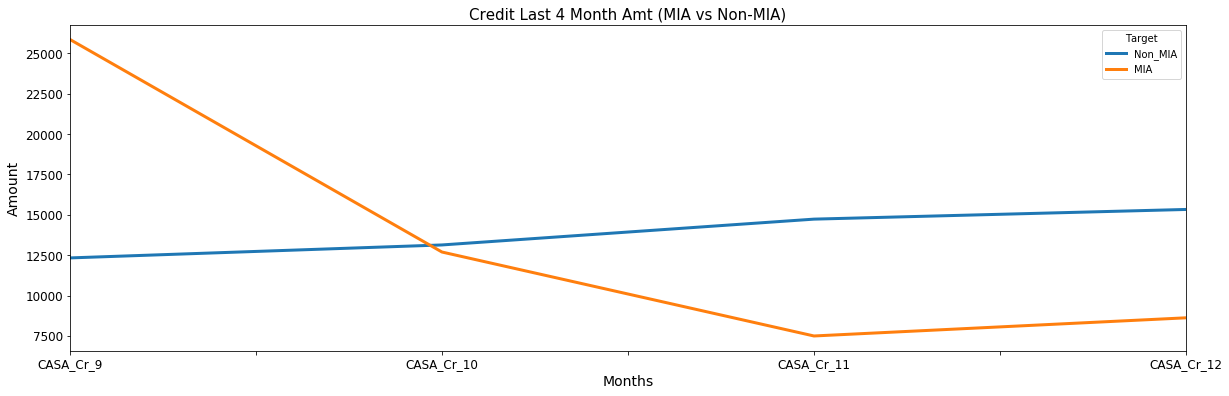

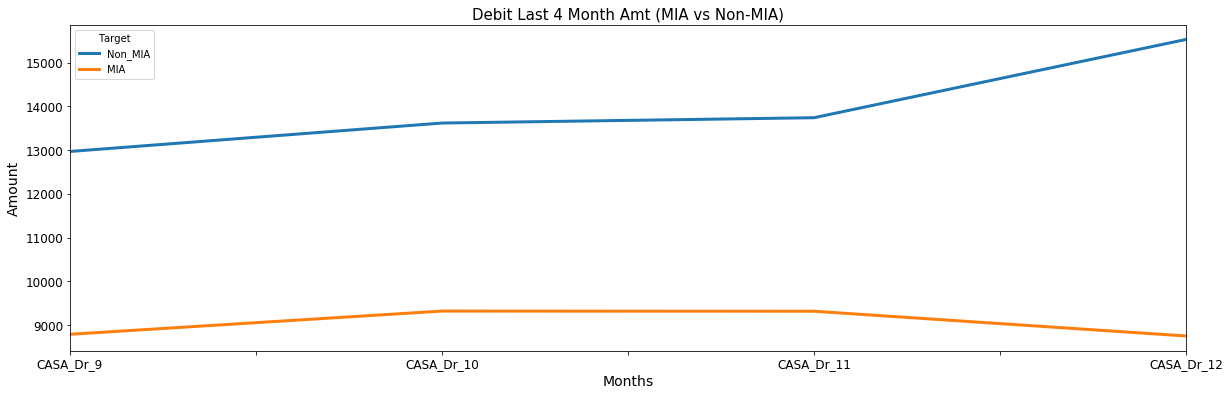

In [40]:
Cr_CASA_analysis_2.plot(figsize=(20,6), linewidth=3,fontsize=12)
plt.title('Credit Last 4 Month Amt (MIA vs Non-MIA)',fontsize=15)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Amount', fontsize=14)

Db_CASA_analysis_2.plot(figsize=(20,6), linewidth=3,fontsize=12)
plt.title('Debit Last 4 Month Amt (MIA vs Non-MIA)',fontsize=15)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Amount', fontsize=14)
print("")
print("-------------------------------MIA Customer tend to show declining activity of Amt in months close to MIA.--------------------")


-----------------------------------MIA Customer tend to show declining activity of txn in months close to MIA.------------------------


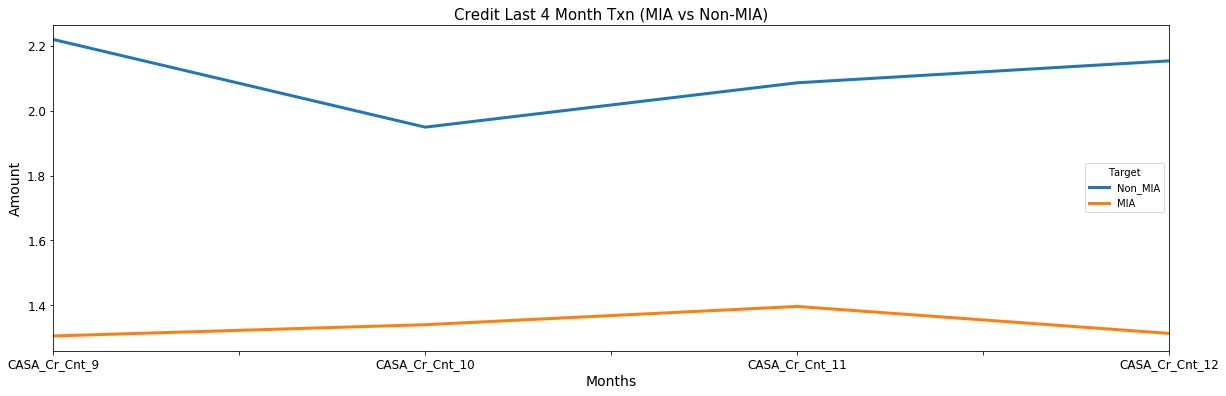

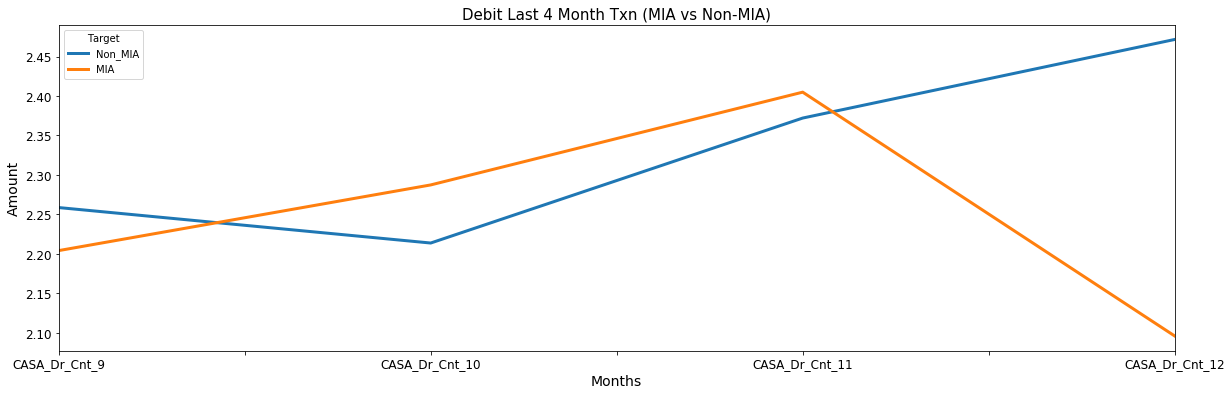

In [41]:
Cr_CASA_cnt_analysis_2.plot(figsize=(20,6), linewidth=3,fontsize=12)
plt.title('Credit Last 4 Month Txn (MIA vs Non-MIA)',fontsize=15)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Amount', fontsize=14)

Db_CASA_cnt_analysis_2.plot(figsize=(20,6), linewidth=3,fontsize=12)
plt.title('Debit Last 4 Month Txn (MIA vs Non-MIA)',fontsize=15)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Amount', fontsize=14)
print("")
print("-----------------------------------MIA Customer tend to show declining activity of txn in months close to MIA.------------------------")

## Exploratory Data Analysis

In [42]:
base_data_1.head()

,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2,r_Int,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,MIA_DATE_1,CASA_Cr_Cnt_Q1_1,CASA_Cr_Cnt_Q2_1,CASA_Cr_Cnt_Q3_1,CASA_Cr_Cnt_Q4_1,CASA_Db_Cnt_Q1_1,CASA_Db_Cnt_Q2_1,CASA_Db_Cnt_Q3_1,CASA_Db_Cnt_Q4_1
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27881009591,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,323.00,620.01,323.00,100.00,373.00,310.00,323.00,310.00,306.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,2.00,1.00,3.00,1.00,2.00,1.00,1.00,33774678,240.00,70.00,0.50,2007-12-03,39900.00,0.00,39900.00,39900.00,306.00,0.00,2008-02-27,2030-06-01,10586350,0,0,0,0,1,0,0,0,1,0,0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1984-06-24,1,2012-10-15,55.00,0,28.00,35.00,>12 mnth,2,39612.82,0.10,0.00,0.00,0.00,240.00,0.00,0.00,0.00,334.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,2012-10,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,B.1 to 5
2881020764,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,450.00,0.01,0.00,412.25,412.00,1800.00,1803.00,250.00,250.00,1450.00,1450.00,0.00,0.00,610.01,601.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,2.00,3.00,3.00,4.00,1.00,1.00,5.00,4.00,0.00,0.00,4.00,4.00,7024942,240.00,163.00,0.68,2000-03-01,157529.00,0.00,157529.00,157529.00,1299.00,0.00,2000-07-12,2020-08-01,4201408,1,0,1,0,1,0,0,0,1,0,0,118513.34,Mass,02.Single,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,PROFESSIONALS,INDIVIDUAL,KUALA LUMPUR,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1961-09-19,1,2011-05-15,130.00,N,49.00,58.00,>12 mnth,1,140377.76,0.07,0.00,0.00,820.75,0.00,0.00,0.00,821.67,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.67,0.00,2011-05,A.0 to 1,A.0 to 1,B.1 to 5,A.0 to 1,A.0 to 1,A.0 to 1,B.1 to 5,A.0 to 1
26281014321,1000.16,1106.00,0.00,402.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,6.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34992792,360.00,62.00,0.17,2008-08-26,317550.00,0.00,317550.00,317550.00,1996.00,0.00,2009-02-06,2039-02-01,1325173,0,0,0,0,1,0,0,0,1,0,0,300379.14,Mass,03.Unknown,03.Indian,01.Male,01.Malaysia,02.Non-Bumiputra,"ATHLETIC, ARTISTIC, CRAFT, CULTURE AND DESIGNER",INDIVIDUAL,SELANGOR,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1971-09-1

In [43]:
base_data_1.describe()
#Age_utd - current AGe ; Age_2 : MIA/Non MIA duration Age

,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,Target,Newly_funded_Cust,Age_2,Age_utd,B_Investors,current_balance_amt_2,r_Int,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4
count,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00,43770.00
mean,6850.16,7378.77,7780.08,7307.82,6865.13,7114.43,9742.92,8354.20,9178.31,10141.00,44561.44,33941.49,14030.06,14606.76,15431.33,23048.20,19166.62,10857.16,12912.41,11446.87,11075.88,11505.29,11940.48,12104.49,1.16,1.55,1.30,1.67,1.40,1.73,1.32,1.75,1.35,1.84,1.43,1.94,1.52,2.06,1.64,2.14,1.76,2.23,1.64,2.25,1.74,2.39,1.73,2.28,275.16,61.78,0.32,190505.68,42936.62,208777.95,208114.39,1285.71,4722.83,0.26,0.15,0.16,0.00,1.00,0.01,0.03,0.00,0.93,0.07,0.00,135240.00,0.93,0.39,0.99,0.97,0.39,0.17,0.11,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.51,43.02,40.17,48.36,1.58,121887.36,0.06,6907.16,20271.60,15902.06,11454.90,7073.48,17206.67,15918.90,11324.87,1.15,1.27,1.48,1.55,1.55,1.73,2.02,2.12
std,76532.42,87224.67,81185.13,71719.17,60283.25,68804.97,138292.01,92575.32,103617.09,162622.16,1938895.28,1455103.97,333364.20,378921.46,365894.86,628386.31,561656.46,130053.88,249673.12,167795.44,112331.55,171494.48,99940.26,111194.29,3.72,4.61,3.83,4.68,3.93,4.76,4.12,4.85,4.03,4.92,4.25,4.96,4.38,5.12,4.54,5.23,4.44,5.27,4.58,5.26,4.64,5.45,4.57,5.50,82.08,45.54,0.32,319917.89,134873.83,321565.54,321430.45,2793.98,35187.79,0.44,0.36,0.37,0.05,0.00,0.12,0.18,0.00,0.25,0.25,0.04,270253.43,0.26,0.49,0.09,0.16,0.49,0.37,0.31,0.21,0.15,0.06,0.03,0.03,0.02,0.00,0.50,40.92,8.94,9.09,0.96,215476.97,0.02,58558.42,715505.48,320904.33,138522.31,61888.90,561647.04,329367.36,141631.44,3.68,3.99,4.31,4.43,4.45,4.67,4.95,5.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,167.00,0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EA34A20>,
      dtype=object)

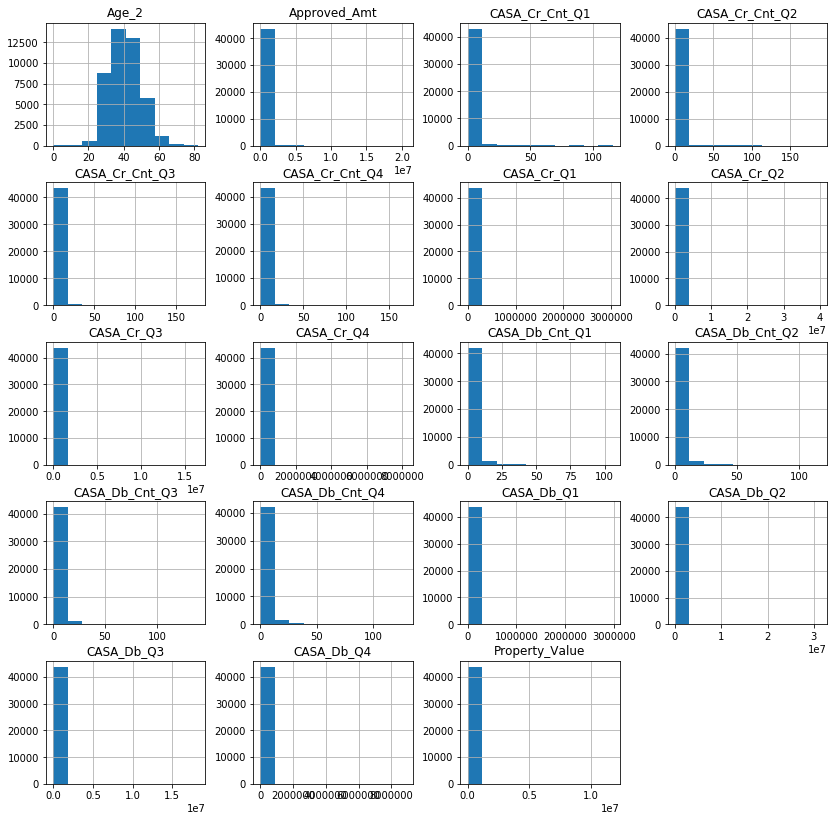

In [44]:
base_data_E1 = base_data_1[['Age_2','Property_Value', 'Approved_Amt','CASA_Cr_Q1','CASA_Cr_Q2','CASA_Cr_Q3','CASA_Cr_Q4'
            ,'CASA_Db_Q1','CASA_Db_Q2','CASA_Db_Q3','CASA_Db_Q4','CASA_Cr_Cnt_Q1','CASA_Cr_Cnt_Q2','CASA_Cr_Cnt_Q3','CASA_Cr_Cnt_Q4'
            ,'CASA_Db_Cnt_Q1','CASA_Db_Cnt_Q2','CASA_Db_Cnt_Q3','CASA_Db_Cnt_Q4']]
base_data_E1.hist(figsize = (14,14))
#Need to perform Outlier treatment and Normalization process - Skewness is there 

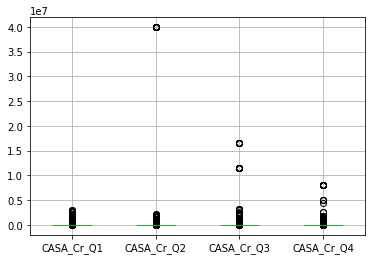

In [45]:
BP1=base_data_1[['CASA_Cr_Q1','CASA_Cr_Q2','CASA_Cr_Q3','CASA_Cr_Q4']]   
BP1.boxplot()

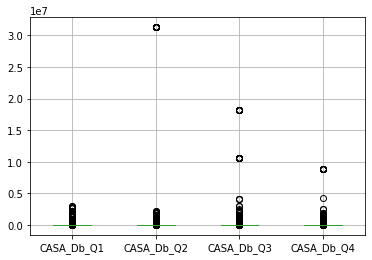

In [46]:
BP2=base_data_1[['CASA_Db_Q1','CASA_Db_Q2','CASA_Db_Q3','CASA_Db_Q4']]
BP2.boxplot()

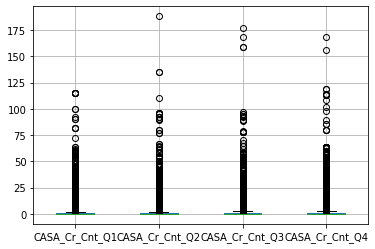

In [47]:
BP3=base_data_1[['CASA_Cr_Cnt_Q1','CASA_Cr_Cnt_Q2','CASA_Cr_Cnt_Q3','CASA_Cr_Cnt_Q4']]
BP3.boxplot()

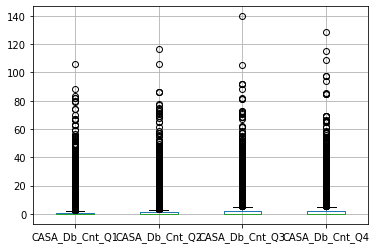

In [48]:
BP4=base_data_1[['CASA_Db_Cnt_Q1','CASA_Db_Cnt_Q2','CASA_Db_Cnt_Q3','CASA_Db_Cnt_Q4']]
BP4.boxplot()

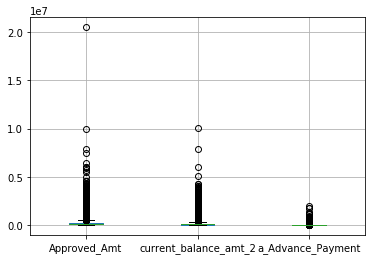

In [49]:
BP5=base_data_1[['Approved_Amt','current_balance_amt_2','a_Advance_Payment']]
BP5.boxplot()

## Bivariate Analysis

In [50]:
#To create bucketing for Age variable
base_data_1.loc[(base_data_1['Age_2'] <= 21), 'Age_2_Bucketing'] = 'A. <21'
base_data_1.loc[(base_data_1['Age_2'] > 21) & (base_data_1['Age_2'] <= 25), 'Age_2_Bucketing'] = 'B. 21 to 25'
base_data_1.loc[(base_data_1['Age_2'] > 25) & (base_data_1['Age_2'] <= 30), 'Age_2_Bucketing'] = 'C. 26 to 30'
base_data_1.loc[(base_data_1['Age_2'] > 30) & (base_data_1['Age_2'] <= 35), 'Age_2_Bucketing'] = 'D. 31 to 35'
base_data_1.loc[(base_data_1['Age_2'] > 35) & (base_data_1['Age_2'] <= 40), 'Age_2_Bucketing'] = 'D. 36 to 40'
base_data_1.loc[(base_data_1['Age_2'] > 40) & (base_data_1['Age_2'] <= 45), 'Age_2_Bucketing'] = 'D. 41 to 45'
base_data_1.loc[(base_data_1['Age_2'] > 45) & (base_data_1['Age_2'] <= 50), 'Age_2_Bucketing'] = 'D. 46 to 50'
base_data_1.loc[(base_data_1['Age_2'] > 50) & (base_data_1['Age_2'] <= 55), 'Age_2_Bucketing'] = 'D. 51 to 55'
base_data_1.loc[(base_data_1['Age_2'] > 55), 'Age_2_Bucketing'] = 'E. >56'

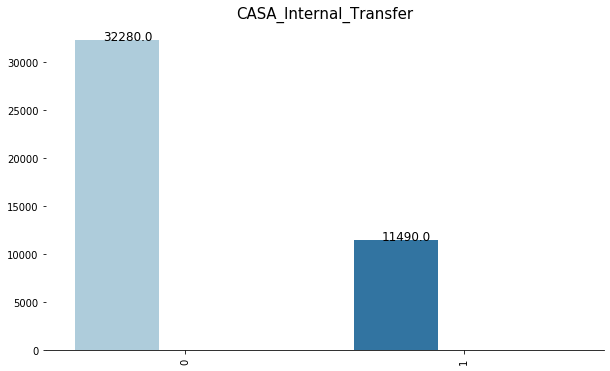

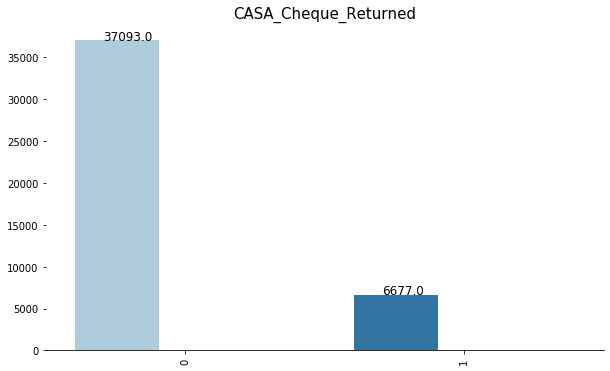

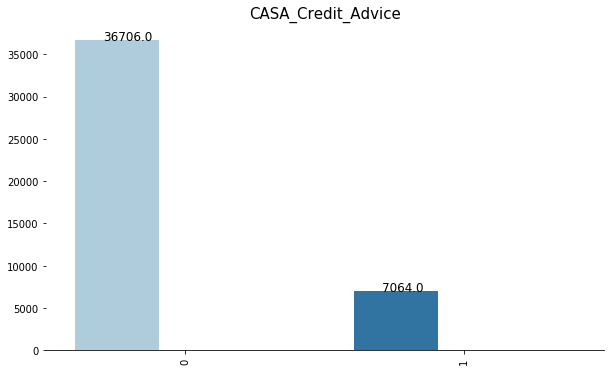

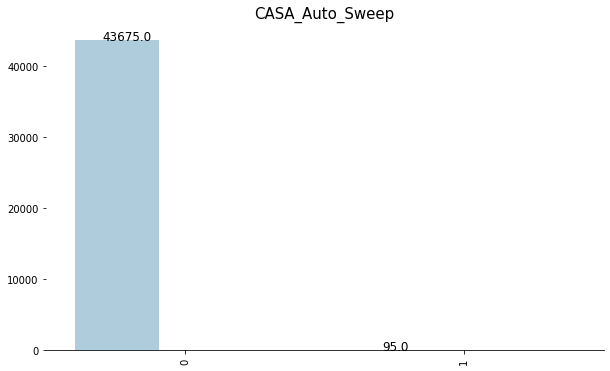

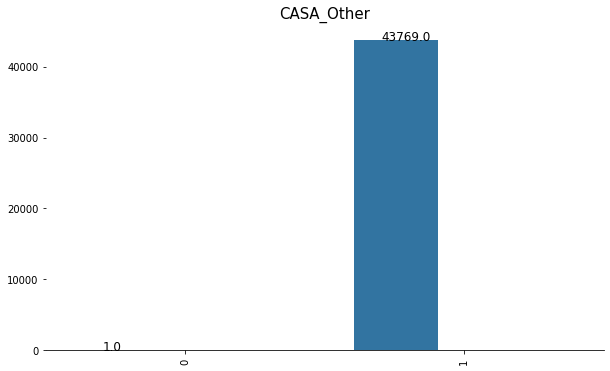

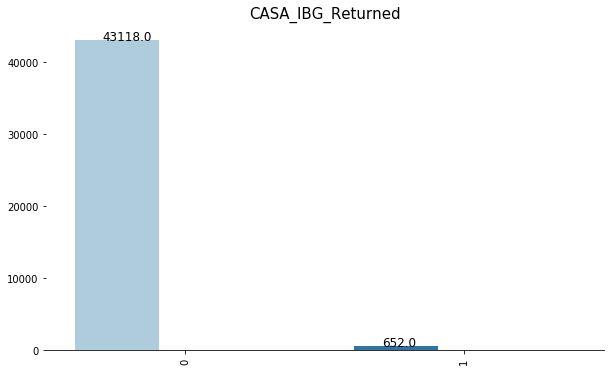

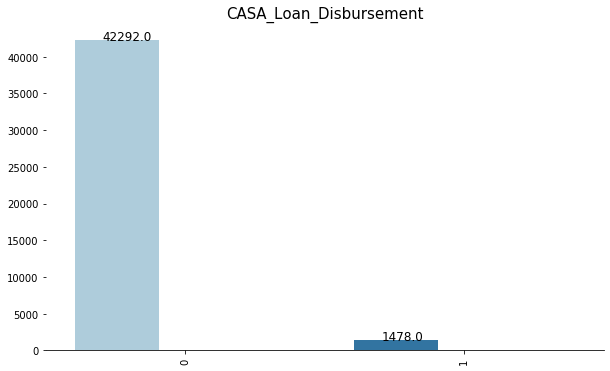

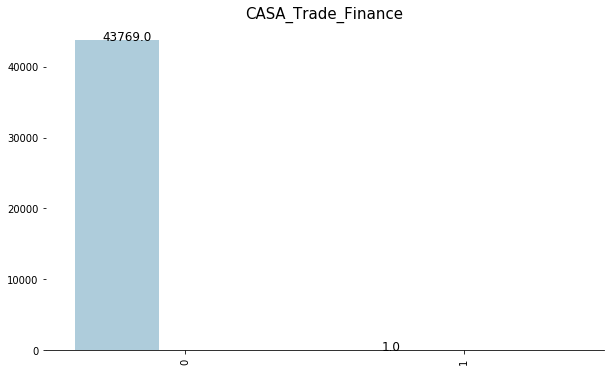

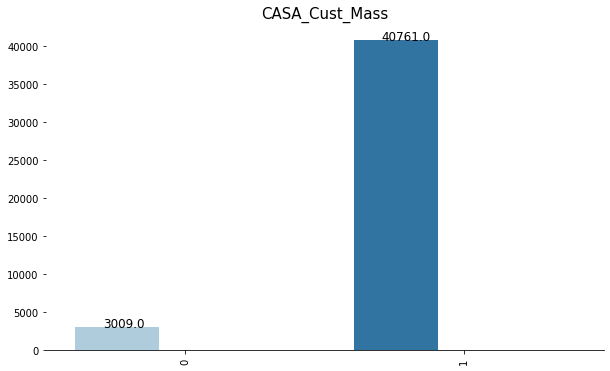

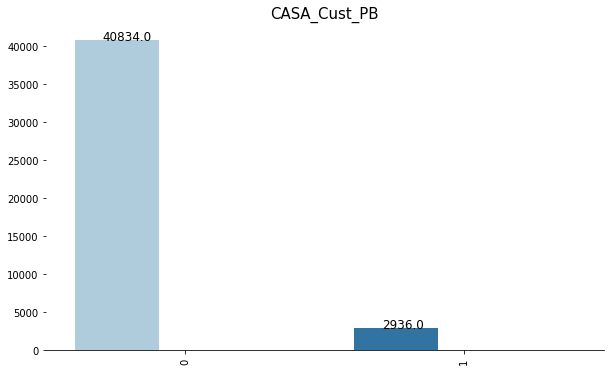

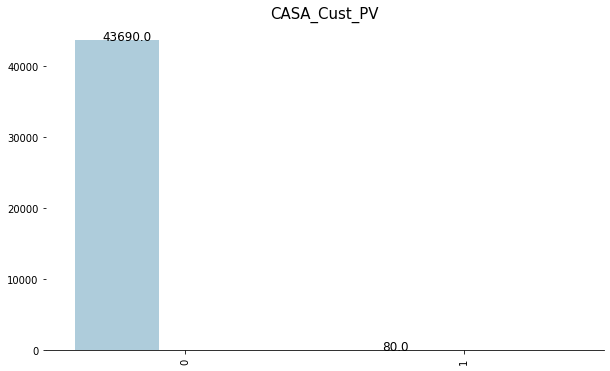

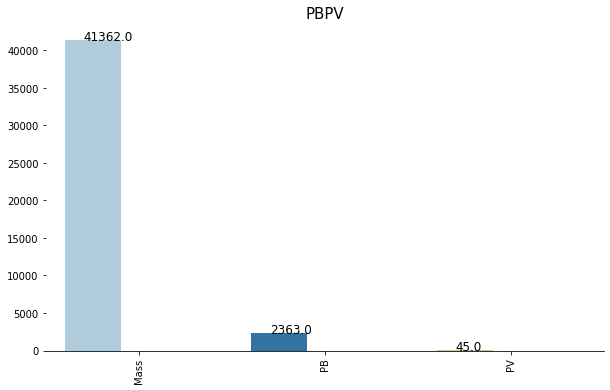

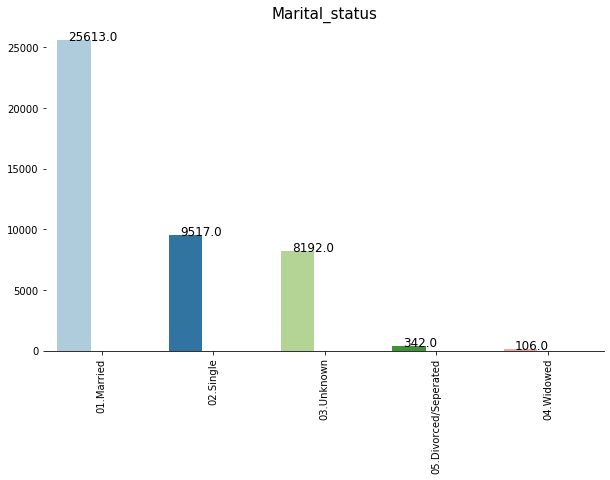

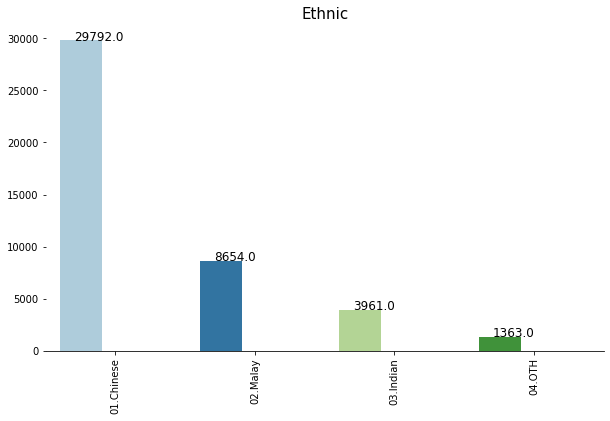

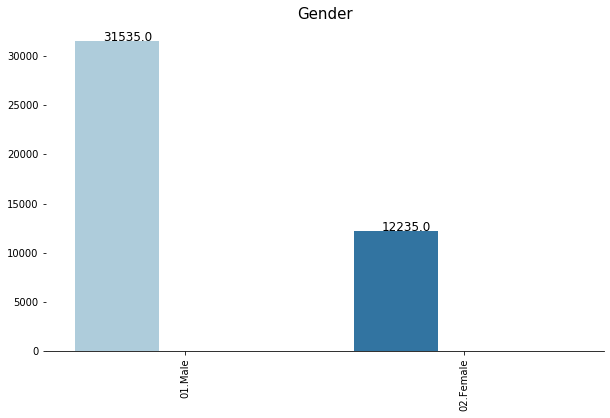

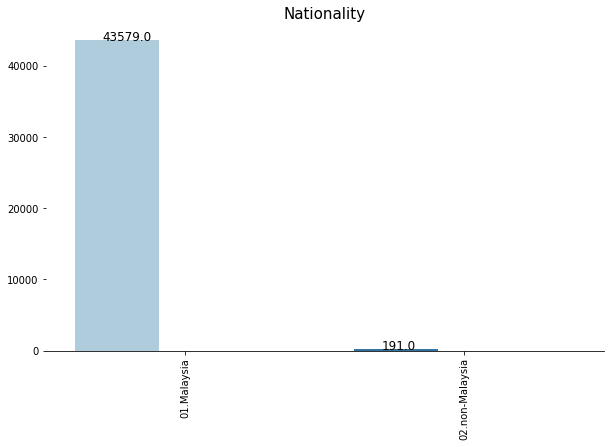

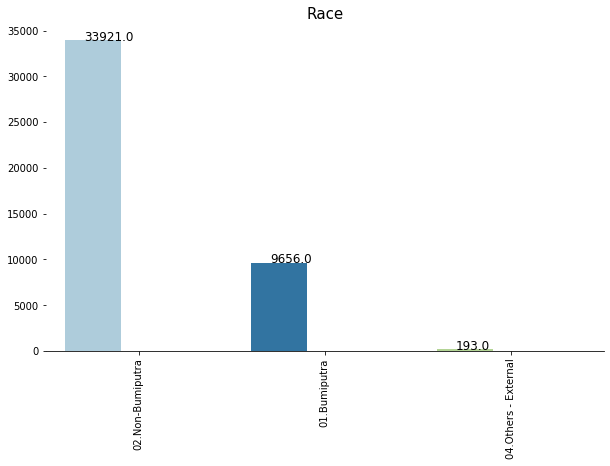

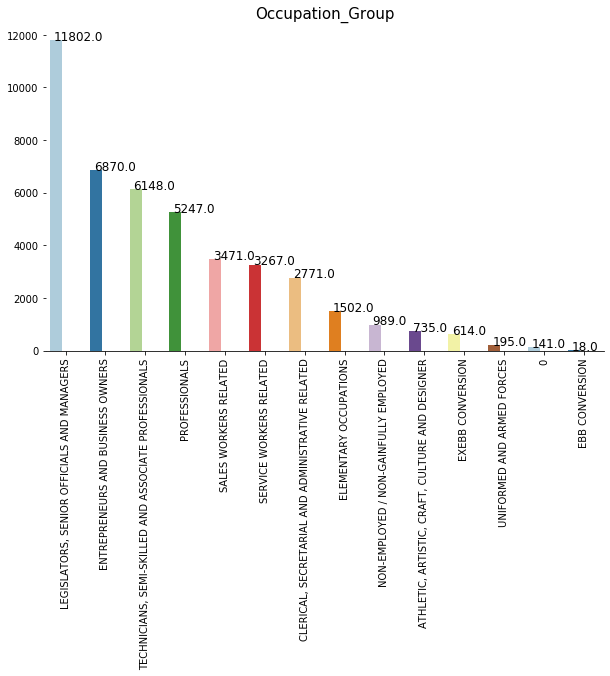

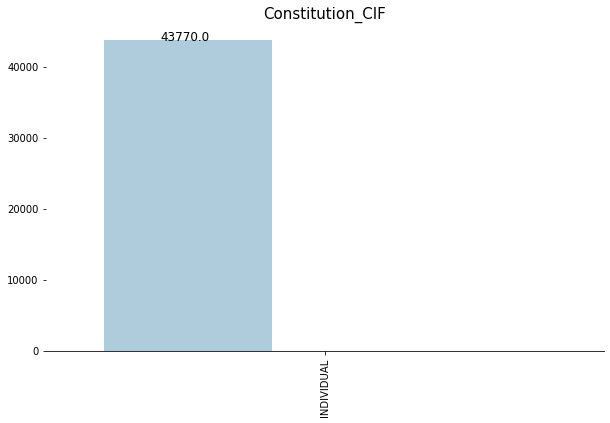

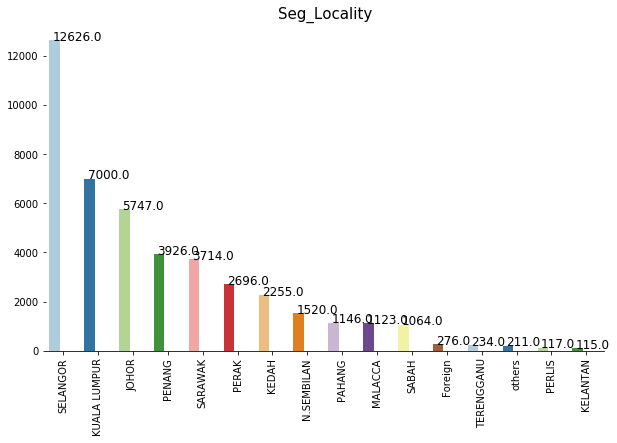

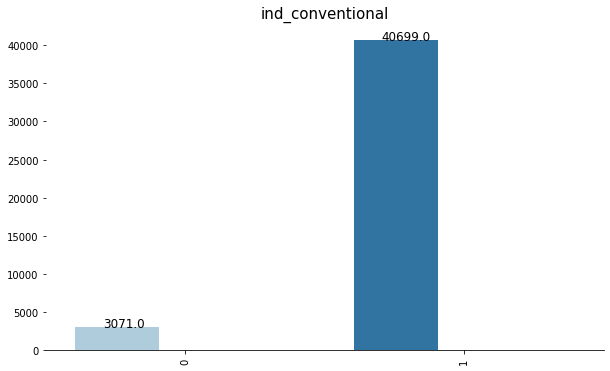

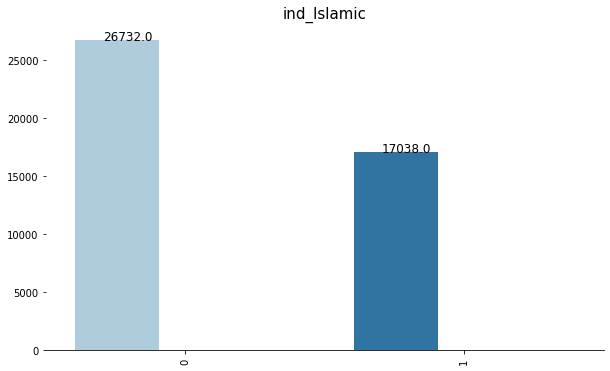

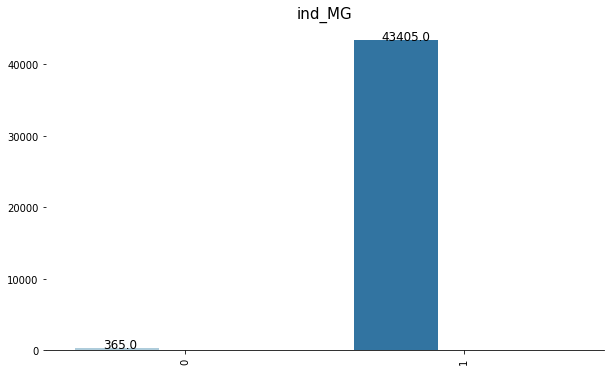

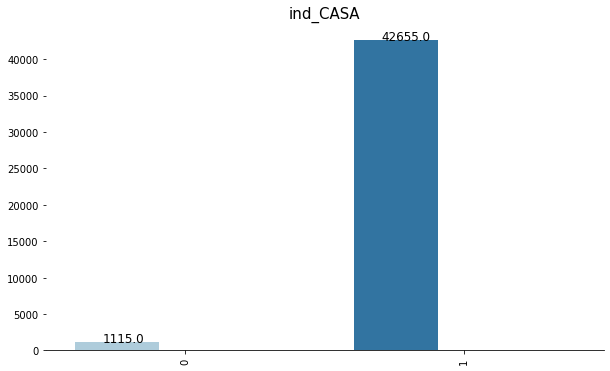

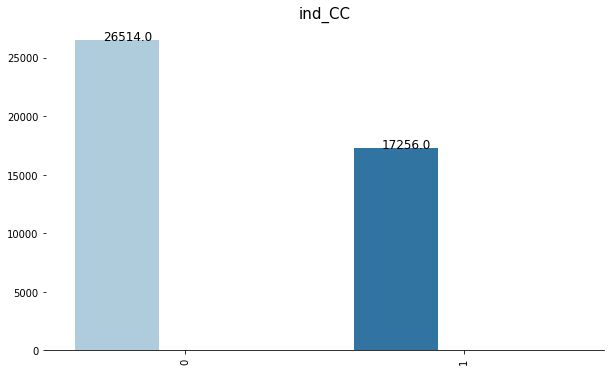

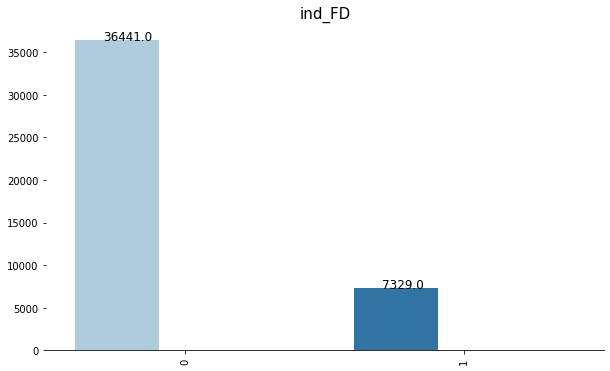

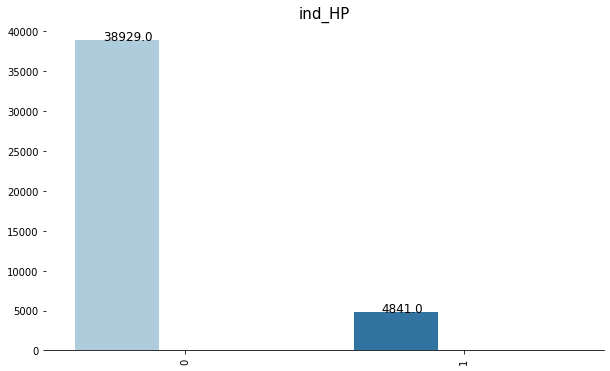

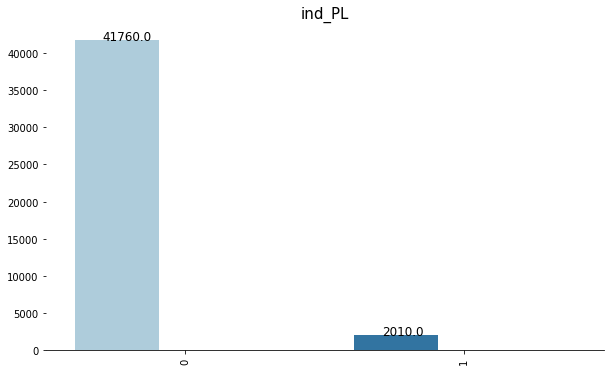

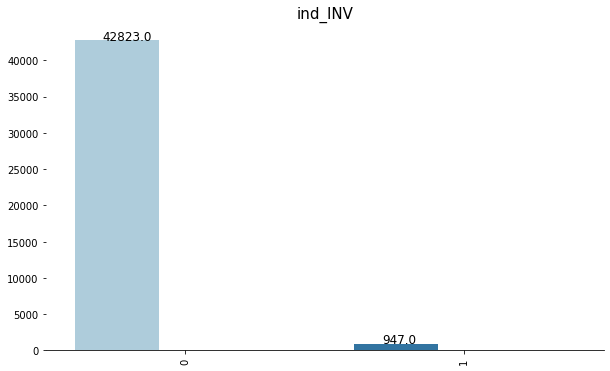

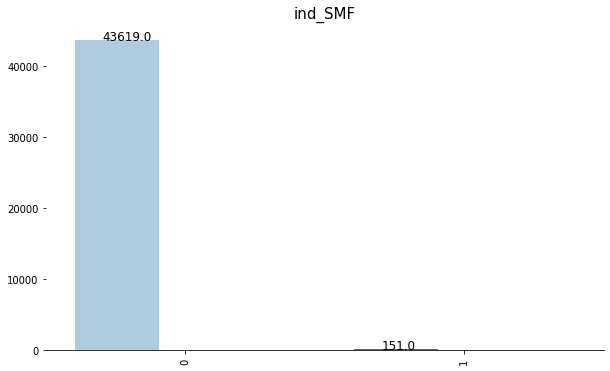

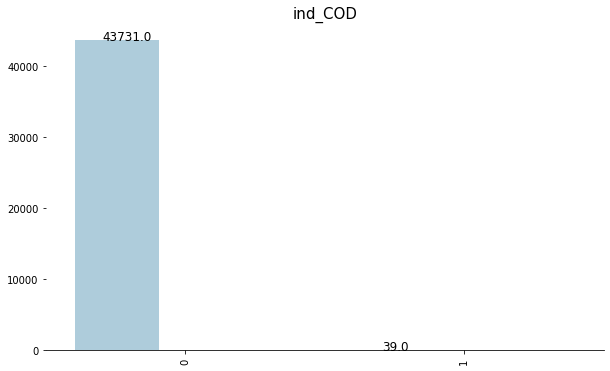

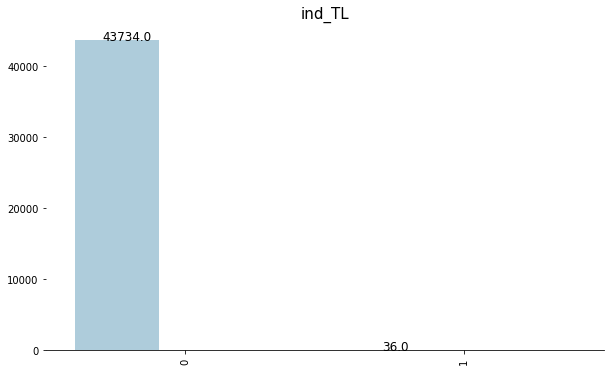

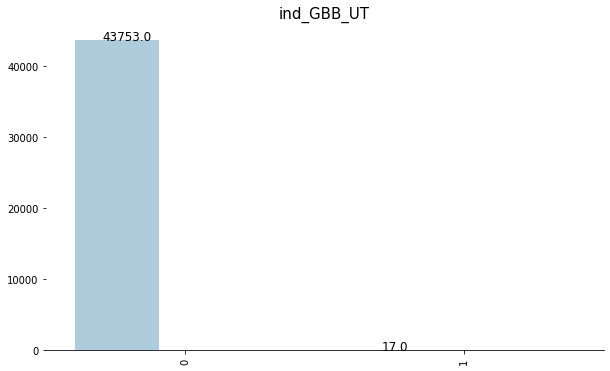

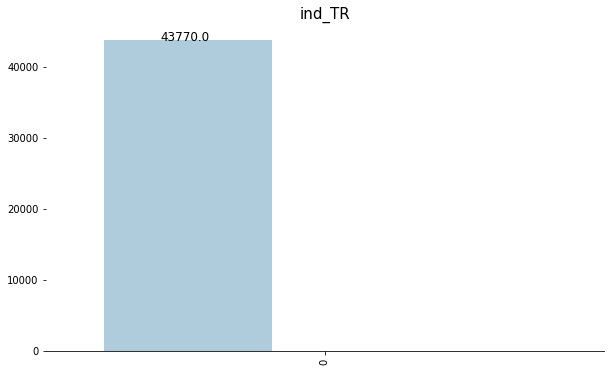

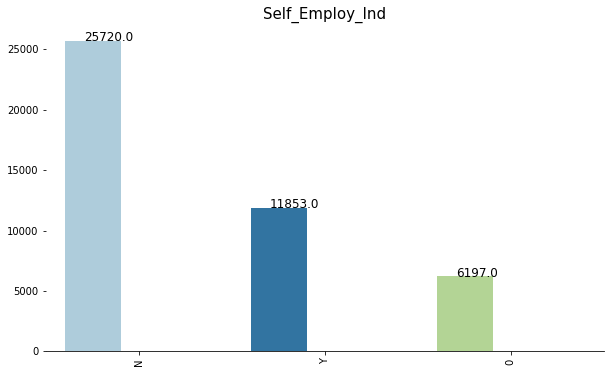

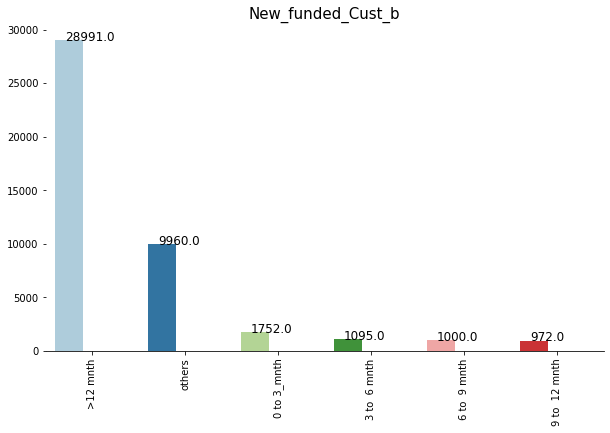

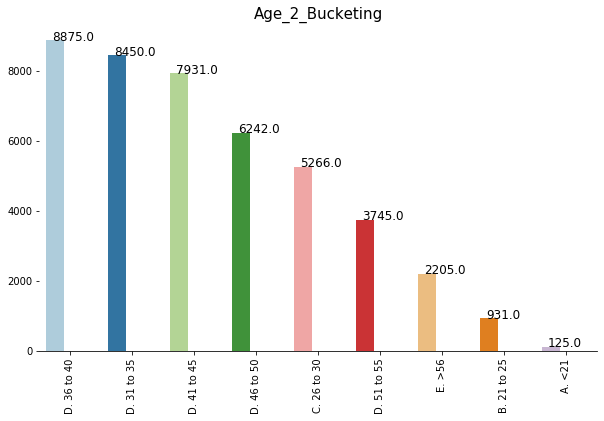

In [51]:
#Finds significant categorical vars 
cat=['CASA_Internal_Transfer','CASA_Cheque_Returned','CASA_Credit_Advice','CASA_Auto_Sweep','CASA_Other','CASA_IBG_Returned',
     'CASA_Loan_Disbursement','CASA_Trade_Finance','CASA_Cust_Mass','CASA_Cust_PB','CASA_Cust_PV','PBPV',
     'Marital_status','Ethnic','Gender','Nationality','Race','Occupation_Group','Constitution_CIF','Seg_Locality',
'ind_conventional','ind_Islamic','ind_MG','ind_CASA','ind_CC','ind_FD','ind_HP','ind_PL','ind_INV','ind_SMF','ind_COD',
     'ind_TL','ind_GBB_UT','ind_TR','Self_Employ_Ind','New_funded_Cust_b','Age_2_Bucketing']
for column in cat:
    def plot_categorical_count(base_data_1, column, title='', limit=10,xtick_rotation='vertical'):
        column_count = base_data_1[column].value_counts()#[:limit]
        fig = plt.figure(figsize=(10, 6))
        bar_width = 0.35
        ax=sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
        #ax.bar(x-bar_width, y, bar_width, fc='r', edgecolor='none')
        sns.despine(left=True)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=xtick_rotation)
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title(column,fontdict={'fontsize':15,'fontweight' :15,'verticalalignment': 'baseline'}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.3
            i.set_width(.3)
            i.set_x(i.get_x() + diff * .01)            
            ax.text(i.get_x()+0.1,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
    plt.show(plot_categorical_count(base_data_1, column, title=column, limit=10))

Significant Categorical count vars - with reasonable distro
 - 'CASA_Internal_Transfer', 'CASA_Cheque_Returned', 'CASA_Credit_Advice', 'CASA_Cust_Mass', 'CASA_Cust_PB'
 - 'Marital_status', 'Gender', 'ind_CC', 'ind_FD', 'ind_HP', 'ind_PL', 'Self_Employ_Ind', 'New_funded_Cust_b'

Difference in MIA/Non-MIA for above Significant categories 

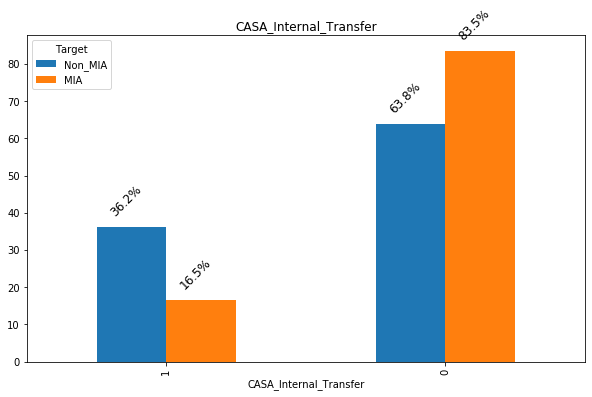

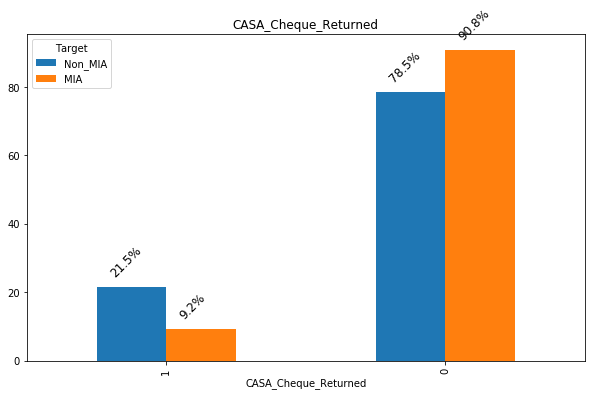

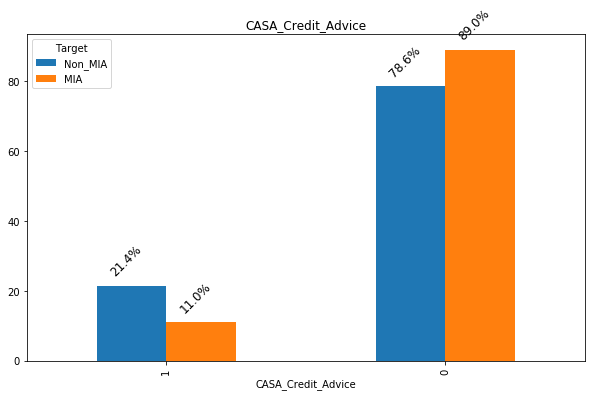

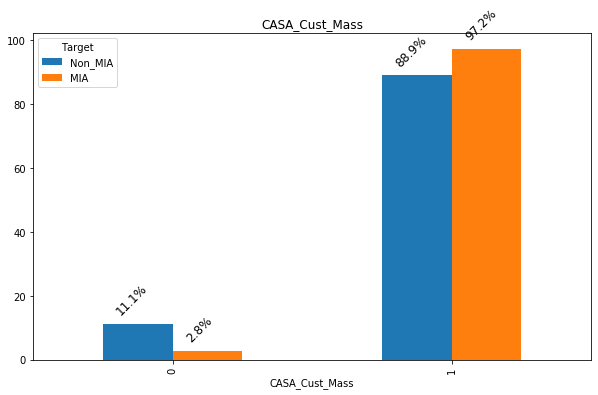

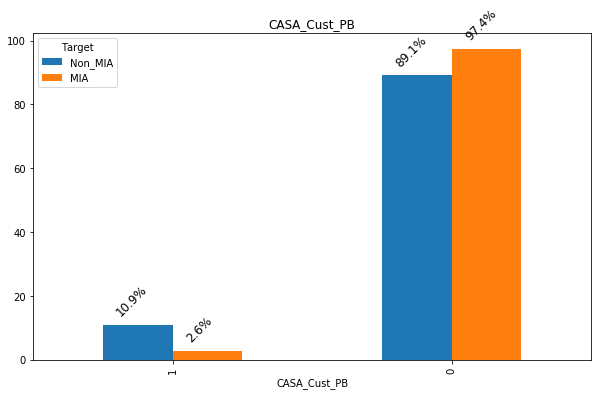

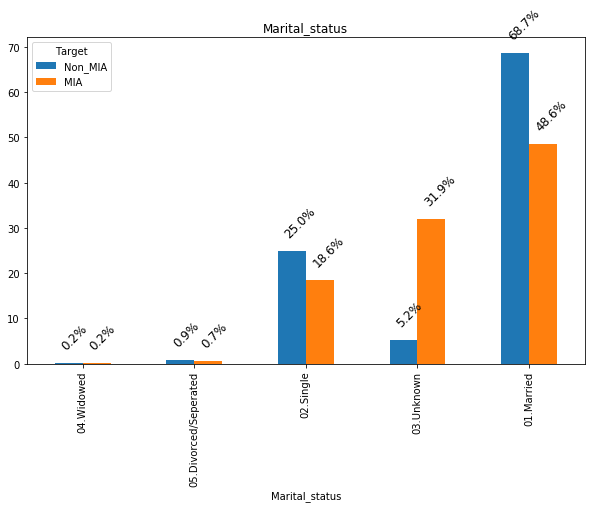

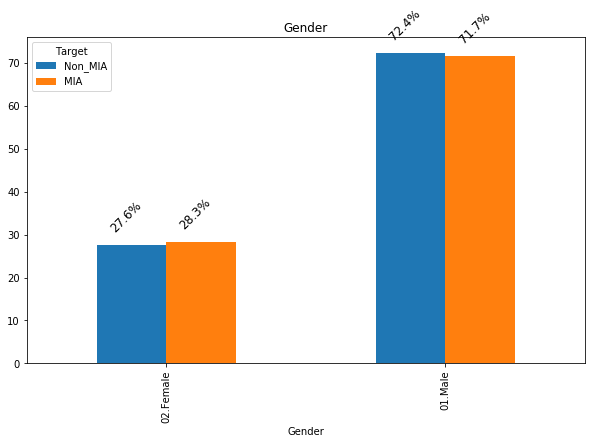

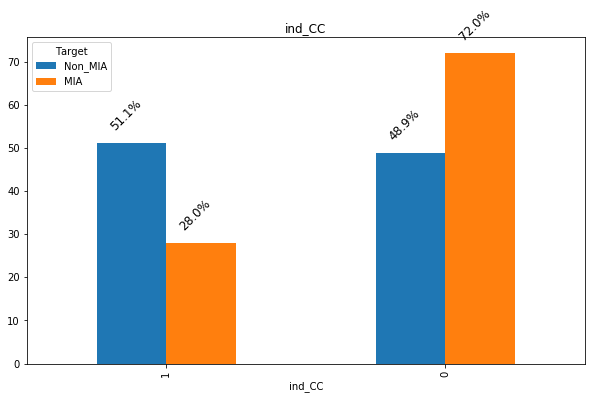

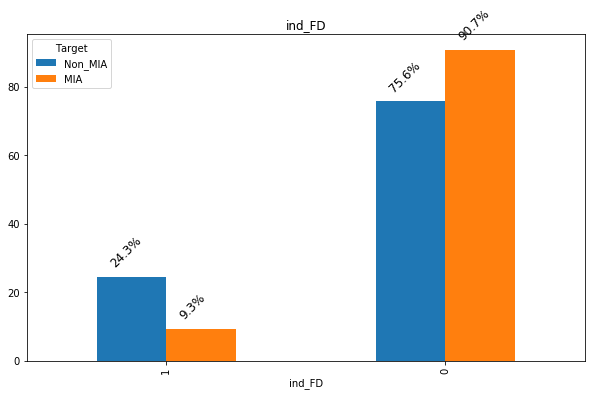

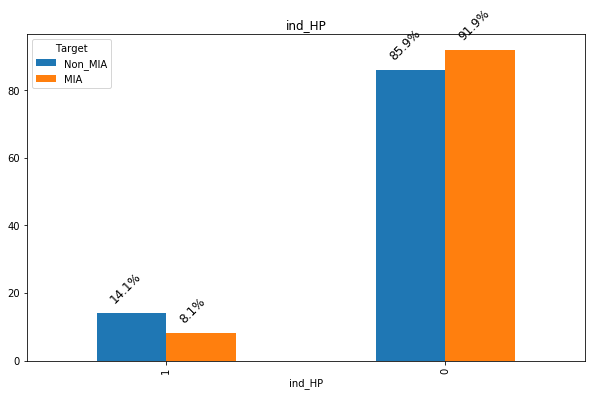

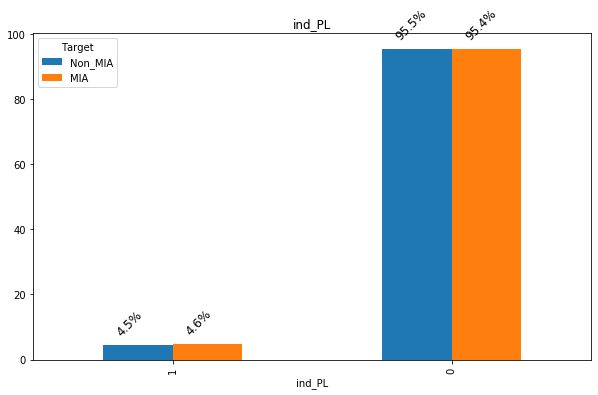

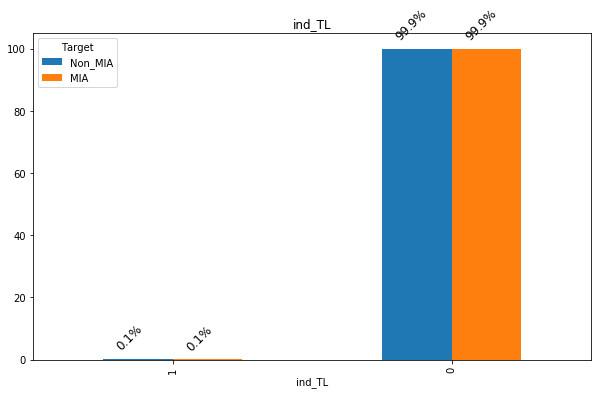

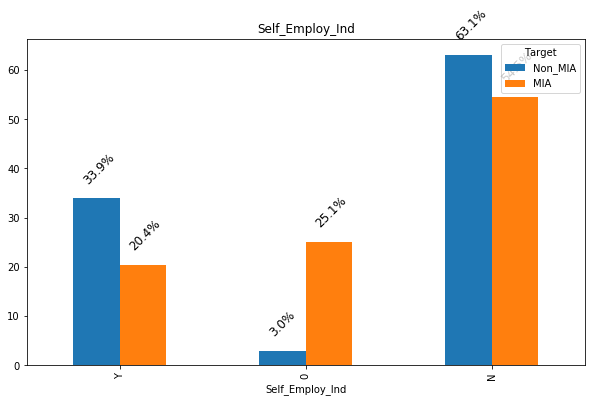

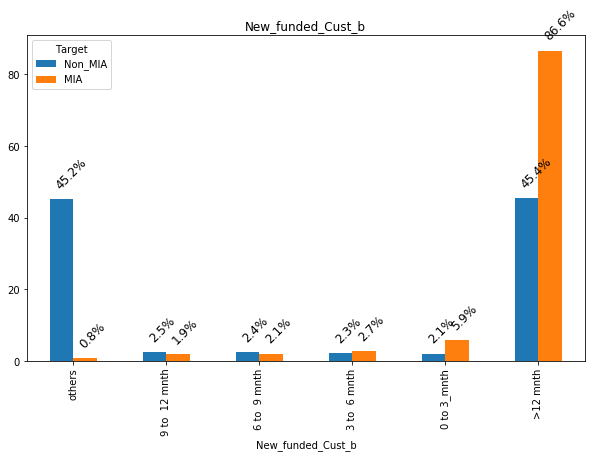

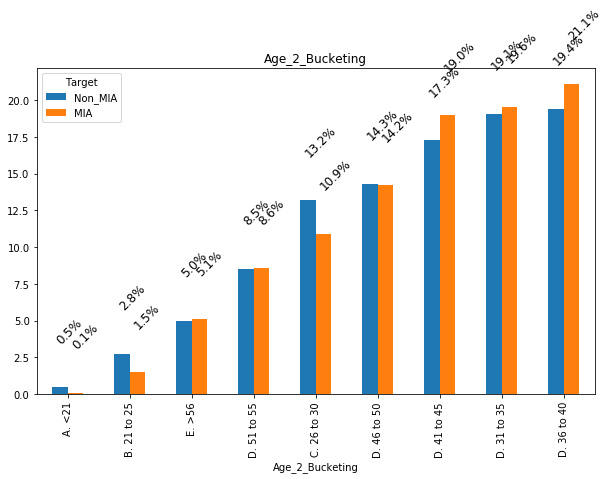

In [52]:
cats = ['CASA_Internal_Transfer', 'CASA_Cheque_Returned', 'CASA_Credit_Advice', 'CASA_Cust_Mass', 'CASA_Cust_PB'
        ,'Marital_status', 'Gender', 'ind_CC', 'ind_FD', 'ind_HP', 'ind_PL','ind_TL' ,'Self_Employ_Ind', 'New_funded_Cust_b','Age_2_Bucketing']
for name  in cats: 
    fnl=pd.crosstab(index=base_data_1[name], columns=base_data_1['Target'])
    fnl['Non_MIA']=np.round(fnl[0]/fnl[0].sum(),4)*100
    fnl['MIA']=np.round(fnl[1]/fnl[1].sum(),4)*100
    okk=fnl[['Non_MIA','MIA']].sort_values(by='MIA')#,ascending=False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
    ax=okk[['Non_MIA','MIA']].plot(kind='bar', figsize=(10,6),title=name,grid=False)#subplots=True
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.04,i.get_height()+ 3,\
                str(round((i.get_height()/100)*100, 1))+'%', fontsize=12,color='black',rotation=45)

In [53]:
#Fill Self_employ variable using description 
check1 = base_data_1[base_data_1['Self_Employ_Ind'] == 0]
check = pd.DataFrame(check1.groupby('Self_Employ_Ind')['Occupation_Group'].value_counts())
check

Occupation_Group
Self_Employ_Ind Occupation_Group                                                    
0               TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFESS...              1484
                SERVICE WORKERS RELATED                                         1118
                CLERICAL, SECRETARIAL AND ADMINISTRATIVE RELATED                 694
                SALES WORKERS RELATED                                            563
                PROFESSIONALS                                                    540
                LEGISLATORS, SENIOR OFFICIALS AND MANAGERS                       533
                ELEMENTARY OCCUPATIONS                                           505
                ENTREPRENEURS AND BUSINESS OWNERS                                288
                NON-EMPLOYED / NON-GAINFULLY EMPLOYED                            211
                ATHLETIC, ARTISTIC, CRAFT, CULTURE AND DESIGNER                  124
                UNIFORMED AND ARMED FORCES                                        76
                0                                                                 60
                EXEBB CONVERSION                                                   1

In [54]:
#To create bucketing for Age variable
base_data_1.loc[(base_data_1['Self_Employ_Ind'] == 'Y'), 'Self_Employ_Ind_2'] = 'Y'
base_data_1.loc[(base_data_1['Self_Employ_Ind'] == 'N'), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'TECHNICIANS, SEMI-SKILLED AND ASSOCIATE PROFESSIONALS') & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'SERVICE WORKERS RELATED')                               & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'CLERICAL, SECRETARIAL AND ADMINISTRATIVE RELATED')      & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'SALES WORKERS RELATED')                                 & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'PROFESSIONALS')                                         & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'LEGISLATORS, SENIOR OFFICIALS AND MANAGERS')            & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'ELEMENTARY OCCUPATIONS')                                & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'ATHLETIC, ARTISTIC, CRAFT, CULTURE AND DESIGNER')       & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'UNIFORMED AND ARMED FORCES')                            & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] ==  0)                                                      & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'EXEBB CONVERSION')                                      & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'N'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'ENTREPRENEURS AND BUSINESS OWNERS')                     & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'Y'
base_data_1.loc[(base_data_1['Occupation_Group'] == 'NON-EMPLOYED / NON-GAINFULLY EMPLOYED')                 & (base_data_1['Self_Employ_Ind'] == 0), 'Self_Employ_Ind_2'] = 'Y'


In [55]:
base_data_1.Self_Employ_Ind_2.value_counts()

N    31418
Y    12352
Name: Self_Employ_Ind_2, dtype: int64

In [56]:
base_data_1['current_balance_amt_2'].quantile([0, 0.25, 0.5, 0.75, 0.85, 0.95,0.99,0.999, 1])

0.00      -3255.68
0.25      12042.20
0.50      70182.83
0.75     149962.84
0.85     214137.66
0.95     400066.03
0.99     942578.84
1.00    2513902.65
1.00   10036510.14
Name: current_balance_amt_2, dtype: float64

In [57]:
#To create bucketing for Outstanding balance >RM1 million
base_data_1.loc[(base_data_1['current_balance_amt_2'] < 0), 'b_current_balance'] = 'A. <0'
base_data_1.loc[(base_data_1['current_balance_amt_2'] >= 0)     & (base_data_1['current_balance_amt_2'] <= 10000), 'b_current_balance']  = 'B. 0 to 10k'
base_data_1.loc[(base_data_1['current_balance_amt_2'] > 10000)  & (base_data_1['current_balance_amt_2'] <= 60000), 'b_current_balance']  = 'C. 10k to 60k'
base_data_1.loc[(base_data_1['current_balance_amt_2'] > 60000)  & (base_data_1['current_balance_amt_2'] <= 100000), 'b_current_balance'] = 'D. 60k to 100k'
base_data_1.loc[(base_data_1['current_balance_amt_2'] > 100000) & (base_data_1['current_balance_amt_2'] <= 150000), 'b_current_balance'] = 'E. 100k to 150k'
base_data_1.loc[(base_data_1['current_balance_amt_2'] > 150000) & (base_data_1['current_balance_amt_2'] <= 400000), 'b_current_balance'] = 'F. 150k to 400k'
base_data_1.loc[(base_data_1['current_balance_amt_2'] > 400000) & (base_data_1['current_balance_amt_2'] <= 900000), 'b_current_balance'] = 'G. 400k to 900k'
base_data_1.loc[(base_data_1['current_balance_amt_2'] > 900000), 'b_current_balance'] = 'H. >900K'

base_data_1.loc[(base_data_1['B_Investors'] == 1), 'B_Investors_2'] = 'A. 1'
base_data_1.loc[(base_data_1['B_Investors'] == 2), 'B_Investors_2'] = 'B. 2'
base_data_1.loc[(base_data_1['B_Investors'] == 3), 'B_Investors_2'] = 'C. 3'
base_data_1.loc[(base_data_1['B_Investors'] > 3), 'B_Investors_2'] = 'D. >4'

#To create bucketing for new_funded_group
base_data_1.loc[(base_data_1['Newly_funded_Cust'] < 0)  & (base_data_1['Newly_funded_Cust'] <= 3), 'New_funded_Cust_b_2'] = 'A. 0 to 3_mnth'
base_data_1.loc[(base_data_1['Newly_funded_Cust'] >  3)  & (base_data_1['Newly_funded_Cust'] <= 6), 'New_funded_Cust_b_2'] = 'B. 3 to 6 mnth'
base_data_1.loc[(base_data_1['Newly_funded_Cust'] >  6)  & (base_data_1['Newly_funded_Cust'] <= 9), 'New_funded_Cust_b_2'] = 'C. 6 to 9 mnth'
base_data_1.loc[(base_data_1['Newly_funded_Cust'] >  9)  & (base_data_1['Newly_funded_Cust'] <= 12), 'New_funded_Cust_b_2'] = 'D. 9 to 12 mnth'
base_data_1.loc[(base_data_1['Newly_funded_Cust'] > 12), 'New_funded_Cust_b_2'] = 'E. >12 mnth'

base_data_1['New_funded_Cust_b_2'].value_counts()

E. >12 mnth        28991
B. 3 to 6 mnth      1095
C. 6 to 9 mnth      1000
A. 0 to 3_mnth       973
D. 9 to 12 mnth      972
Name: New_funded_Cust_b_2, dtype: int64

In [58]:
base_data_1['Age_2_Bucketing'].value_counts()

D. 36 to 40    8875
D. 31 to 35    8450
D. 41 to 45    7931
D. 46 to 50    6242
C. 26 to 30    5266
D. 51 to 55    3745
E. >56         2205
B. 21 to 25     931
A. <21          125
Name: Age_2_Bucketing, dtype: int64

In [59]:
t1 = base_data_1[base_data_1['Target'] == 0]
t1['Age_2_Bucketing'].value_counts()

D. 36 to 40    4204
D. 31 to 35    4126
D. 41 to 45    3738
D. 46 to 50    3099
C. 26 to 30    2853
D. 51 to 55    1847
E. >56         1082
B. 21 to 25     597
A. <21          103
Name: Age_2_Bucketing, dtype: int64

In [60]:
def test_func(base_data_1):
    if base_data_1['ind_HP'] == 1 or base_data_1['ind_PL'] == 1 or base_data_1['ind_TL'] == 1:
        return 1
    else:
        return 0

base_data_1['ind_Loan_grt1'] = base_data_1.apply(test_func, axis=1)

In [61]:
base_data_1.head()

,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2,r_Int,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,MIA_DATE_1,CASA_Cr_Cnt_Q1_1,CASA_Cr_Cnt_Q2_1,CASA_Cr_Cnt_Q3_1,CASA_Cr_Cnt_Q4_1,CASA_Db_Cnt_Q1_1,CASA_Db_Cnt_Q2_1,CASA_Db_Cnt_Q3_1,CASA_Db_Cnt_Q4_1,Age_2_Bucketing,Self_Employ_Ind_2,b_current_balance,B_Investors_2,New_funded_Cust_b_2,ind_Loan_grt1
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27881009591,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,323.00,620.01,323.00,100.00,373.00,310.00,323.00,310.00,306.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,2.00,1.00,3.00,1.00,2.00,1.00,1.00,33774678,240.00,70.00,0.50,2007-12-03,39900.00,0.00,39900.00,39900.00,306.00,0.00,2008-02-27,2030-06-01,10586350,0,0,0,0,1,0,0,0,1,0,0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1984-06-24,1,2012-10-15,55.00,0,28.00,35.00,>12 mnth,2,39612.82,0.10,0.00,0.00,0.00,240.00,0.00,0.00,0.00,334.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,2012-10,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,B.1 to 5,C. 26 to 30,N,C. 10k to 60k,B. 2,E. >12 mnth,0
2881020764,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,450.00,0.01,0.00,412.25,412.00,1800.00,1803.00,250.00,250.00,1450.00,1450.00,0.00,0.00,610.01,601.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,2.00,3.00,3.00,4.00,1.00,1.00,5.00,4.00,0.00,0.00,4.00,4.00,7024942,240.00,163.00,0.68,2000-03-01,157529.00,0.00,157529.00,157529.00,1299.00,0.00,2000-07-12,2020-08-01,4201408,1,0,1,0,1,0,0,0,1,0,0,118513.34,Mass,02.Single,01.Chinese,01.Male,01.Malaysia,02.Non-Bumiputra,PROFESSIONALS,INDIVIDUAL,KUALA LUMPUR,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1961-09-19,1,2011-05-15,130.00,N,49.00,58.00,>12 mnth,1,140377.76,0.07,0.00,0.00,820.75,0.00,0.00,0.00,821.67,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.67,0.00,2011-05,A.0 to 1,A.0 to 1,B.1 to 5,A.0 to 1,A.0 to 1,A.0 to 1,B.1 to 5,A.0 to 1,D. 46 to 50,N,E. 100k to 150k,A. 1,E. >12 mnth,0
26281014321,1000.16,1106.00,0.00,402.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,6.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34992792,360.00,62.00,0.17,2008-08-26,317550.00,0.00,317550.00,317550.00,1996.00,0.00,2009-02-06,2039-02-01,1325173,

### WOE

In [62]:
print(base_data_1.columns.values)

['CASA_Cr_1' 'CASA_Dr_1' 'CASA_Cr_2' 'CASA_Dr_2' 'CASA_Cr_3' 'CASA_Dr_3'
 'CASA_Cr_4' 'CASA_Dr_4' 'CASA_Cr_5' 'CASA_Dr_5' 'CASA_Cr_6' 'CASA_Dr_6'
 'CASA_Cr_7' 'CASA_Dr_7' 'CASA_Cr_8' 'CASA_Dr_8' 'CASA_Cr_9' 'CASA_Dr_9'
 'CASA_Cr_10' 'CASA_Dr_10' 'CASA_Cr_11' 'CASA_Dr_11' 'CASA_Cr_12'
 'CASA_Dr_12' 'CASA_Cr_Cnt_1' 'CASA_Dr_Cnt_1' 'CASA_Cr_Cnt_2'
 'CASA_Dr_Cnt_2' 'CASA_Cr_Cnt_3' 'CASA_Dr_Cnt_3' 'CASA_Cr_Cnt_4'
 'CASA_Dr_Cnt_4' 'CASA_Cr_Cnt_5' 'CASA_Dr_Cnt_5' 'CASA_Cr_Cnt_6'
 'CASA_Dr_Cnt_6' 'CASA_Cr_Cnt_7' 'CASA_Dr_Cnt_7' 'CASA_Cr_Cnt_8'
 'CASA_Dr_Cnt_8' 'CASA_Cr_Cnt_9' 'CASA_Dr_Cnt_9' 'CASA_Cr_Cnt_10'
 'CASA_Dr_Cnt_10' 'CASA_Cr_Cnt_11' 'CASA_Dr_Cnt_11' 'CASA_Cr_Cnt_12'
 'CASA_Dr_Cnt_12' 'CIFNO' 'k_Loan_Term' 'K_Remaining_Term'
 'Ln_Completion_Ratio' 'Application_Dt' 'Applied_Amt' 'Property_Value'
 'Approved_Amt' 'Released_Amt' 'a_Repayment' 'a_Advance_Payment'
 'dt_Opened' 'dt_OriginalMaturity' 'party_ID' 'CASA_Internal_Transfer'
 'CASA_Cheque_Returned' 'CASA_Credit_Advice' 'CASA_Auto_S

In [63]:
woe_vars = base_data_1[['CASA_Cr_Q1','CASA_Cr_Q2','CASA_Cr_Q3','CASA_Cr_Q4','CASA_Db_Q1','CASA_Db_Q2','CASA_Db_Q3','CASA_Db_Q4',
                        'CASA_Cr_Cnt_Q1_1','CASA_Cr_Cnt_Q2_1','CASA_Cr_Cnt_Q3_1','CASA_Cr_Cnt_Q4_1','CASA_Db_Cnt_Q1_1',
                        'CASA_Db_Cnt_Q2_1','CASA_Db_Cnt_Q3_1','CASA_Db_Cnt_Q4_1',
                'CASA_Internal_Transfer','CASA_Cheque_Returned','CASA_Credit_Advice','CASA_Cust_Mass','CASA_Cust_PB',
                'Marital_status','Gender','ind_CC','ind_FD','ind_HP','ind_PL','ind_TL','Self_Employ_Ind_2','New_funded_Cust_b_2'
               ,'B_Investors_2','Age_2_Bucketing','b_current_balance','ind_Loan_grt1','Target']]

In [64]:
woe_vars.head()

,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1_1,CASA_Cr_Cnt_Q2_1,CASA_Cr_Cnt_Q3_1,CASA_Cr_Cnt_Q4_1,CASA_Db_Cnt_Q1_1,CASA_Db_Cnt_Q2_1,CASA_Db_Cnt_Q3_1,CASA_Db_Cnt_Q4_1,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Cust_Mass,CASA_Cust_PB,Marital_status,Gender,ind_CC,ind_FD,ind_HP,ind_PL,ind_TL,Self_Employ_Ind_2,New_funded_Cust_b_2,B_Investors_2,Age_2_Bucketing,b_current_balance,ind_Loan_grt1,Target
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27881009591,0.00,0.00,0.00,240.00,0.00,0.00,0.00,334.00,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,B.1 to 5,0,0,0,1,0,03.Unknown,02.Female,0,0,0,0,0,N,E. >12 mnth,B. 2,C. 26 to 30,C. 10k to 60k,0,1
2881020764,0.00,0.00,820.75,0.00,0.00,0.00,821.67,0.00,A.0 to 1,A.0 to 1,B.1 to 5,A.0 to 1,A.0 to 1,A.0 to 1,B.1 to 5,A.0 to 1,1,0,1,1,0,02.Single,01.Male,0,0,0,0,0,N,E. >12 mnth,A. 1,D. 46 to 50,E. 100k to 150k,0,1
26281014321,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,0,0,0,1,0,03.Unknown,01.Male,0,1,0,0,0,N,E. >12 mnth,A. 1,D. 36 to 40,F. 150k to 400k,0,1
1181046906,1683.83,3006.40,4497.10,120854.59,2079.87,2353.25,5953.18,57267.50,B.1 to 5,B.1 to 5,C.5 to 10,C.5 to 10,B.1 to 5,B.1 to 5,B.1 to 5,C.5 to 10,1,0,1,0,1,01.Married,01.Male,1,0,0,0,0,Y,E. >12 mnth,C. 3,D. 31 to 35,B. 0 to 10k,0,1
17381001075,0.02,0.02,0.02,0.02,0.00,0.00,0.00,0.00,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,0,0,0,1,0,01.Married,02.Female,0,0,0,0,0,N,E. >12 mnth,A. 1,D. 46 to 50,C. 10k to 60k,0,1


In [65]:
cols = ['CASA_Cr_Q1','CASA_Cr_Q2','CASA_Cr_Q3','CASA_Cr_Q4','CASA_Db_Q1','CASA_Db_Q2','CASA_Db_Q3','CASA_Db_Q4']
for col in cols:
    print(base_data_1[col].quantile([0, 0.75, 0.85, 0.95,0.96,0.97,0.99,0.999, 1]))

0.00         0.00
0.75       300.01
0.85      1817.36
0.95     20177.68
0.96     29266.88
0.97     45416.22
0.99    156941.95
1.00    776563.36
1.00   3023230.69
Name: CASA_Cr_Q1, dtype: float64
0.00          0.00
0.75        466.80
0.85       2249.93
0.95      23200.18
0.96      33409.86
0.97      51495.55
0.99     174452.63
1.00     942902.44
1.00   39901999.97
Name: CASA_Cr_Q2, dtype: float64
0.00          0.00
0.75        850.22
0.85       3405.38
0.95      31163.81
0.96      42495.93
0.97      61256.85
0.99     193012.95
1.00    1104606.97
1.00   16510691.79
Name: CASA_Cr_Q3, dtype: float64
0.00         0.00
0.75       865.51
0.85      3896.33
0.95     36856.05
0.96     50132.70
0.97     75070.50
0.99    209058.55
1.00    910342.02
1.00   8156522.67
Name: CASA_Cr_Q4, dtype: float64
0.00         0.00
0.75       387.83
0.85      1985.33
0.95     19986.49
0.96     28510.33
0.97     43640.44
0.99    157285.65
1.00    719842.18
1.00   2974363.33
Name: CASA_Db_Q1, dtype: float64
0.00   

In [66]:
bins = [-1,100,1000,5000,10000,20000,50000,100000,200000,500000,10000000]
category = ['A.0 to 0.1k','B. 0.1k to 1k','C. 1k to 5k','D. 5k to 10k','E. 10k to 20k','F. 20k to 50k',
            'G. 50k to 100k','H. 100k to 200k','I. 200k to 500k','J. >500k']
woe_vars['CASA_Cr_Q1_1'] = pd.cut(woe_vars["CASA_Cr_Q1"],bins,labels = category)
woe_vars['CASA_Cr_Q2_1'] = pd.cut(woe_vars["CASA_Cr_Q2"],bins,labels = category)
woe_vars['CASA_Cr_Q3_1'] = pd.cut(woe_vars["CASA_Cr_Q3"],bins,labels = category)
woe_vars['CASA_Cr_Q4_1'] = pd.cut(woe_vars["CASA_Cr_Q4"],bins,labels = category)

woe_vars['CASA_Db_Q1_1'] = pd.cut(woe_vars["CASA_Db_Q1"],bins,labels = category)
woe_vars['CASA_Db_Q2_1'] = pd.cut(woe_vars["CASA_Db_Q2"],bins,labels = category)
woe_vars['CASA_Db_Q3_1'] = pd.cut(woe_vars["CASA_Db_Q3"],bins,labels = category)
woe_vars['CASA_Db_Q4_1'] = pd.cut(woe_vars["CASA_Db_Q4"],bins,labels = category)   

In [67]:
woe_vars_1 = woe_vars[['CASA_Cr_Q1_1','CASA_Cr_Q2_1','CASA_Cr_Q3_1','CASA_Cr_Q4_1','CASA_Db_Q1_1','CASA_Db_Q2_1', 
                       'CASA_Db_Q3_1','CASA_Db_Q4_1','CASA_Cr_Cnt_Q1_1','CASA_Cr_Cnt_Q2_1','CASA_Cr_Cnt_Q3_1','CASA_Cr_Cnt_Q4_1',
                       'CASA_Db_Cnt_Q1_1','CASA_Db_Cnt_Q2_1','CASA_Db_Cnt_Q3_1','CASA_Db_Cnt_Q4_1', 
                       'CASA_Internal_Transfer', 'CASA_Cheque_Returned', 'CASA_Credit_Advice', 'CASA_Cust_Mass', 'CASA_Cust_PB',
                       'Marital_status', 'Gender', 'ind_CC', 'ind_FD', 'ind_HP', 'ind_PL', 'ind_TL', 'Self_Employ_Ind_2',
                       'New_funded_Cust_b_2', 'B_Investors_2', 'Age_2_Bucketing', 'b_current_balance', 'ind_Loan_grt1', 'Target']]

In [594]:
'''
def iv_woe(var):
    f = woe_vars_1.groupby(var, as_index=False).agg({"Target": ["count", "sum"]})
    f.columns = ['Buckets', 'N', 'MIA']
    f['% of MIA'] = np.maximum(f['MIA'], 0.5) / f['MIA'].sum()
    f['Non-MIA'] = f['N'] - f['MIA']
    f['% of Non-MIA'] = np.maximum(f['Non-MIA'], 0.5) / f['Non-MIA'].sum()
    f['WoE'] = np.log(f['% of MIA']/f['% of Non-MIA'])
    f['IV'] = f['WoE'] * (f['% of MIA'] - f['% of Non-MIA'])
    f['var_name'] = np.resize(var,len(f))
    f2 = f[['var_name','Buckets','WoE','IV']]
    return f2
    print("IV value is",f2['IV'].sum())
    
for var in numlist:
    df = iv_woe(woe_vars_1[var])
df
'''

'\ndef iv_woe(var):\n    f = woe_vars_1.groupby(var, as_index=False).agg({"Target": ["count", "sum"]})\n    f.columns = [\'Buckets\', \'N\', \'MIA\']\n    f[\'% of MIA\'] = np.maximum(f[\'MIA\'], 0.5) / f[\'MIA\'].sum()\n    f[\'Non-MIA\'] = f[\'N\'] - f[\'MIA\']\n    f[\'% of Non-MIA\'] = np.maximum(f[\'Non-MIA\'], 0.5) / f[\'Non-MIA\'].sum()\n    f[\'WoE\'] = np.log(f[\'% of MIA\']/f[\'% of Non-MIA\'])\n    f[\'IV\'] = f[\'WoE\'] * (f[\'% of MIA\'] - f[\'% of Non-MIA\'])\n    f[\'var_name\'] = np.resize(var,len(f))\n    f2 = f[[\'var_name\',\'Buckets\',\'WoE\',\'IV\']]\n    return f2\n    print("IV value is",f2[\'IV\'].sum())\n    \nfor var in numlist:\n    df = iv_woe(woe_vars_1[var])\ndf\n'

In [68]:
numlist = ['CASA_Cr_Q1_1','CASA_Cr_Q2_1','CASA_Cr_Q3_1','CASA_Cr_Q4_1','CASA_Db_Q1_1','CASA_Db_Q2_1', 
                       'CASA_Db_Q3_1','CASA_Db_Q4_1','CASA_Cr_Cnt_Q1_1','CASA_Cr_Cnt_Q2_1','CASA_Cr_Cnt_Q3_1','CASA_Cr_Cnt_Q4_1',
                       'CASA_Db_Cnt_Q1_1','CASA_Db_Cnt_Q2_1','CASA_Db_Cnt_Q3_1','CASA_Db_Cnt_Q4_1', 
                       'CASA_Internal_Transfer', 'CASA_Cheque_Returned', 'CASA_Credit_Advice', 'CASA_Cust_Mass', 'CASA_Cust_PB',
                       'Marital_status', 'Gender', 'ind_CC', 'ind_FD', 'ind_HP', 'ind_PL', 'ind_TL', 'Self_Employ_Ind_2',
                       'New_funded_Cust_b_2', 'B_Investors_2', 'Age_2_Bucketing', 'b_current_balance', 'ind_Loan_grt1']
f3 = []
for var in numlist:
    f = woe_vars_1.groupby(var, as_index=False).agg({"Target": ["count", "sum"]})
    f.columns = ['Buckets', 'N', 'MIA']
    f['% of MIA'] = np.maximum(f['MIA'], 0.5) / f['MIA'].sum()
    f['Non-MIA'] = f['N'] - f['MIA']
    f['% of Non-MIA'] = np.maximum(f['Non-MIA'], 0.5) / f['Non-MIA'].sum()
    f['WoE'] = np.log(f['% of MIA']/f['% of Non-MIA'])
    f['IV'] = f['WoE'] * (f['% of MIA'] - f['% of Non-MIA'])
    f['var_name'] = np.resize(var,len(f))
    f2 = f[['var_name','Buckets','WoE','IV']]
    f3.append(f2)

woe_vars_2 = pd.concat(f3, ignore_index=True)


In [69]:
woe_vars_3 = pd.DataFrame(woe_vars_2.groupby('var_name')['IV'].sum())
woe_vars_3.columns = ['IV_2']
woe_vars_3.loc[(woe_vars_3['IV_2'] <  0.02), 'IV_importance'] = 'Not Good for prediction'
woe_vars_3.loc[(woe_vars_3['IV_2'] >= 0.02) & (woe_vars_3['IV_2'] < 0.1), 'IV_importance'] = 'Weak prediction'
woe_vars_3.loc[(woe_vars_3['IV_2'] >= 0.1 ) & (woe_vars_3['IV_2'] < 0.3), 'IV_importance'] = 'Medium predictive power'
woe_vars_3.loc[(woe_vars_3['IV_2'] >= 0.3 ) & (woe_vars_3['IV_2'] < 0.5), 'IV_importance'] = 'Strong predictive power'
woe_vars_3.loc[(woe_vars_3['IV_2'] >  0.5 ), 'IV_importance'] = 'Suspicious predictive power'

In [70]:
woe_vars_3.IV_importance.value_counts()

Medium predictive power        14
Weak prediction                13
Not Good for prediction         4
Strong predictive power         2
Suspicious predictive power     1
Name: IV_importance, dtype: int64

In [71]:
woe_vars_4 = woe_vars_2.merge(woe_vars_3, on='var_name',how='left')
woe_vars_4.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\MIA_IV_WoE_update_1.xlsx')

Apply WOE values to dataframe columns

In [72]:
transform_vars_list = woe_vars.columns.difference(['Target'])
transform_prefix = 'WOE_' # leave this value blank if you need replace the original column values

In [73]:
transform_vars_list

Index(['Age_2_Bucketing', 'B_Investors_2', 'CASA_Cheque_Returned',
       'CASA_Cr_Cnt_Q1_1', 'CASA_Cr_Cnt_Q2_1', 'CASA_Cr_Cnt_Q3_1',
       'CASA_Cr_Cnt_Q4_1', 'CASA_Cr_Q1', 'CASA_Cr_Q1_1', 'CASA_Cr_Q2',
       'CASA_Cr_Q2_1', 'CASA_Cr_Q3', 'CASA_Cr_Q3_1', 'CASA_Cr_Q4',
       'CASA_Cr_Q4_1', 'CASA_Credit_Advice', 'CASA_Cust_Mass', 'CASA_Cust_PB',
       'CASA_Db_Cnt_Q1_1', 'CASA_Db_Cnt_Q2_1', 'CASA_Db_Cnt_Q3_1',
       'CASA_Db_Cnt_Q4_1', 'CASA_Db_Q1', 'CASA_Db_Q1_1', 'CASA_Db_Q2',
       'CASA_Db_Q2_1', 'CASA_Db_Q3', 'CASA_Db_Q3_1', 'CASA_Db_Q4',
       'CASA_Db_Q4_1', 'CASA_Internal_Transfer', 'Gender', 'Marital_status',
       'New_funded_Cust_b_2', 'Self_Employ_Ind_2', 'b_current_balance',
       'ind_CC', 'ind_FD', 'ind_HP', 'ind_Loan_grt1', 'ind_PL', 'ind_TL'],
      dtype='object')

In [74]:
woe_vars_4.tail()

,var_name,Buckets,WoE,IV,IV_2,IV_importance
164,b_current_balance,F. 150k to 400k,-0.56,0.06,0.19,Medium predictive power
165,b_current_balance,G. 400k to 900k,-0.92,0.03,0.19,Medium predictive power
166,b_current_balance,H. >900K,-0.82,0.01,0.19,Medium predictive power
167,ind_Loan_grt1,0,0.07,0.00,0.03,Weak prediction
168,ind_Loan_grt1,1,-0.38,0.02,0.03,Weak prediction


In [75]:
woe_vars_2.reset_index(inplace=True)

In [76]:
for var in transform_vars_list:
    small_df = woe_vars_4[woe_vars_4['var_name'] == var]
    transform_dict = dict(zip(small_df.Buckets,small_df.WoE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            woe_vars[transform_prefix + var] = woe_vars[var].apply(lambda x: eval(replace_cmd))
        except:
            woe_vars[transform_prefix + var] = woe_vars[var].apply(lambda x: eval(replace_cmd1))

In [77]:
woe_vars.columns

Index(['CASA_Cr_Q1', 'CASA_Cr_Q2', 'CASA_Cr_Q3', 'CASA_Cr_Q4', 'CASA_Db_Q1',
       'CASA_Db_Q2', 'CASA_Db_Q3', 'CASA_Db_Q4', 'CASA_Cr_Cnt_Q1_1',
       'CASA_Cr_Cnt_Q2_1', 'CASA_Cr_Cnt_Q3_1', 'CASA_Cr_Cnt_Q4_1',
       'CASA_Db_Cnt_Q1_1', 'CASA_Db_Cnt_Q2_1', 'CASA_Db_Cnt_Q3_1',
       'CASA_Db_Cnt_Q4_1', 'CASA_Internal_Transfer', 'CASA_Cheque_Returned',
       'CASA_Credit_Advice', 'CASA_Cust_Mass', 'CASA_Cust_PB',
       'Marital_status', 'Gender', 'ind_CC', 'ind_FD', 'ind_HP', 'ind_PL',
       'ind_TL', 'Self_Employ_Ind_2', 'New_funded_Cust_b_2', 'B_Investors_2',
       'Age_2_Bucketing', 'b_current_balance', 'ind_Loan_grt1', 'Target',
       'CASA_Cr_Q1_1', 'CASA_Cr_Q2_1', 'CASA_Cr_Q3_1', 'CASA_Cr_Q4_1',
       'CASA_Db_Q1_1', 'CASA_Db_Q2_1', 'CASA_Db_Q3_1', 'CASA_Db_Q4_1',
       'WOE_Age_2_Bucketing', 'WOE_B_Investors_2', 'WOE_CASA_Cheque_Returned',
       'WOE_CASA_Cr_Cnt_Q1_1', 'WOE_CASA_Cr_Cnt_Q2_1', 'WOE_CASA_Cr_Cnt_Q3_1',
       'WOE_CASA_Cr_Cnt_Q4_1', 'WOE_CASA_Cr_Q1_1', 'W

In [78]:
woe_vars_new = woe_vars[['WOE_Age_2_Bucketing', 'WOE_B_Investors_2', 'WOE_CASA_Cheque_Returned','WOE_CASA_Cr_Cnt_Q1_1',
    'WOE_CASA_Cr_Cnt_Q2_1', 'WOE_CASA_Cr_Cnt_Q3_1','WOE_CASA_Cr_Cnt_Q4_1', 'WOE_CASA_Cr_Q1_1', 'WOE_CASA_Cr_Q2_1',
    'WOE_CASA_Cr_Q3_1', 'WOE_CASA_Cr_Q4_1', 'WOE_CASA_Credit_Advice','WOE_CASA_Cust_Mass', 'WOE_CASA_Cust_PB', 'WOE_CASA_Db_Cnt_Q1_1',
    'WOE_CASA_Db_Cnt_Q2_1', 'WOE_CASA_Db_Cnt_Q3_1', 'WOE_CASA_Db_Cnt_Q4_1','WOE_CASA_Db_Q1_1', 'WOE_CASA_Db_Q2_1', 'WOE_CASA_Db_Q3_1',
    'WOE_CASA_Db_Q4_1', 'WOE_CASA_Internal_Transfer', 'WOE_Gender','WOE_Marital_status', 'WOE_New_funded_Cust_b_2', 'WOE_Self_Employ_Ind_2',
    'WOE_b_current_balance', 'WOE_ind_CC', 'WOE_ind_FD', 'WOE_ind_HP','WOE_ind_Loan_grt1', 'WOE_ind_PL', 'WOE_ind_TL']]
base_data_2 = woe_vars_new.merge(base_data_1,on='ACCTNO',how='left')

In [79]:
base_data_2.head()

,WOE_Age_2_Bucketing,WOE_B_Investors_2,WOE_CASA_Cheque_Returned,WOE_CASA_Cr_Cnt_Q1_1,WOE_CASA_Cr_Cnt_Q2_1,WOE_CASA_Cr_Cnt_Q3_1,WOE_CASA_Cr_Cnt_Q4_1,WOE_CASA_Cr_Q1_1,WOE_CASA_Cr_Q2_1,WOE_CASA_Cr_Q3_1,WOE_CASA_Cr_Q4_1,WOE_CASA_Credit_Advice,WOE_CASA_Cust_Mass,WOE_CASA_Cust_PB,WOE_CASA_Db_Cnt_Q1_1,WOE_CASA_Db_Cnt_Q2_1,WOE_CASA_Db_Cnt_Q3_1,WOE_CASA_Db_Cnt_Q4_1,WOE_CASA_Db_Q1_1,WOE_CASA_Db_Q2_1,WOE_CASA_Db_Q3_1,WOE_CASA_Db_Q4_1,WOE_CASA_Internal_Transfer,WOE_Gender,WOE_Marital_status,WOE_New_funded_Cust_b_2,WOE_Self_Employ_Ind_2,WOE_b_current_balance,WOE_ind_CC,WOE_ind_FD,WOE_ind_HP,WOE_ind_Loan_grt1,WOE_ind_PL,WOE_ind_TL,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2,r_Int,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,MIA_DATE_1,CASA_Cr_Cnt_Q1_1,CASA_Cr_Cnt_Q2_1,CASA_Cr_Cnt_Q3_1,CASA_Cr_Cnt_Q4_1,CASA_Db_Cnt_Q1_1,CASA_Db_Cnt_Q2_1,CASA_Db_Cnt_Q3_1,CASA_Db_Cnt_Q4_1,Age_2_Bucketing,Self_Employ_Ind_2,b_current_balance,B_Investors_2,New_funded_Cust_b_2,ind_Loan_grt1
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27881009591,-0.19,0.44,0.15,0.08,0.00,0.06,0.05,-0.01,-0.10,-0.12,1.30,0.13,0.09,0.09,-0.04,-0.11,-0.16,0.69,-0.04,-0.13,-0.19,1.34,0.27,0.03,1.81,0.13,0.17,0.61,0.39,0.18,0.07,0.07,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,323.00,620.01,323.00,100.00,373.00,310.00,323.00,310.00,306.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,2.00,1.00,3.00,1.00,2.00,1.00,1.00,33774678,240.00,70.00,0.50,2007-12-03,39900.00,0.00,39900.00,39900.00,306.00,0.00,2008-02-27,2030-06-01,10586350,0,0,0,0,1,0,0,0,1,0,0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1984-06-24,1,2012-10-15,55.00,0,28.00,35.00,>12 mnth,2,39612.82,0.10,0.00,0.00,0.00,240.00,0.00,0.00,0.00,334.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,2012-10,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,B.1 to 5,C. 26 to 30,N,C. 10k to 60k,B. 2,E. >12 mnth,0
2881020764,-0.01,-0.17,0.15,0.08,0.00,-0.00,0.05,-0.01,-0.10,1.12,-0.12,-0.67,0.09,0.09,-0.04,-0.11,0.63,-0.16,-0.04,-0.13,1.27,-0.18,-0.79,-0.01,-0.30,0.13,0.17,-0.22,0.39,0.18,0.07,0.07,-0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,450.00,0.01,0.00,412.25,412.00,1800.00,1803.00,250.00,250.00,1450.00,1450.00,0.00,0.00,610.01,601.00,1.00,0.00,0.00,0.00,0.00,0.00,

In [80]:
base_data_2['K_Remaining_Term_2'] = (((base_data_2['MIA_DATE'] - base_data_2['dt_Opened'])*12)/365)
base_data_2['K_Remaining_Term_2'] = base_data_2['k_Loan_Term'] - (base_data_2['K_Remaining_Term_2'] / np.timedelta64(1, 'D')) 
base_data_2['Ln_completion_Ratio_2'] = 1 - ((base_data_2['current_balance_amt_2']+0.5)/base_data_2['Approved_Amt'])

In [81]:
base_data_2.head()

,WOE_Age_2_Bucketing,WOE_B_Investors_2,WOE_CASA_Cheque_Returned,WOE_CASA_Cr_Cnt_Q1_1,WOE_CASA_Cr_Cnt_Q2_1,WOE_CASA_Cr_Cnt_Q3_1,WOE_CASA_Cr_Cnt_Q4_1,WOE_CASA_Cr_Q1_1,WOE_CASA_Cr_Q2_1,WOE_CASA_Cr_Q3_1,WOE_CASA_Cr_Q4_1,WOE_CASA_Credit_Advice,WOE_CASA_Cust_Mass,WOE_CASA_Cust_PB,WOE_CASA_Db_Cnt_Q1_1,WOE_CASA_Db_Cnt_Q2_1,WOE_CASA_Db_Cnt_Q3_1,WOE_CASA_Db_Cnt_Q4_1,WOE_CASA_Db_Q1_1,WOE_CASA_Db_Q2_1,WOE_CASA_Db_Q3_1,WOE_CASA_Db_Q4_1,WOE_CASA_Internal_Transfer,WOE_Gender,WOE_Marital_status,WOE_New_funded_Cust_b_2,WOE_Self_Employ_Ind_2,WOE_b_current_balance,WOE_ind_CC,WOE_ind_FD,WOE_ind_HP,WOE_ind_Loan_grt1,WOE_ind_PL,WOE_ind_TL,CASA_Cr_1,CASA_Dr_1,CASA_Cr_2,CASA_Dr_2,CASA_Cr_3,CASA_Dr_3,CASA_Cr_4,CASA_Dr_4,CASA_Cr_5,CASA_Dr_5,CASA_Cr_6,CASA_Dr_6,CASA_Cr_7,CASA_Dr_7,CASA_Cr_8,CASA_Dr_8,CASA_Cr_9,CASA_Dr_9,CASA_Cr_10,CASA_Dr_10,CASA_Cr_11,CASA_Dr_11,CASA_Cr_12,CASA_Dr_12,CASA_Cr_Cnt_1,CASA_Dr_Cnt_1,CASA_Cr_Cnt_2,CASA_Dr_Cnt_2,CASA_Cr_Cnt_3,CASA_Dr_Cnt_3,CASA_Cr_Cnt_4,CASA_Dr_Cnt_4,CASA_Cr_Cnt_5,CASA_Dr_Cnt_5,CASA_Cr_Cnt_6,CASA_Dr_Cnt_6,CASA_Cr_Cnt_7,CASA_Dr_Cnt_7,CASA_Cr_Cnt_8,CASA_Dr_Cnt_8,CASA_Cr_Cnt_9,CASA_Dr_Cnt_9,CASA_Cr_Cnt_10,CASA_Dr_Cnt_10,CASA_Cr_Cnt_11,CASA_Dr_Cnt_11,CASA_Cr_Cnt_12,CASA_Dr_Cnt_12,CIFNO,k_Loan_Term,K_Remaining_Term,Ln_Completion_Ratio,Application_Dt,Applied_Amt,Property_Value,Approved_Amt,Released_Amt,a_Repayment,a_Advance_Payment,dt_Opened,dt_OriginalMaturity,party_ID,CASA_Internal_Transfer,CASA_Cheque_Returned,CASA_Credit_Advice,CASA_Auto_Sweep,CASA_Other,CASA_IBG_Returned,CASA_Loan_Disbursement,CASA_Trade_Finance,CASA_Cust_Mass,CASA_Cust_PB,CASA_Cust_PV,Current_Balance_Amt,PBPV,Marital_status,Ethnic,Gender,Nationality,Race,Occupation_Group,Constitution_CIF,Seg_Locality,ind_conventional,ind_Islamic,ind_MG,ind_CASA,ind_CC,ind_FD,ind_HP,ind_PL,ind_INV,ind_SMF,ind_COD,ind_TL,ind_GBB_UT,ind_TR,DOB,Target,MIA_DATE,Newly_funded_Cust,Self_Employ_Ind,Age_2,Age_utd,New_funded_Cust_b,B_Investors,current_balance_amt_2,r_Int,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,MIA_DATE_1,CASA_Cr_Cnt_Q1_1,CASA_Cr_Cnt_Q2_1,CASA_Cr_Cnt_Q3_1,CASA_Cr_Cnt_Q4_1,CASA_Db_Cnt_Q1_1,CASA_Db_Cnt_Q2_1,CASA_Db_Cnt_Q3_1,CASA_Db_Cnt_Q4_1,Age_2_Bucketing,Self_Employ_Ind_2,b_current_balance,B_Investors_2,New_funded_Cust_b_2,ind_Loan_grt1,K_Remaining_Term_2,Ln_completion_Ratio_2
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27881009591,-0.19,0.44,0.15,0.08,0.00,0.06,0.05,-0.01,-0.10,-0.12,1.30,0.13,0.09,0.09,-0.04,-0.11,-0.16,0.69,-0.04,-0.13,-0.19,1.34,0.27,0.03,1.81,0.13,0.17,0.61,0.39,0.18,0.07,0.07,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,323.00,620.01,323.00,100.00,373.00,310.00,323.00,310.00,306.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,2.00,1.00,3.00,1.00,2.00,1.00,1.00,33774678,240.00,70.00,0.50,2007-12-03,39900.00,0.00,39900.00,39900.00,306.00,0.00,2008-02-27,2030-06-01,10586350,0,0,0,0,1,0,0,0,1,0,0,39059.45,Mass,03.Unknown,02.Malay,02.Female,01.Malaysia,01.Bumiputra,"LEGISLATORS, SENIOR OFFICIALS AND MANAGERS",INDIVIDUAL,SELANGOR,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1984-06-24,1,2012-10-15,55.00,0,28.00,35.00,>12 mnth,2,39612.82,0.10,0.00,0.00,0.00,240.00,0.00,0.00,0.00,334.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,2012-10,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,A.0 to 1,B.1 to 5,C. 26 to 30,N,C. 10k to 60k,B. 2,E. >12 mnth,0,184.37,0.01
2881020764,-0.01,-0.17,0.15,0.08,0.00,-0.00,0.05,-0.01,-0.10,1.12,-0.12,-0.67,0.09,0.09,-0.04,-0.11,0.63,-0.16,-0.04,-0.13,1.27,-0.18,-0.79,-0.01,-0.30,0.13,0.17,-0.22,0.39,0.18,0.07,0.07,-0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,450.00,0.01,0.00,412.25,412.00,1800.00,1803.00,250.00,250.00,1450.00,1450.00

## Split train and test

In [82]:
#base_data_2.isnull().sum()
base_data_2 = base_data_2.replace(np.nan,0)
#base_data_3.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\20200603_Model_Data.xlsx')

In [83]:
# Split the training and test dataset
base_data_3 = shuffle(base_data_2)
x = base_data_3[['WOE_Age_2_Bucketing', 'WOE_B_Investors_2','WOE_CASA_Cheque_Returned', 'WOE_CASA_Credit_Advice','WOE_CASA_Internal_Transfer','WOE_CASA_Cust_Mass', 'WOE_CASA_Cust_PB',
       'WOE_CASA_Cr_Q1_1', 'WOE_CASA_Cr_Q2_1','WOE_CASA_Cr_Q3_1', 'WOE_CASA_Cr_Q4_1',
       'WOE_CASA_Db_Q1_1', 'WOE_CASA_Db_Q2_1','WOE_CASA_Db_Q3_1', 'WOE_CASA_Db_Q4_1',
       'WOE_CASA_Cr_Cnt_Q1_1','WOE_CASA_Cr_Cnt_Q2_1','WOE_CASA_Cr_Cnt_Q3_1','WOE_CASA_Cr_Cnt_Q4_1',
        'WOE_CASA_Db_Cnt_Q1_1','WOE_CASA_Db_Cnt_Q2_1','WOE_CASA_Db_Cnt_Q3_1','WOE_CASA_Db_Cnt_Q4_1',
       'k_Loan_Term', 'K_Remaining_Term_2','Approved_Amt','Ln_completion_Ratio_2','a_Repayment',
       'current_balance_amt_2','CASA_Cr_Q1', 'CASA_Cr_Q2','CASA_Cr_Q3', 'CASA_Cr_Q4', 'CASA_Db_Q1', 'CASA_Db_Q2',
       'CASA_Db_Q3', 'CASA_Db_Q4', 'CASA_Cr_Cnt_Q1', 'CASA_Cr_Cnt_Q2','CASA_Cr_Cnt_Q3', 'CASA_Cr_Cnt_Q4', 'CASA_Db_Cnt_Q1',
       'CASA_Db_Cnt_Q2', 'CASA_Db_Cnt_Q3', 'CASA_Db_Cnt_Q4','WOE_Gender', 'WOE_Marital_status',
       'WOE_New_funded_Cust_b_2', 'WOE_Self_Employ_Ind_2','WOE_b_current_balance', 'WOE_ind_CC', 'WOE_ind_FD', 'WOE_ind_HP',
       'WOE_ind_Loan_grt1', 'WOE_ind_PL', 'WOE_ind_TL']]
y = base_data_3[['Target']]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39393, 56)
(4377, 56)
(39393, 1)
(4377, 1)


In [84]:
x_train.head()

,WOE_Age_2_Bucketing,WOE_B_Investors_2,WOE_CASA_Cheque_Returned,WOE_CASA_Credit_Advice,WOE_CASA_Internal_Transfer,WOE_CASA_Cust_Mass,WOE_CASA_Cust_PB,WOE_CASA_Cr_Q1_1,WOE_CASA_Cr_Q2_1,WOE_CASA_Cr_Q3_1,WOE_CASA_Cr_Q4_1,WOE_CASA_Db_Q1_1,WOE_CASA_Db_Q2_1,WOE_CASA_Db_Q3_1,WOE_CASA_Db_Q4_1,WOE_CASA_Cr_Cnt_Q1_1,WOE_CASA_Cr_Cnt_Q2_1,WOE_CASA_Cr_Cnt_Q3_1,WOE_CASA_Cr_Cnt_Q4_1,WOE_CASA_Db_Cnt_Q1_1,WOE_CASA_Db_Cnt_Q2_1,WOE_CASA_Db_Cnt_Q3_1,WOE_CASA_Db_Cnt_Q4_1,k_Loan_Term,K_Remaining_Term_2,Approved_Amt,Ln_completion_Ratio_2,a_Repayment,current_balance_amt_2,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,WOE_Gender,WOE_Marital_status,WOE_New_funded_Cust_b_2,WOE_Self_Employ_Ind_2,WOE_b_current_balance,WOE_ind_CC,WOE_ind_FD,WOE_ind_HP,WOE_ind_Loan_grt1,WOE_ind_PL,WOE_ind_TL
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1781018925,0.02,-0.17,0.15,0.13,-0.79,-1.39,-1.44,0.02,-0.57,-1.05,-1.17,0.71,-0.61,-0.94,-0.88,-0.59,-0.65,-0.71,-0.62,-0.04,0.62,0.63,0.69,180.00,180.59,501992.00,-0.00,3759.00,502742.92,4239.03,78045.34,222044.81,99208.53,541.67,54333.35,248267.55,65395.88,5.33,7.67,12.67,10.00,0.33,1.33,4.67,2.33,-0.01,-0.35,0.00,-0.43,-0.92,0.39,-0.96,0.07,0.07,-0.00,0.00
481085424,-0.19,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,180.00,140.98,54400.00,0.10,451.00,48998.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,0.61,0.39,-0.96,0.07,0.07,-0.00,0.00
37781001572,0.09,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,300.00,155.18,60000.00,0.36,293.00,38127.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,0.61,0.39,0.18,0.07,0.07,-0.00,0.00
6181015901,0.09,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,360.00,270.61,104734.00,0.04,388.00,100032.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,-0.22,0.39,0.18,0.07,0.07,-0.00,0.00
21381001136,0.08,0.44,0.15,0.13,-0.79,0.09,0.09,-0.35,-0.30,-0.70,-0.44,-0.27,-0.18,-0.64,-0.65,-0.15,0.18,-0.00,0.07,-0.08,-0.15,-0.15,-0.18,300.00,285.14,106017.00,1.00,584.00,0.00,7825.23,5879.52,20073.05,8933.54,6964.77,7005.48,18666.62,10110.19,2.33,1.67,4.67,2.67,7.67,6.00,9.00,7.00,0.03,-0.28,0.13,0.17,0.12,0.39,0.18,0.07,0.07,-0.00,0.00


In [85]:
x_train_OT = x_train[['CASA_Cr_Q1','CASA_Cr_Q2','CASA_Cr_Q3','CASA_Cr_Q4','CASA_Db_Q1','CASA_Db_Q2','CASA_Db_Q3','CASA_Db_Q4']]
print(x_train_OT.shape)
print(x_train_OT['CASA_Cr_Q1'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1]))
print(x_train_OT['CASA_Cr_Q2'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1]))
print(x_train_OT['CASA_Cr_Q3'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1]))
print(x_train_OT['CASA_Cr_Q4'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1]))

(39393, 8)
0.00         0.00
0.25         0.00
0.50         0.00
0.75       300.00
0.99    156349.17
1.00   3023230.69
Name: CASA_Cr_Q1, dtype: float64
0.00          0.00
0.25          0.00
0.50          0.00
0.75        466.67
0.99     171030.12
1.00   39901999.97
Name: CASA_Cr_Q2, dtype: float64
0.00          0.00
0.25          0.00
0.50          0.00
0.75        852.79
0.99     188015.63
1.00   16510691.79
Name: CASA_Cr_Q3, dtype: float64
0.00         0.00
0.25         0.00
0.50         0.00
0.75       860.00
0.99    204759.41
1.00   8156522.67
Name: CASA_Cr_Q4, dtype: float64


In [86]:
#z-score approach
from scipy import stats
after_outliers=x_train_OT[(np.abs(stats.zscore(x_train_OT)) <4.5).all(axis=1)]
print('Before Outlier Treatment :',x_train_OT.shape)
print('After Outlier Treatment  :',after_outliers.shape)

Before Outlier Treatment : (39393, 8)
After Outlier Treatment  : (39148, 8)


In [87]:
print(after_outliers['CASA_Cr_Q1'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1]))
print(after_outliers['CASA_Cr_Q2'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1]))
print(after_outliers['CASA_Cr_Q3'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1]))
print(after_outliers['CASA_Cr_Q4'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1]))

0.00        0.00
0.25        0.00
0.50        0.00
0.75      263.68
0.99    98486.72
1.00   252823.68
Name: CASA_Cr_Q1, dtype: float64
0.00         0.00
0.25         0.00
0.50         0.00
0.75       433.33
0.99    125464.99
1.00   1702415.62
Name: CASA_Cr_Q2, dtype: float64
0.00        0.00
0.25        0.00
0.50        0.00
0.75      800.28
0.99   128706.51
1.00   953886.78
Name: CASA_Cr_Q3, dtype: float64
0.00        0.00
0.25        0.00
0.50        0.00
0.75      803.18
0.99   154793.08
1.00   606837.89
Name: CASA_Cr_Q4, dtype: float64


In [88]:
x_train_1 = after_outliers.merge(x_train,on='ACCTNO',how='left')
x_train_2 = x_train_1.drop(['CASA_Cr_Q1_x','CASA_Cr_Q2_x','CASA_Cr_Q3_x','CASA_Cr_Q4_x',
                'CASA_Db_Q1_x','CASA_Db_Q2_x','CASA_Db_Q3_x','CASA_Db_Q4_x'],axis=1)
x_train_3 = x_train_2.merge(y,on='ACCTNO',how='left')
x_train_3.head()

,WOE_Age_2_Bucketing,WOE_B_Investors_2,WOE_CASA_Cheque_Returned,WOE_CASA_Credit_Advice,WOE_CASA_Internal_Transfer,WOE_CASA_Cust_Mass,WOE_CASA_Cust_PB,WOE_CASA_Cr_Q1_1,WOE_CASA_Cr_Q2_1,WOE_CASA_Cr_Q3_1,WOE_CASA_Cr_Q4_1,WOE_CASA_Db_Q1_1,WOE_CASA_Db_Q2_1,WOE_CASA_Db_Q3_1,WOE_CASA_Db_Q4_1,WOE_CASA_Cr_Cnt_Q1_1,WOE_CASA_Cr_Cnt_Q2_1,WOE_CASA_Cr_Cnt_Q3_1,WOE_CASA_Cr_Cnt_Q4_1,WOE_CASA_Db_Cnt_Q1_1,WOE_CASA_Db_Cnt_Q2_1,WOE_CASA_Db_Cnt_Q3_1,WOE_CASA_Db_Cnt_Q4_1,k_Loan_Term,K_Remaining_Term_2,Approved_Amt,Ln_completion_Ratio_2,a_Repayment,current_balance_amt_2,CASA_Cr_Q1_y,CASA_Cr_Q2_y,CASA_Cr_Q3_y,CASA_Cr_Q4_y,CASA_Db_Q1_y,CASA_Db_Q2_y,CASA_Db_Q3_y,CASA_Db_Q4_y,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,WOE_Gender,WOE_Marital_status,WOE_New_funded_Cust_b_2,WOE_Self_Employ_Ind_2,WOE_b_current_balance,WOE_ind_CC,WOE_ind_FD,WOE_ind_HP,WOE_ind_Loan_grt1,WOE_ind_PL,WOE_ind_TL,Target
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1781018925,0.02,-0.17,0.15,0.13,-0.79,-1.39,-1.44,0.02,-0.57,-1.05,-1.17,0.71,-0.61,-0.94,-0.88,-0.59,-0.65,-0.71,-0.62,-0.04,0.62,0.63,0.69,180.00,180.59,501992.00,-0.00,3759.00,502742.92,4239.03,78045.34,222044.81,99208.53,541.67,54333.35,248267.55,65395.88,5.33,7.67,12.67,10.00,0.33,1.33,4.67,2.33,-0.01,-0.35,0.00,-0.43,-0.92,0.39,-0.96,0.07,0.07,-0.00,0.00,0
481085424,-0.19,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,180.00,140.98,54400.00,0.10,451.00,48998.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,0.61,0.39,-0.96,0.07,0.07,-0.00,0.00,1
37781001572,0.09,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,300.00,155.18,60000.00,0.36,293.00,38127.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,0.61,0.39,0.18,0.07,0.07,-0.00,0.00,1
6181015901,0.09,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,360.00,270.61,104734.00,0.04,388.00,100032.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,-0.22,0.39,0.18,0.07,0.07,-0.00,0.00,0
21381001136,0.08,0.44,0.15,0.13,-0.79,0.09,0.09,-0.35,-0.30,-0.70,-0.44,-0.27,-0.18,-0.64,-0.65,-0.15,0.18,-0.00,0.07,-0.08,-0.15,-0.15,-0.18,300.00,285.14,106017.00,1.00,584.00,0.00,7825.23,5879.52,20073.05,8933.54,6964.77,7005.48,18666.62,10110.19,2.33,1.67,4.67,2.67,7.67,6.00,9.00,7.00,0.03,-0.28,0.13,0.17,0.12,0.39,0.18,0.07,0.07,-0.00,0.00,0


In [89]:
n_num = [['WOE_CASA_Cr_Q1_1','WOE_CASA_Cr_Q2_1','WOE_CASA_Cr_Q3_1','WOE_CASA_Cr_Q4_1','WOE_CASA_Db_Q1_1','WOE_CASA_Db_Q2_1'              
,'WOE_CASA_Db_Q3_1','WOE_CASA_Db_Q4_1','WOE_CASA_Cr_Cnt_Q1_1','WOE_CASA_Cr_Cnt_Q2_1','WOE_CASA_Cr_Cnt_Q3_1','WOE_CASA_Cr_Cnt_Q4_1',
        'WOE_CASA_Db_Cnt_Q1_1','WOE_CASA_Db_Cnt_Q2_1','WOE_CASA_Db_Cnt_Q3_1','WOE_CASA_Db_Cnt_Q4_1']]
for n in n_num:
    x_train_3[n] = x_train_3[n].astype('float64')
x_train_3.dtypes

WOE_Age_2_Bucketing           float64
WOE_B_Investors_2             float64
WOE_CASA_Cheque_Returned      float64
WOE_CASA_Credit_Advice        float64
WOE_CASA_Internal_Transfer    float64
WOE_CASA_Cust_Mass            float64
WOE_CASA_Cust_PB              float64
WOE_CASA_Cr_Q1_1              float64
WOE_CASA_Cr_Q2_1              float64
WOE_CASA_Cr_Q3_1              float64
WOE_CASA_Cr_Q4_1              float64
WOE_CASA_Db_Q1_1              float64
WOE_CASA_Db_Q2_1              float64
WOE_CASA_Db_Q3_1              float64
WOE_CASA_Db_Q4_1              float64
WOE_CASA_Cr_Cnt_Q1_1          float64
WOE_CASA_Cr_Cnt_Q2_1          float64
WOE_CASA_Cr_Cnt_Q3_1          float64
WOE_CASA_Cr_Cnt_Q4_1          float64
WOE_CASA_Db_Cnt_Q1_1          float64
WOE_CASA_Db_Cnt_Q2_1          float64
WOE_CASA_Db_Cnt_Q3_1          float64
WOE_CASA_Db_Cnt_Q4_1          float64
k_Loan_Term                   float64
K_Remaining_Term_2            float64
Approved_Amt                  float64
Ln_completio

## Feature Selection

In [90]:
numl = x_train_3.columns.difference(['Target'])

In [91]:
numl

Index(['Approved_Amt', 'CASA_Cr_Cnt_Q1', 'CASA_Cr_Cnt_Q2', 'CASA_Cr_Cnt_Q3',
       'CASA_Cr_Cnt_Q4', 'CASA_Cr_Q1_y', 'CASA_Cr_Q2_y', 'CASA_Cr_Q3_y',
       'CASA_Cr_Q4_y', 'CASA_Db_Cnt_Q1', 'CASA_Db_Cnt_Q2', 'CASA_Db_Cnt_Q3',
       'CASA_Db_Cnt_Q4', 'CASA_Db_Q1_y', 'CASA_Db_Q2_y', 'CASA_Db_Q3_y',
       'CASA_Db_Q4_y', 'K_Remaining_Term_2', 'Ln_completion_Ratio_2',
       'WOE_Age_2_Bucketing', 'WOE_B_Investors_2', 'WOE_CASA_Cheque_Returned',
       'WOE_CASA_Cr_Cnt_Q1_1', 'WOE_CASA_Cr_Cnt_Q2_1', 'WOE_CASA_Cr_Cnt_Q3_1',
       'WOE_CASA_Cr_Cnt_Q4_1', 'WOE_CASA_Cr_Q1_1', 'WOE_CASA_Cr_Q2_1',
       'WOE_CASA_Cr_Q3_1', 'WOE_CASA_Cr_Q4_1', 'WOE_CASA_Credit_Advice',
       'WOE_CASA_Cust_Mass', 'WOE_CASA_Cust_PB', 'WOE_CASA_Db_Cnt_Q1_1',
       'WOE_CASA_Db_Cnt_Q2_1', 'WOE_CASA_Db_Cnt_Q3_1', 'WOE_CASA_Db_Cnt_Q4_1',
       'WOE_CASA_Db_Q1_1', 'WOE_CASA_Db_Q2_1', 'WOE_CASA_Db_Q3_1',
       'WOE_CASA_Db_Q4_1', 'WOE_CASA_Internal_Transfer', 'WOE_Gender',
       'WOE_Marital_status', 'WOE_New_

In [92]:
#For numeric correlation selection features
######################################## F ANOVA   ####################################################
NUM_LIST=[]
for num in numl:  
    from scipy.stats import ttest_ind
    from scipy import stats
    f_anova=x_train_3[['Target',num]]#.groupby('TARGET').mean()
    f_anova.groupby('Target').mean()
    f_anova=f_anova.replace(np.nan,0);  f_anova=f_anova.replace(np.inf,0); f_anova=f_anova.replace(-np.inf,0)
    cat1 = f_anova[f_anova['Target']==0];  cat2 =f_anova[f_anova['Target']==1]
    stat=stats.f_oneway(cat1[num], cat2[num])
    NUM_LIST.append(stat)
value=[]
for i in range(len(NUM_LIST)):
    value.append(list(NUM_LIST[i]))
f_stat=pd.DataFrame(value).rename(columns={0:'F_STATTISTIC',1:"P_VALUE"})
f_stat['INPUT_FEATURES']=list(numl)
f_stat= f_stat.set_index('INPUT_FEATURES')
CONTRIBUTE=f_stat[f_stat['P_VALUE']<0.05]     # set the  significant threshold for f stat
con_features=list(CONTRIBUTE.index)
print ("TOTAL NUM OF CONTINUOUS NUMBER_FEATURES=",len(numl))
print ("SIGNIFICANT CONTINUOUS NUMBER FEATURES=",len(CONTRIBUTE))
print(CONTRIBUTE)

Non_CONTRIBUTE=f_stat[f_stat['P_VALUE']>=0.05]     # set the  significant threshold for f stat
Non_con_features=list(Non_CONTRIBUTE.index)
print(Non_CONTRIBUTE)

TOTAL NUM OF CONTINUOUS NUMBER_FEATURES= 56
SIGNIFICANT CONTINUOUS NUMBER FEATURES= 52
                            F_STATTISTIC  P_VALUE
INPUT_FEATURES                                   
Approved_Amt                     2260.95     0.00
CASA_Cr_Cnt_Q1                    205.24     0.00
CASA_Cr_Cnt_Q2                    151.92     0.00
CASA_Cr_Cnt_Q3                    203.08     0.00
CASA_Cr_Cnt_Q4                    277.59     0.00
CASA_Cr_Q1_y                      216.50     0.00
CASA_Cr_Q2_y                      141.08     0.00
CASA_Cr_Q3_y                      272.40     0.00
CASA_Cr_Q4_y                      439.11     0.00
CASA_Db_Cnt_Q1                      6.79     0.01
CASA_Db_Cnt_Q4                     15.87     0.00
CASA_Db_Q1_y                      179.43     0.00
CASA_Db_Q2_y                      131.96     0.00
CASA_Db_Q3_y                      253.71     0.00
CASA_Db_Q4_y                      453.44     0.00
K_Remaining_Term_2               1130.13     0.00
Ln_completion

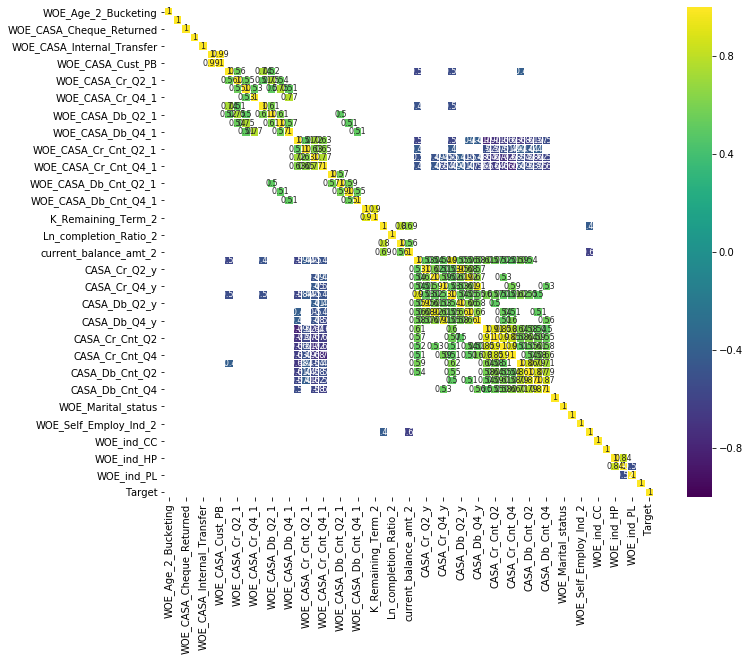

In [93]:
#Note: [['CASA_Db_Cnt_Q2','CASA_Db_Cnt_Q3','WOE_Gender','WOE_ind_PL']] - these vars also found less pred power in Information value (WoE process)
######################################## Multocollinearity   ####################################################
corr = x_train_3.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

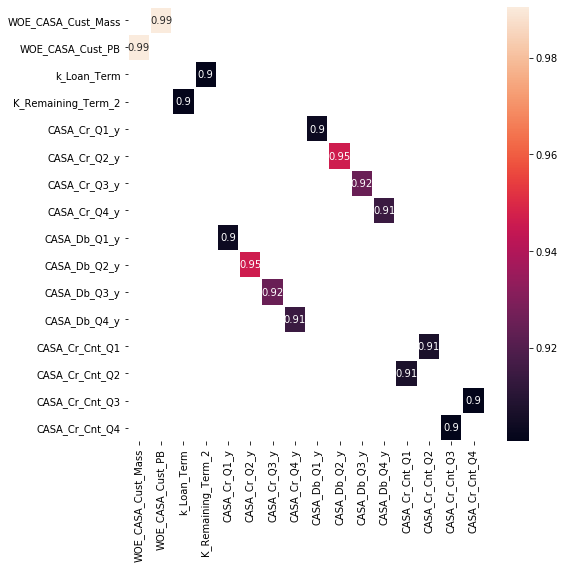

In [95]:
#Always there is exists of high correlated vars, when using the transaction only data. So not using the VIF to analysis it.
corrltd=corr[corr>0.9]
corrltd=corrltd.replace(1,np.nan)
corrltd=corrltd.dropna(how='all')
corrltd=corrltd.dropna(how='all',axis=1)
print()
plt.figure(figsize = (8,8))
sns.heatmap(corrltd, annot=True,linewidths=1)
#[['WOE_CASA_Cust_PB']] - [['CASA_Db_Cnt_Q2','CASA_Db_Cnt_Q3','WOE_ind_PL','WOE_ind_TL']]
#In addition to F_stat insignificant values, these two values are also sharing same info (['WOE_CASA_Cust_PB'])

In [96]:
x_train_3.head()

,WOE_Age_2_Bucketing,WOE_B_Investors_2,WOE_CASA_Cheque_Returned,WOE_CASA_Credit_Advice,WOE_CASA_Internal_Transfer,WOE_CASA_Cust_Mass,WOE_CASA_Cust_PB,WOE_CASA_Cr_Q1_1,WOE_CASA_Cr_Q2_1,WOE_CASA_Cr_Q3_1,WOE_CASA_Cr_Q4_1,WOE_CASA_Db_Q1_1,WOE_CASA_Db_Q2_1,WOE_CASA_Db_Q3_1,WOE_CASA_Db_Q4_1,WOE_CASA_Cr_Cnt_Q1_1,WOE_CASA_Cr_Cnt_Q2_1,WOE_CASA_Cr_Cnt_Q3_1,WOE_CASA_Cr_Cnt_Q4_1,WOE_CASA_Db_Cnt_Q1_1,WOE_CASA_Db_Cnt_Q2_1,WOE_CASA_Db_Cnt_Q3_1,WOE_CASA_Db_Cnt_Q4_1,k_Loan_Term,K_Remaining_Term_2,Approved_Amt,Ln_completion_Ratio_2,a_Repayment,current_balance_amt_2,CASA_Cr_Q1_y,CASA_Cr_Q2_y,CASA_Cr_Q3_y,CASA_Cr_Q4_y,CASA_Db_Q1_y,CASA_Db_Q2_y,CASA_Db_Q3_y,CASA_Db_Q4_y,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,WOE_Gender,WOE_Marital_status,WOE_New_funded_Cust_b_2,WOE_Self_Employ_Ind_2,WOE_b_current_balance,WOE_ind_CC,WOE_ind_FD,WOE_ind_HP,WOE_ind_Loan_grt1,WOE_ind_PL,WOE_ind_TL,Target
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1781018925,0.02,-0.17,0.15,0.13,-0.79,-1.39,-1.44,0.02,-0.57,-1.05,-1.17,0.71,-0.61,-0.94,-0.88,-0.59,-0.65,-0.71,-0.62,-0.04,0.62,0.63,0.69,180.00,180.59,501992.00,-0.00,3759.00,502742.92,4239.03,78045.34,222044.81,99208.53,541.67,54333.35,248267.55,65395.88,5.33,7.67,12.67,10.00,0.33,1.33,4.67,2.33,-0.01,-0.35,0.00,-0.43,-0.92,0.39,-0.96,0.07,0.07,-0.00,0.00,0
481085424,-0.19,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,180.00,140.98,54400.00,0.10,451.00,48998.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,0.61,0.39,-0.96,0.07,0.07,-0.00,0.00,1
37781001572,0.09,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,300.00,155.18,60000.00,0.36,293.00,38127.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,0.61,0.39,0.18,0.07,0.07,-0.00,0.00,1
6181015901,0.09,-0.17,0.15,0.13,0.27,0.09,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,360.00,270.61,104734.00,0.04,388.00,100032.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.35,0.13,0.17,-0.22,0.39,0.18,0.07,0.07,-0.00,0.00,0
21381001136,0.08,0.44,0.15,0.13,-0.79,0.09,0.09,-0.35,-0.30,-0.70,-0.44,-0.27,-0.18,-0.64,-0.65,-0.15,0.18,-0.00,0.07,-0.08,-0.15,-0.15,-0.18,300.00,285.14,106017.00,1.00,584.00,0.00,7825.23,5879.52,20073.05,8933.54,6964.77,7005.48,18666.62,10110.19,2.33,1.67,4.67,2.67,7.67,6.00,9.00,7.00,0.03,-0.28,0.13,0.17,0.12,0.39,0.18,0.07,0.07,-0.00,0.00,0


In [123]:
x_train_4 = x_train_3.drop(['WOE_CASA_Cust_PB','CASA_Db_Cnt_Q2','CASA_Db_Cnt_Q3','WOE_Gender','WOE_ind_PL','WOE_ind_TL','Target'],axis=1)
y_train_4 = x_train_3[['Target']]  

In [124]:
x_train_4.head()

,WOE_Age_2_Bucketing,WOE_B_Investors_2,WOE_CASA_Cheque_Returned,WOE_CASA_Credit_Advice,WOE_CASA_Internal_Transfer,WOE_CASA_Cust_Mass,WOE_CASA_Cr_Q1_1,WOE_CASA_Cr_Q2_1,WOE_CASA_Cr_Q3_1,WOE_CASA_Cr_Q4_1,WOE_CASA_Db_Q1_1,WOE_CASA_Db_Q2_1,WOE_CASA_Db_Q3_1,WOE_CASA_Db_Q4_1,WOE_CASA_Cr_Cnt_Q1_1,WOE_CASA_Cr_Cnt_Q2_1,WOE_CASA_Cr_Cnt_Q3_1,WOE_CASA_Cr_Cnt_Q4_1,WOE_CASA_Db_Cnt_Q1_1,WOE_CASA_Db_Cnt_Q2_1,WOE_CASA_Db_Cnt_Q3_1,WOE_CASA_Db_Cnt_Q4_1,k_Loan_Term,K_Remaining_Term_2,Approved_Amt,Ln_completion_Ratio_2,a_Repayment,current_balance_amt_2,CASA_Cr_Q1_y,CASA_Cr_Q2_y,CASA_Cr_Q3_y,CASA_Cr_Q4_y,CASA_Db_Q1_y,CASA_Db_Q2_y,CASA_Db_Q3_y,CASA_Db_Q4_y,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q4,WOE_Marital_status,WOE_New_funded_Cust_b_2,WOE_Self_Employ_Ind_2,WOE_b_current_balance,WOE_ind_CC,WOE_ind_FD,WOE_ind_HP,WOE_ind_Loan_grt1
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1781018925,0.02,-0.17,0.15,0.13,-0.79,-1.39,0.02,-0.57,-1.05,-1.17,0.71,-0.61,-0.94,-0.88,-0.59,-0.65,-0.71,-0.62,-0.04,0.62,0.63,0.69,180.00,180.59,501992.00,-0.00,3759.00,502742.92,4239.03,78045.34,222044.81,99208.53,541.67,54333.35,248267.55,65395.88,5.33,7.67,12.67,10.00,0.33,2.33,-0.35,0.00,-0.43,-0.92,0.39,-0.96,0.07,0.07
481085424,-0.19,-0.17,0.15,0.13,0.27,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,180.00,140.98,54400.00,0.10,451.00,48998.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.35,0.13,0.17,0.61,0.39,-0.96,0.07,0.07
37781001572,0.09,-0.17,0.15,0.13,0.27,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,300.00,155.18,60000.00,0.36,293.00,38127.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.35,0.13,0.17,0.61,0.39,0.18,0.07,0.07
6181015901,0.09,-0.17,0.15,0.13,0.27,0.09,-0.01,-0.10,-0.12,-0.12,-0.04,-0.13,-0.19,-0.18,0.08,0.00,0.06,0.05,-0.04,-0.11,-0.16,-0.16,360.00,270.61,104734.00,0.04,388.00,100032.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.35,0.13,0.17,-0.22,0.39,0.18,0.07,0.07
21381001136,0.08,0.44,0.15,0.13,-0.79,0.09,-0.35,-0.30,-0.70,-0.44,-0.27,-0.18,-0.64,-0.65,-0.15,0.18,-0.00,0.07,-0.08,-0.15,-0.15,-0.18,300.00,285.14,106017.00,1.00,584.00,0.00,7825.23,5879.52,20073.05,8933.54,6964.77,7005.48,18666.62,10110.19,2.33,1.67,4.67,2.67,7.67,7.00,-0.28,0.13,0.17,0.12,0.39,0.18,0.07,0.07


## Normalization

In [127]:
#Preprocessing Evaluation set
n_num11 = [['WOE_CASA_Cr_Q1_1','WOE_CASA_Cr_Q2_1','WOE_CASA_Cr_Q3_1','WOE_CASA_Cr_Q4_1','WOE_CASA_Db_Q1_1','WOE_CASA_Db_Q2_1'              
,'WOE_CASA_Db_Q3_1','WOE_CASA_Db_Q4_1','WOE_CASA_Cr_Cnt_Q1_1','WOE_CASA_Cr_Cnt_Q2_1','WOE_CASA_Cr_Cnt_Q3_1','WOE_CASA_Cr_Cnt_Q4_1',
        'WOE_CASA_Db_Cnt_Q1_1','WOE_CASA_Db_Cnt_Q2_1','WOE_CASA_Db_Cnt_Q3_1','WOE_CASA_Db_Cnt_Q4_1']]
for n1 in n_num11:
    x_test[n1] = x_test[n1].astype('int64')

x_test_3 = x_test.drop(['WOE_CASA_Cust_PB','CASA_Db_Cnt_Q2','CASA_Db_Cnt_Q3','WOE_Gender','WOE_ind_PL','WOE_ind_TL'],axis=1)
x_test_4 = x_test_3.rename(columns={"CASA_Cr_Q1": "CASA_Cr_Q1_y", "CASA_Cr_Q2": "CASA_Cr_Q2_y", "CASA_Cr_Q3": "CASA_Cr_Q3_y"
                        ,"CASA_Cr_Q4": "CASA_Cr_Q4_y", "CASA_Db_Q1": "CASA_Db_Q1_y", "CASA_Db_Q2": "CASA_Db_Q2_y"
                        ,"CASA_Db_Q3": "CASA_Db_Q3_y", "CASA_Db_Q3": "CASA_Db_Q3_y"})
x_test_4.head()

,WOE_Age_2_Bucketing,WOE_B_Investors_2,WOE_CASA_Cheque_Returned,WOE_CASA_Credit_Advice,WOE_CASA_Internal_Transfer,WOE_CASA_Cust_Mass,WOE_CASA_Cr_Q1_1,WOE_CASA_Cr_Q2_1,WOE_CASA_Cr_Q3_1,WOE_CASA_Cr_Q4_1,WOE_CASA_Db_Q1_1,WOE_CASA_Db_Q2_1,WOE_CASA_Db_Q3_1,WOE_CASA_Db_Q4_1,WOE_CASA_Cr_Cnt_Q1_1,WOE_CASA_Cr_Cnt_Q2_1,WOE_CASA_Cr_Cnt_Q3_1,WOE_CASA_Cr_Cnt_Q4_1,WOE_CASA_Db_Cnt_Q1_1,WOE_CASA_Db_Cnt_Q2_1,WOE_CASA_Db_Cnt_Q3_1,WOE_CASA_Db_Cnt_Q4_1,k_Loan_Term,K_Remaining_Term_2,Approved_Amt,Ln_completion_Ratio_2,a_Repayment,current_balance_amt_2,CASA_Cr_Q1_y,CASA_Cr_Q2_y,CASA_Cr_Q3_y,CASA_Cr_Q4_y,CASA_Db_Q1_y,CASA_Db_Q2_y,CASA_Db_Q3_y,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q4,WOE_Marital_status,WOE_New_funded_Cust_b_2,WOE_Self_Employ_Ind_2,WOE_b_current_balance,WOE_ind_CC,WOE_ind_FD,WOE_ind_HP,WOE_ind_Loan_grt1
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12681007190,0.03,-0.17,0.15,0.13,0.27,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,360.00,321.14,184652.00,0.05,816.00,176106.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.30,0.13,-0.43,-0.56,-0.60,0.18,0.07,0.07
28381011875,0.03,0.44,0.15,0.13,0.27,0.09,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,360.00,270.94,70000.00,0.03,453.00,67971.45,0.00,0.00,0.00,266.74,0.00,0.00,0.00,301.41,0.00,0.00,0.00,1.00,0.00,1.67,1.81,0.13,0.17,0.20,0.39,0.18,0.07,0.07
28891007063,0.09,-0.09,0.15,-0.67,0.27,0.09,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,300.00,294.21,6449.00,0.03,37.00,6269.95,1285.14,8155.90,30.22,240.11,5015.00,2400.00,7697.00,345.33,1.00,1.67,0.33,1.67,3.00,3.00,-0.35,-0.35,0.17,0.12,-0.60,-0.96,0.07,0.07
11081001663,0.08,-0.17,0.15,0.13,0.27,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300.00,300.62,198000.00,0.67,901.00,65179.72,0.00,0.00,8513.13,0.00,0.00,0.00,3453.83,0.00,0.00,0.00,2.00,0.00,0.00,0.00,-0.35,0.00,-0.43,0.20,-0.60,-0.96,0.07,0.07
18281010880,0.08,-0.17,0.15,0.13,0.27,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,336.00,336.43,314463.00,0.90,1505.00,31874.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.30,0.00,0.17,0.61,0.39,-0.96,0.07,0.07


In [128]:
x_test_4.shape

(4377, 50)

In [129]:
#normalizing the data
sc=StandardScaler()
X_train_4=sc.fit_transform(x_train_4)
X_test=sc.transform(x_test_4)
#from imblearn.combine import SMOTEENN
# upsampling fro imbalanced dataset.
sm = SMOTE(random_state=42)
x_train_res,y_train_res=sm.fit_resample(X_train_4, y_train_4)
n_cols=x_train_res.shape[1]
print("No of input features= ",n_cols)

No of input features=  50


In [130]:
np.isnan(X_train_4).any()
#np.isinf(X_train_4).any()
#np.isneginf(X_train_4).any()

False

In [131]:
y_train_4.shape

(39148, 1)

## Logistic Regression

In [132]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
logistic = linear_model.LogisticRegression(C=0.05,penalty = 'l2')

#penalty = ['l1', 'l2']
#C = np.logspace(40, 2, 60)
#hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
#clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = logistic.fit(x_train_res,y_train_res)

#best hyperparameters
#print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
#print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target 
y_pred_tes = best_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_tes ),'confusion_matrix')
print('testing_accuracy Log_REG =',(metrics.accuracy_score (y_test, y_pred_tes ))*100)
y_pred_train = best_model.predict(X_train_4)
print(confusion_matrix(y_train_4,y_pred_train),'confusion_matrix')
print('training_accuracy Log_REG =',(metrics.accuracy_score (y_train_4,y_pred_train))*100)

[[1619  508]
 [ 508 1742]] confusion_matrix
testing_accuracy Log_REG = 76.7877541695225
[[15548  3823]
 [ 5185 14592]] confusion_matrix
training_accuracy Log_REG = 76.98988454071728


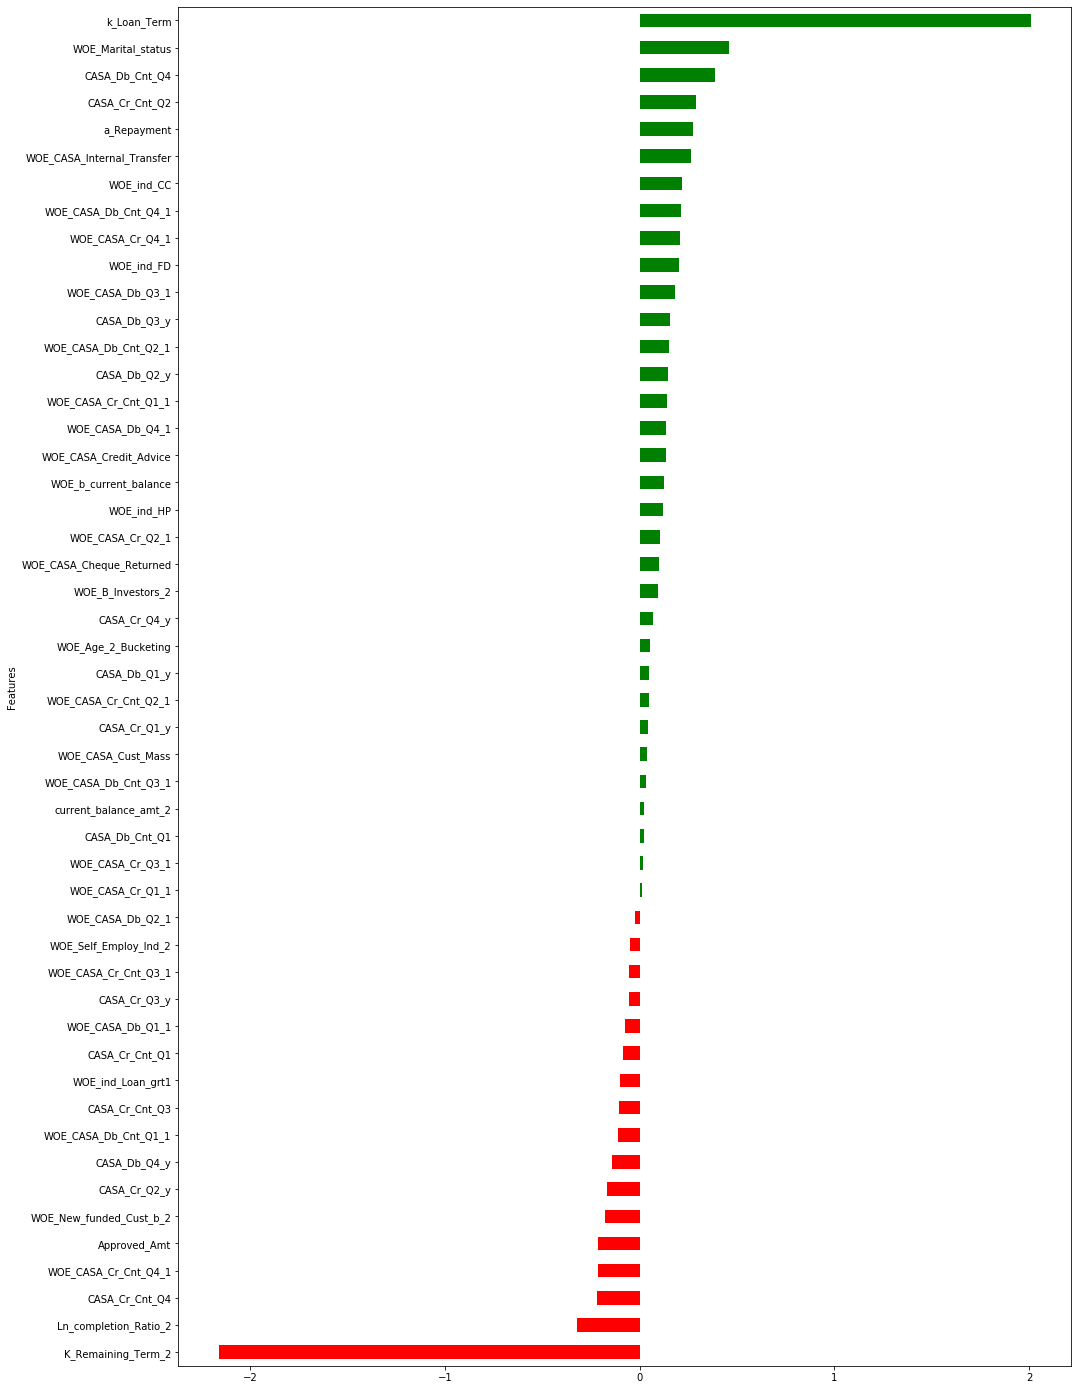

In [133]:
Log_reg=LogisticRegression(C=0.05,penalty = 'l2')#
Log_reg.fit(x_train_res,y_train_res)
#feature impotance
coeff=Log_reg.coef_[0]
coef_df=pd.Series(coeff)
import matplotlib as plt
coeff = list(Log_reg.coef_[0])
labels = list(x_train_4.columns);features = pd.DataFrame()
features['Features'] = labels;features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(16, 25),color = features.positive.map({True: 'green', False: 'red'}))
#plt.xlabel('Importance')

In [134]:
features.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\v2\gini_coeff.xlsx')

In [135]:
base_data_2['WOE_CASA_Cr_Q4_1'].value_counts()

-0.12    27135
1.30      6159
0.15      4558
-0.44     1450
-0.84     1369
-0.67     1344
-1.17      754
-0.90      541
-1.41      357
-0.44      103
Name: WOE_CASA_Cr_Q4_1, dtype: int64

## KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV
grid_params={'n_neighbors':[3,5,11,1]}
gs=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=3,n_jobs=-1)
gs.fit(x_train_res,y_train_res)

#Predict
res=gs.predict(X_test)
print(confusion_matrix(y_test,res ),'confusion_matrix')
print('testing_accuracy KNN =',(metrics.accuracy_score (y_test, res ))*100)
rest=gs.predict(X_train_4)
print(confusion_matrix(y_train_4,rest),'confusion_matrix')
print('training_accuracy KNN =',(metrics.accuracy_score (y_train_4,rest))*100)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.3min finished


[[1770  357]
 [ 746 1504]] confusion_matrix
testing_accuracy KNN = 74.8000913867946
[[16207  3164]
 [ 4665 15112]] confusion_matrix
training_accuracy KNN = 80.00153264534586


## Random Forest

In [162]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train_res, y_train_res)
print(rf_random.best_params_)
# Predict target 
y_pred_tes = rf_random.predict(X_test)
print(confusion_matrix(y_test,y_pred_tes ),'confusion_matrix')
print('testing_accuracy RF =',(metrics.accuracy_score (y_test, y_pred_tes ))*100)
y_pred_train =  rf_random.predict(X_train_4)
print(confusion_matrix(y_train,y_pred_train),'confusion_matrix')
print('training_accuracy RF =',(metrics.accuracy_score (y_train,y_pred_train))*100)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 107.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 217.3min finished


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}
[[1799  322]
 [ 299 1957]] confusion_matrix
testing_accuracy RF = 85.8122001370802
[[19528     0]
 [    0 19865]] confusion_matrix
training_accuracy RF = 100.0


In [165]:
rf  = RandomForestClassifier(n_estimators= 1400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto', max_depth= 40, bootstrap= False)
rf2 = rf.fit(x_train_res, y_train_res)

# Predict target 
y_pred_tes = rf2.predict(X_test)
print(confusion_matrix(y_test,y_pred_tes ),'confusion_matrix')
print('testing_accuracy RF =',(metrics.accuracy_score (y_test, y_pred_tes ))*100)
y_pred_train =  rf_random.predict(X_train_4)
print(confusion_matrix(y_train,y_pred_train),'confusion_matrix')
print('training_accuracy RF =',(metrics.accuracy_score (y_train,y_pred_train))*100)

[[1799  322]
 [ 297 1959]] confusion_matrix
testing_accuracy RF = 85.85789353438427
[[19528     0]
 [    0 19865]] confusion_matrix
training_accuracy RF = 100.0


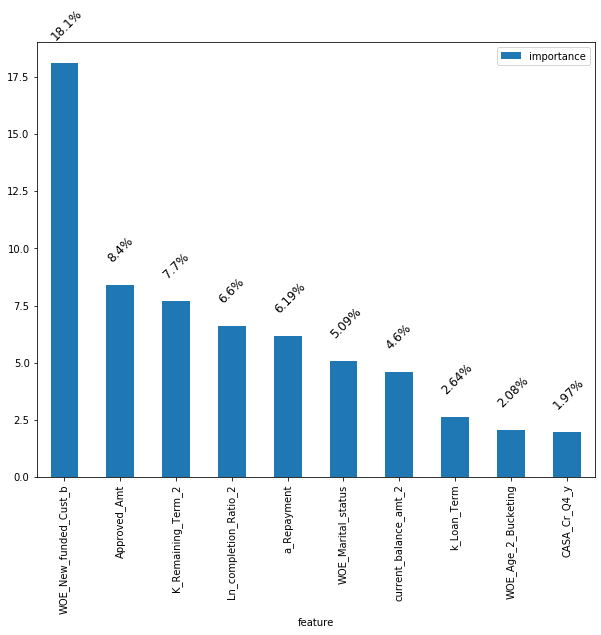

In [168]:
#Feature importance
importances = pd.DataFrame({'feature':x_train_4.columns,'importance':np.round(rf.feature_importances_,4)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
ax=importances.iloc[:10,:].plot.bar(figsize=(10,8))
#plt.figure(figsize=(30,25))
#importances
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03,i.get_height()+1,\
            str(round((i.get_height()/100)*100, 2))+'%', fontsize=12,color='black',rotation=45)#total)*100

In [169]:
importances

,importance
feature,
WOE_New_funded_Cust_b,18.10
Approved_Amt,8.40
K_Remaining_Term_2,7.70
Ln_completion_Ratio_2,6.60
a_Repayment,6.19
WOE_Marital_status,5.09
current_balance_amt_2,4.60
k_Loan_Term,2.64
WOE_Age_2_Bucketing,2.08


## XG BOOST

In [136]:
# xgb 
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.6)

xgb_clf.fit(x_train_res, y_train_res)
y_pred_ts = xgb_clf.predict(X_test)
#y_score = xgb_clf.predict_proba(X_test)[:,1]
#y_test.set_index('ACCTNO',inplace=True)
print(confusion_matrix(y_test,y_pred_ts),'confusion_matrix')
print('testing_accuracy XGB =',(metrics.accuracy_score (y_test, y_pred_ts ))*100)
y_pred_training =  xgb_clf.predict(X_train_4)
print(confusion_matrix(y_train_4,y_pred_training),'confusion_matrix')
print('training_accuracy XGB=',(metrics.accuracy_score (y_train_4,y_pred_training))*100)
print(accuracy_score(y_test,y_pred_ts))
#print(classification_report(y_test,y_pred_ts))
#model_performance_plot('xgb_clf')

[[1883  244]
 [ 417 1833]] confusion_matrix
testing_accuracy XGB = 84.8983321909984
[[16792  2579]
 [ 2651 17126]] confusion_matrix
training_accuracy XGB= 86.64044140185962
0.848983321909984


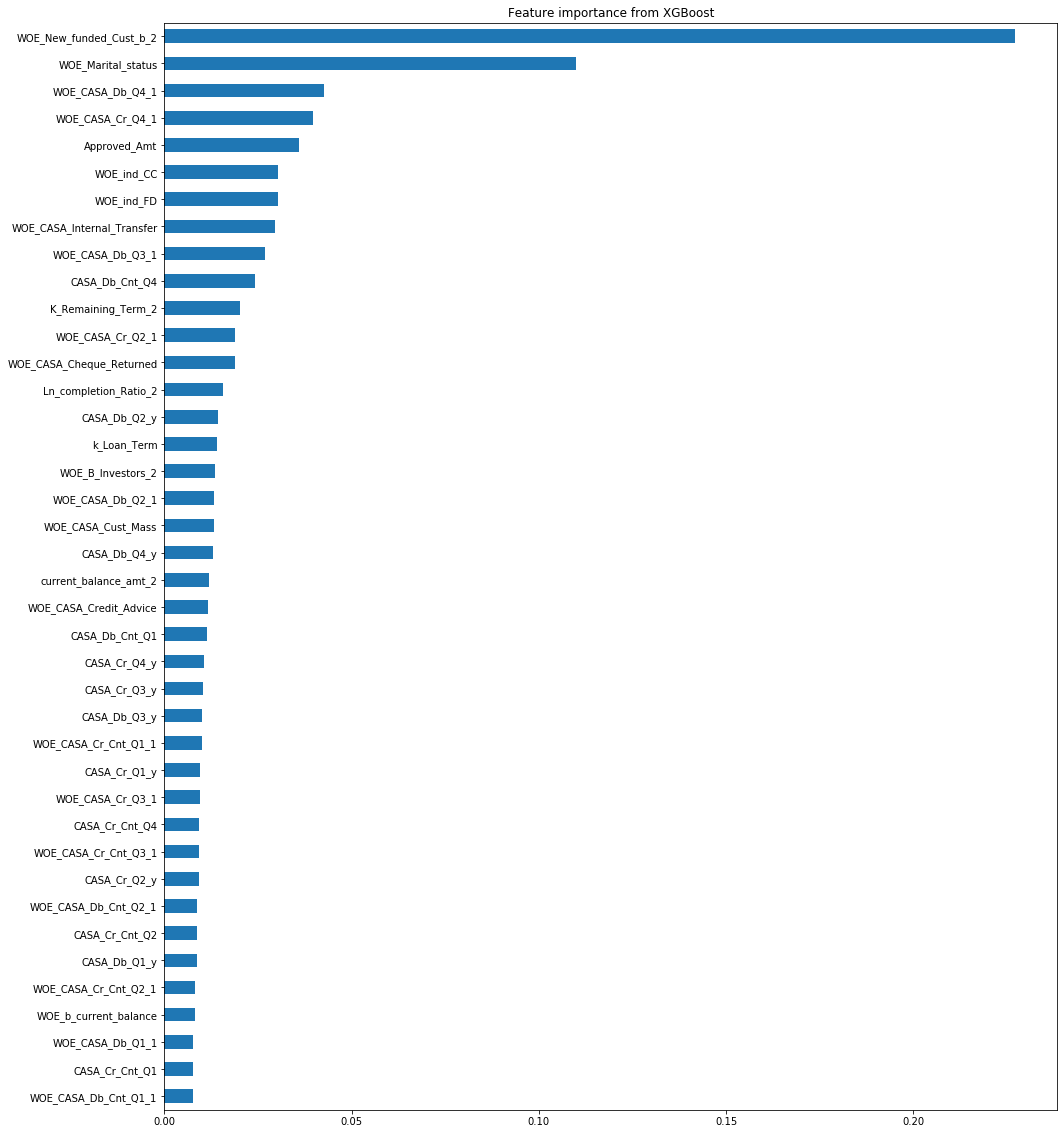

In [137]:
pd.Series(xgb_clf.feature_importances_, index = x_train_4.columns).nlargest(40).plot(kind = 'barh',
                                                                               figsize = (16, 20),
                                                                              title = 'Feature importance from XGBoost').invert_yaxis();

In [138]:
xgb_feature_imp = pd.Series(xgb_clf.feature_importances_, index = x_train_4.columns)
xgb_feature_imp

WOE_Age_2_Bucketing          0.00
WOE_B_Investors_2            0.01
WOE_CASA_Cheque_Returned     0.02
WOE_CASA_Credit_Advice       0.01
WOE_CASA_Internal_Transfer   0.03
WOE_CASA_Cust_Mass           0.01
WOE_CASA_Cr_Q1_1             0.01
WOE_CASA_Cr_Q2_1             0.02
WOE_CASA_Cr_Q3_1             0.01
WOE_CASA_Cr_Q4_1             0.04
WOE_CASA_Db_Q1_1             0.01
WOE_CASA_Db_Q2_1             0.01
WOE_CASA_Db_Q3_1             0.03
WOE_CASA_Db_Q4_1             0.04
WOE_CASA_Cr_Cnt_Q1_1         0.01
WOE_CASA_Cr_Cnt_Q2_1         0.01
WOE_CASA_Cr_Cnt_Q3_1         0.01
WOE_CASA_Cr_Cnt_Q4_1         0.01
WOE_CASA_Db_Cnt_Q1_1         0.01
WOE_CASA_Db_Cnt_Q2_1         0.01
WOE_CASA_Db_Cnt_Q3_1         0.01
WOE_CASA_Db_Cnt_Q4_1         0.01
k_Loan_Term                  0.01
K_Remaining_Term_2           0.02
Approved_Amt                 0.04
Ln_completion_Ratio_2        0.02
a_Repayment                  0.01
current_balance_amt_2        0.01
CASA_Cr_Q1_y                 0.01
CASA_Cr_Q2_y  

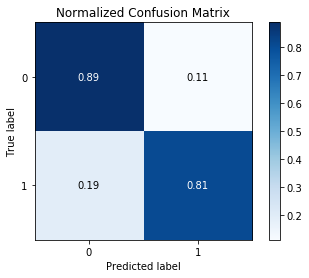

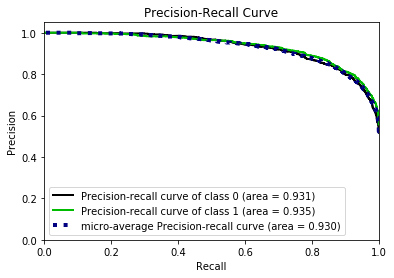

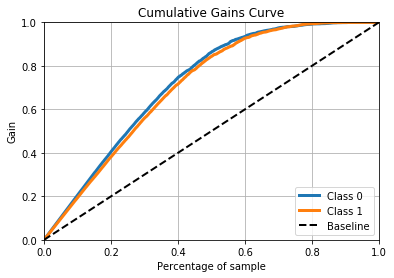

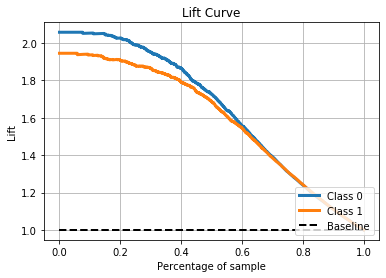

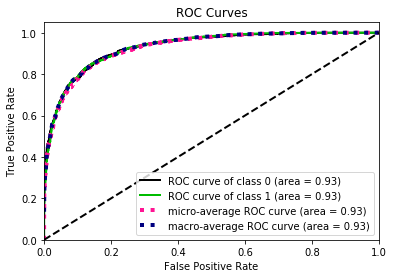

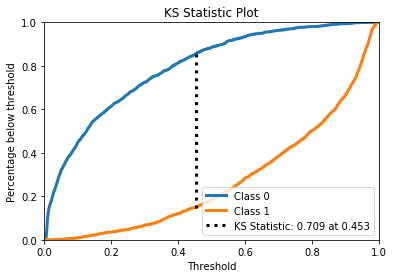

In [139]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_ts, normalize=True)


y_pred_test  =xgb_clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_test)
skplt.figsize = (16, 20)
skplt.metrics.plot_cumulative_gain(y_test,y_pred_test)
skplt.metrics.plot_lift_curve(y_test,y_pred_test)
skplt.metrics.plot_roc (y_test,y_pred_test)
y_pred_test  = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_test)

(0, 1)

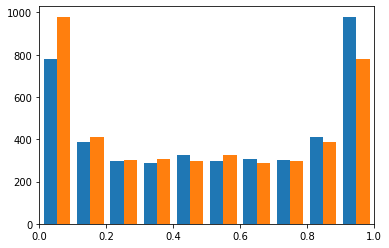

In [140]:
#we can seethe probability of the predicted values
import matplotlib.pyplot as plt
plt.rcParams['font.size']=10
#histogram
plt.hist(y_pred_test,bins=10)
plt.xlim(0,1)

In [141]:
x_test.head()

,WOE_Age_2_Bucketing,WOE_B_Investors_2,WOE_CASA_Cheque_Returned,WOE_CASA_Credit_Advice,WOE_CASA_Internal_Transfer,WOE_CASA_Cust_Mass,WOE_CASA_Cust_PB,WOE_CASA_Cr_Q1_1,WOE_CASA_Cr_Q2_1,WOE_CASA_Cr_Q3_1,WOE_CASA_Cr_Q4_1,WOE_CASA_Db_Q1_1,WOE_CASA_Db_Q2_1,WOE_CASA_Db_Q3_1,WOE_CASA_Db_Q4_1,WOE_CASA_Cr_Cnt_Q1_1,WOE_CASA_Cr_Cnt_Q2_1,WOE_CASA_Cr_Cnt_Q3_1,WOE_CASA_Cr_Cnt_Q4_1,WOE_CASA_Db_Cnt_Q1_1,WOE_CASA_Db_Cnt_Q2_1,WOE_CASA_Db_Cnt_Q3_1,WOE_CASA_Db_Cnt_Q4_1,k_Loan_Term,K_Remaining_Term_2,Approved_Amt,Ln_completion_Ratio_2,a_Repayment,current_balance_amt_2,CASA_Cr_Q1,CASA_Cr_Q2,CASA_Cr_Q3,CASA_Cr_Q4,CASA_Db_Q1,CASA_Db_Q2,CASA_Db_Q3,CASA_Db_Q4,CASA_Cr_Cnt_Q1,CASA_Cr_Cnt_Q2,CASA_Cr_Cnt_Q3,CASA_Cr_Cnt_Q4,CASA_Db_Cnt_Q1,CASA_Db_Cnt_Q2,CASA_Db_Cnt_Q3,CASA_Db_Cnt_Q4,WOE_Gender,WOE_Marital_status,WOE_New_funded_Cust_b_2,WOE_Self_Employ_Ind_2,WOE_b_current_balance,WOE_ind_CC,WOE_ind_FD,WOE_ind_HP,WOE_ind_Loan_grt1,WOE_ind_PL,WOE_ind_TL
ACCTNO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12681007190,0.03,-0.17,0.15,0.13,0.27,0.09,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,360.00,321.14,184652.00,0.05,816.00,176106.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,-0.30,0.13,-0.43,-0.56,-0.60,0.18,0.07,0.07,-0.00,0.00
28381011875,0.03,0.44,0.15,0.13,0.27,0.09,0.09,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,360.00,270.94,70000.00,0.03,453.00,67971.45,0.00,0.00,0.00,266.74,0.00,0.00,0.00,301.41,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.67,-0.01,1.81,0.13,0.17,0.20,0.39,0.18,0.07,0.07,-0.00,0.00
28891007063,0.09,-0.09,0.15,-0.67,0.27,0.09,0.09,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,300.00,294.21,6449.00,0.03,37.00,6269.95,1285.14,8155.90,30.22,240.11,5015.00,2400.00,7697.00,345.33,1.00,1.67,0.33,1.67,3.00,4.33,6.33,3.00,-0.01,-0.35,-0.35,0.17,0.12,-0.60,-0.96,0.07,0.07,-0.00,0.00
11081001663,0.08,-0.17,0.15,0.13,0.27,0.09,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300.00,300.62,198000.00,0.67,901.00,65179.72,0.00,0.00,8513.13,0.00,0.00,0.00,3453.83,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.67,0.00,-0.01,-0.35,0.00,-0.43,0.20,-0.60,-0.96,0.07,0.07,-0.00,0.00
18281010880,0.08,-0.17,0.15,0.13,0.27,0.09,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,336.00,336.43,314463.00,0.90,1505.00,31874.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.30,0.00,0.17,0.61,0.39,-0.96,0.07,0.07,-0.00,0.00


In [142]:
y_pred_prob_XG = pd.DataFrame(y_pred_test[0:,1])
y_pred_prob_XG_1 = y_pred_prob_XG.rename(columns={0:"Pred_Prob"})
y_test.reset_index('ACCTNO',inplace=True)
y_pred_prob_XG_2 = pd.DataFrame({"ACCTNO":x_test_4.index,"Pred_Prob":y_pred_prob_XG_1.Pred_Prob,"Actual":y_test.Target
                                ,"Pred_value":y_pred_ts})
#To create bucketing for Predictions
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] >= 0) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.1), 'b_Pred_Prob'] = 'A. 0 to 10'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.1) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.2), 'b_Pred_Prob'] = 'B. 10 to 20'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.2) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.3), 'b_Pred_Prob'] = 'C. 20 to 30'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.3) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.4), 'b_Pred_Prob'] = 'D. 30 to 40'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.4) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.5), 'b_Pred_Prob'] = 'E. 40 to 50'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.5) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.6), 'b_Pred_Prob'] = 'F. 50 to 60'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.6) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.7), 'b_Pred_Prob'] = 'G. 60 to 70'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.7) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.8), 'b_Pred_Prob'] = 'H. 70 to 80'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.8) & (y_pred_prob_XG_2['Pred_Prob'] <= 0.9), 'b_Pred_Prob'] = 'I. 80 to 90'
y_pred_prob_XG_2.loc[(y_pred_prob_XG_2['Pred_Prob'] > 0.9) & (y_pred_prob_XG_2['Pred_Prob'] <= 1)  , 'b_Pred_Prob'] = 'J. 90 to 100'
y_pred_prob_XG_2.head(15)

,ACCTNO,Pred_Prob,Actual,Pred_value,b_Pred_Prob
0,12681007190,0.30,1,0,C. 20 to 30
1,28381011875,0.97,1,1,J. 90 to 100
2,28891007063,0.56,1,1,F. 50 to 60
3,11081001663,0.05,0,0,A. 0 to 10
4,18281010880,0.12,0,0,B. 10 to 20
5,29181003563,0.20,0,0,C. 20 to 30
6,15581000335,0.25,1,0,C. 20 to 30
7,3081103112,0.17,0,0,B. 10 to 20
8,11381002513,0.45,0,0,E. 40 to 50
9,13384000723,0.39,0,0,D. 30 to 40


In [143]:
y_pred_prob_XG_2.to_excel(r'F:\Project Works\Project Works\MIA_MODEL\v2\Model_prob_distribution.xlsx')

In [144]:
#Metrics table calculation 1    2256  0    2121   --1739(TN);293(FN);382(FP)
y_test.set_index('ACCTNO',inplace=True)
CM = confusion_matrix(y_test, y_pred_ts)
TN = pd.DataFrame(CM[0,:1])
FN = pd.DataFrame(CM[1,:1])
TP = pd.DataFrame(CM[1:,1])
T1 = pd.DataFrame(CM[0:,1])
FP = pd.DataFrame(T1[:1])

TN_1 = TN.rename(columns={0:'TN'})
FN_1 = FN.rename(columns={0:'FN'})
TP_1 = TP.rename(columns={0:'TP'})
FP_1 = FP.rename(columns={0:'FP'})

T3 = pd.DataFrame({'TN' : TN_1.TN, 'FP' : FP_1.FP,
                   'FN' : FN_1.FN, 'TP' : TP_1.TP})

T3['Precision'] = ((T3['TP'])/(T3['TP'] + T3['FP']))*100
T3['Recall']    = ((T3['TP'])/(T3['TP'] + T3['FN']))*100
T3['F1-Score']  = ((2*T3['Recall']*T3['Precision'])/(T3['Recall'] + T3['Precision']))*1
T3['Accuracy']  = ((T3['TP'] + T3['TN'])/(T3['TP'] + T3['TN'] + T3['FP'] + T3['FN']))*100
T4 = T3[['TN', 'FP', 'TP', 'FN', 'Precision', 'Recall', 'F1-Score', 'Accuracy']].T
T4

,0
TN,1883.00
FP,244.00
TP,1833.00
FN,417.00
Precision,88.25
Recall,81.47
F1-Score,84.72
Accuracy,84.90


(0, 1)

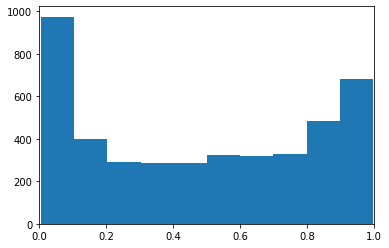

In [248]:
y_pred_ts
plt.rcParams['font.size']=10
#histogram
plt.hist(y_pred_prob_XG_2.Pred_Prob,bins=10)
plt.xlim(0,1)

## Save and Load Model

In [249]:
import pickle
# save the model to disk
filename = '20200604_MG_MIA_final.sav'
pickle.dump(xgb_clf, open(filename, 'wb')) 

In [250]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
result

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [252]:
print(confusion_matrix(y_test,result ),'confusion_matrix')
print('testing_accuracy Log_REG =',(metrics.accuracy_score (y_test, result ))*100)

[[1871  311]
 [ 364 1831]] confusion_matrix
testing_accuracy Log_REG = 84.57847840986977
